# Fetching all the packages from API Hub

In [1]:
#Reading all the packages from API Hub
import pandas as pd
#Request class is used to read the APIs and store it in dataframe
import requests
import json

response_package = requests.get("https://cloudintegration.hana.ondemand.com/odata/1.0/catalog.svc/ContentPackages?$format=json")
response_package

<Response [200]>

In [2]:
response_package.json().keys()

dict_keys(['d'])

In [3]:
packages = response_package.json()
# packages["d"]['results'][1]

In [4]:
len(packages["d"]['results'])

827

In [5]:
packages["d"]['results'][0]

{'__metadata': {'id': "https://cloudintegration.hana.ondemand.com:443/odata/1.0/catalog.svc/ContentPackages('com.wipro.bpm.utilities.prosumeronboarding')",
  'uri': "https://cloudintegration.hana.ondemand.com:443/odata/1.0/catalog.svc/ContentPackages('com.wipro.bpm.utilities.prosumeronboarding')",
  'type': 'ContentPackageModel.ContentPackage'},
 'TechnicalName': 'com.wipro.bpm.utilities.prosumeronboarding',
 'DisplayName': 'Prosumer Onboarding Workflow for Energy and Utilities',
 'ShortText': 'Automates various activities from the point when a customer evinces interest to be a prosumer, by following the Standard operating procedures like validations, financial viability, site readiness/suitability checks, reviews and approvals.',
 'reg_id': '00b55eb77b50404eb2aeef3ce839926f',
 'Featured': None,
 'Scope': None,
 'Description': '<p>The Prosumer&nbsp;Onboarding&nbsp;Workflow has been developed by Wipro to bring the prosumer onboarding process which was hitherto manual or via disjoint pro

In [6]:
df_packages = pd.DataFrame()
for i in range (len(packages["d"]['results'])):
    df_packages.loc[i,"Package_Id"] = packages["d"]['results'][i]["TechnicalName"]
    df_packages.loc[i,"Package_Title"] = packages["d"]['results'][i]["DisplayName"]
    df_packages.loc[i,"Package_Short_Text"] = packages["d"]['results'][i]["ShortText"]
    df_packages.loc[i,"Package_Description"] = packages["d"]['results'][i]["Description"]
    df_packages.loc[i,"Organization_Name"] = packages["d"]['results'][i]["OrgName"]
    df_packages.loc[i,"Products"] = packages["d"]['results'][i]["Products"]
    df_packages.loc[i,"Support_Information"] = packages["d"]['results'][i]["SupportInfo"]
    df_packages.loc[i,"Category"] = packages["d"]['results'][i]["Category"]
    df_packages.loc[i,"Vendor"] = packages["d"]['results'][i]["Vendor"]
    df_packages.loc[i,"Package_Creation_Date"] = packages["d"]['results'][i]["CreatedAt"]
    df_packages.loc[i,"Package_Modification_Date"] = packages["d"]['results'][i]["ModifiedAt"]
    
# pd.to_datetime(df_packages['Package_Creation_Date'])
df_packages.query("Category == 'Steampunk'").head()

,Package_Id,Package_Title,Package_Short_Text,Package_Description,Organization_Name,Products,Support_Information,Category,Vendor,Package_Creation_Date,Package_Modification_Date
191,S4HANACloudBOInterface,SAP S/4HANA Cloud Business Object Interfaces,Explore business object interfaces that can be...,Developer extensibility allows you to create d...,S4HANA_CLOUD,SAPS4HANACloud,CA-GTF-EI,Steampunk,SAP,/Date(1654085567173)/,/Date(1658898526213)/
787,S4HANACloudBADI,SAP S/4HANA Cloud Business Add-Ins (BAdIs),Explore Business Add-Ins (BAdIs) that can be u...,Developer extensibility allows you to create d...,S4HANA_CLOUD,SAPS4HANACloud,CA-GTF-EI,Steampunk,SAP,/Date(1658905591506)/,/Date(1658905591520)/


In [130]:
df_packages.stb.missing()

,missing,total,percent
Support_Information,567,827,68.561064
Products,23,827,2.781137
Organization_Name,1,827,0.120919
Package_Id,0,827,0.000000
Package_Title,0,827,0.000000
Package_Short_Text,0,827,0.000000
Package_Description,0,827,0.000000
Category,0,827,0.000000
Vendor,0,827,0.000000
Package_Creation_Date,0,827,0.000000


In [7]:
import datetime
def date_format_change(date):
    date = date[6:19]
    date = datetime.datetime.fromtimestamp(int(date)/1000).strftime('%d-%m-%y')
    return date
    
df_packages['Package_Creation_Date'] = df_packages['Package_Creation_Date'].apply(date_format_change)
df_packages['Package_Modification_Date'] = df_packages['Package_Modification_Date'].apply(date_format_change)
# df_packages[df_packages['Package_Modification_Date'] > 04-08-22 11:59:17]
df_packages['Package_Creation_Date']= pd.to_datetime(df_packages['Package_Creation_Date'])
df_packages['Package_Modification_Date']= pd.to_datetime(df_packages['Package_Modification_Date'])
# df_packages[df_packages['Package_Modification_Date'] == ]

In [132]:
df_packages.head(5)

,Package_Id,Package_Title,Package_Short_Text,Package_Description,Organization_Name,Products,Support_Information,Category,Vendor,Package_Creation_Date,Package_Modification_Date
0,com.wipro.bpm.utilities.prosumeronboarding,Prosumer Onboarding Workflow for Energy and Ut...,Automates various activities from the point wh...,<p>The Prosumer&nbsp;Onboarding&nbsp;Workflow ...,PARTNER_WIPRO_LTD,"SAPforUtilities,SAPCloudPlatformIntegrationSui...",NaN,LiveProcess,Wipro Limited,2022-03-31,2022-03-31
1,SAPSuccessFactorsLearningandSAPERPFinancialsIn...,SAP SuccessFactors Learning and SAP ERP Financ...,Post course fee for completed learning transac...,<p></p> \n<p></p> \n<p>This integration helps ...,HCM_PLAT_INT,"SAPERP,SAPSuccessFactorsLearning,SAPFI,SAPS4HA...",NaN,Integration,SAP,2016-12-12,2021-10-26
2,SourcetoPayHybrid,Source to Pay for Hybrid Deployment,"Covers strategic and operational procurement, ...",<p>Source-to-Pay provides an end-to-end scenar...,TI_SAP_CP_IO_DTS_CONTENTADMIN,"SAPAriba,SAPS4HANA,SAPAribaCloudIntegrationGat...",NaN,Scenarios,SAP,2021-04-16,2022-10-02
3,SAPConfigurePriceQuoteDeveloperTools,SAP Configure Price Quote - Developer Tools,Easily retrieve information stored in the SAP ...,"In this package, you can find tools that are u...",S4_PM_DISCRETE_IND_PRODUCE_CHEN,SAP CPQ,NaN,APIs,SAP,2022-04-03,2022-04-03
4,SAPGlobalTrackTraceInterfaceTrackedProcessesan...,SAP Logistics Business Network Integration wit...,Send tracked processes and events from SAP ERP...,<p></p> \n<p></p> \n<p></p> \n<p></p> \n<p>Thi...,SAPGLOBALTRACKANDTRACE,SAPLogisticsBusinessNetworkglobaltrackandtrace...,NaN,Integration,SAP,2017-09-05,2021-02-23


# No of packages based on content type

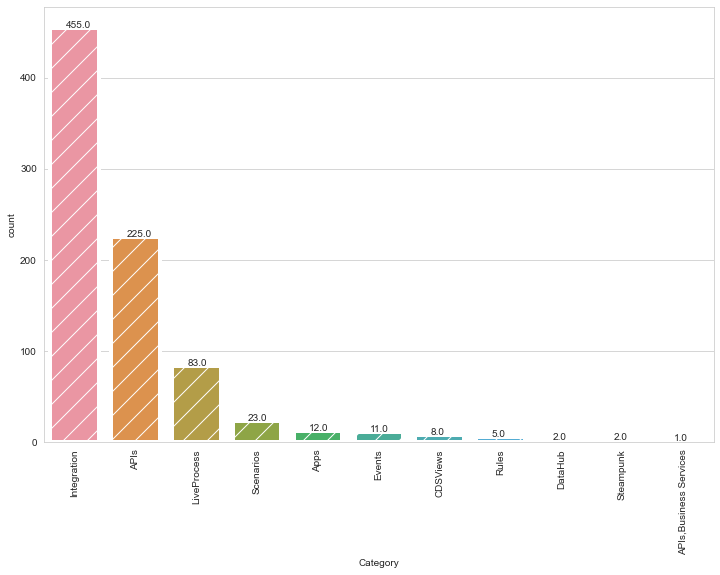

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
# # define Seaborn color palette to use
# palette_color = sns.color_palette('bright')
# plt.pie(df_package_count['Package_Id'], colors=palette_color, autopct='%1.0f%%')
# plt.legend(df_package_count['Category'])
# plt.title("No of Packages by Type")
# plt.show()
ax = sns.countplot(x=df_packages['Category'], order = df_packages['Category'].value_counts().index,
              lw=4,hatch='/')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.1))

plt.xticks(rotation=90)
plt.show()

In [100]:
# df_package_count = df_packages.pivot_table(index='Category',values ='Package_Id', aggfunc='count')
# df_package_count=df_package_count.reset_index()
# df_package_count = df_package_count.sort_values(by='Package_Id',ascending=False)
# df_package_count.reset_index(inplace=True,drop=True)
df_package_count = df_packages['Category'].value_counts()
df_package_count = df_package_count.reset_index()
df_package_count.rename(columns = {'index':'Category', 'Category':'Count'}, inplace = True)
df_package_count

,Category,Count
0,Integration,455
1,APIs,225
2,LiveProcess,83
3,Scenarios,23
4,Apps,12
5,Events,11
6,CDSViews,8
7,Rules,5
8,DataHub,2
9,Steampunk,2


In [104]:
n = int(len(df_package_count)/2)
df_odd = pd.DataFrame(columns=['Category','Count'])
df_even = pd.DataFrame(columns=['Category','Count'])
df_common = pd.DataFrame(columns=['Category','Count'])
odd = 0
even = 0
# c = int(n/2)
for i in range (len(df_package_count)):
#     a = df_package_count.iloc[i]
#     b = df_package_count.iloc[2*n-i]
#     df_package_count.iloc[i] = b
#     print("2n==",2*n)
#     b = df_package_count.iloc[2*n-i] = a
#     c = c - 1
    if (i <= n):
        df_odd.loc[odd,'Category'] = df_package_count.iloc[i].Category
        df_odd.loc[odd,'Count'] = df_package_count.iloc[i].Count
        odd = odd + 1
        
    if (i > n):
        df_even.loc[even,'Category'] = df_package_count.iloc[i].Category
        df_even.loc[even,'Count'] = df_package_count.iloc[i].Count
        even = even + 1
        
common = 0
for i in range (len(df_odd)):
    if i < (len(df_package_count)):
        df_common.loc[common,'Category'] = df_odd.iloc[i].Category
        df_common.loc[common,'Count'] = df_odd.iloc[i].Count
        common = common + 1
    
    if i < (len(df_even)):
        df_common.loc[common,'Category'] = df_even.iloc[i].Category
        df_common.loc[common,'Count'] = df_even.iloc[i].Count
        common = common + 1
    
     
display(df_odd)
display(df_even)
display(df_common)

,Category,Count
0,Integration,455
1,APIs,225
2,LiveProcess,83
3,Scenarios,23
4,Apps,12
5,Events,11


,Category,Count
0,CDSViews,8
1,Rules,5
2,DataHub,2
3,Steampunk,2
4,"APIs,Business Services",1


,Category,Count
0,Integration,455
1,CDSViews,8
2,APIs,225
3,Rules,5
4,LiveProcess,83
5,DataHub,2
6,Scenarios,23
7,Steampunk,2
8,Apps,12
9,"APIs,Business Services",1


In [138]:
import sidetable
type(df_package_count.Count[0])
df_package_count = df_package_count.stb.freq(['Category'], value='Count',cum_cols=False)
df_package_count

,Category,Count,percent
0,Integration,455,55.018138
1,APIs,225,27.206771
2,LiveProcess,83,10.036276
3,Scenarios,23,2.781137
4,Apps,12,1.451028
5,Events,11,1.330109
6,CDSViews,8,0.967352
7,Rules,5,0.604595
8,Steampunk,2,0.241838
9,DataHub,2,0.241838


In [482]:
z = df_package_count.values.tolist()
z

[['Integration', 455, 55.01813784764208],
 ['APIs', 225, 27.20677146311971],
 ['LiveProcess', 83, 10.036275695284159],
 ['Scenarios', 23, 2.781136638452237],
 ['Apps', 12, 1.4510278113663846],
 ['Events', 11, 1.3301088270858523],
 ['CDSViews', 8, 0.9673518742442563],
 ['Rules', 5, 0.6045949214026602],
 ['Steampunk', 2, 0.24183796856106407],
 ['DataHub', 2, 0.24183796856106407],
 ['APIs,Business Services', 1, 0.12091898428053204]]

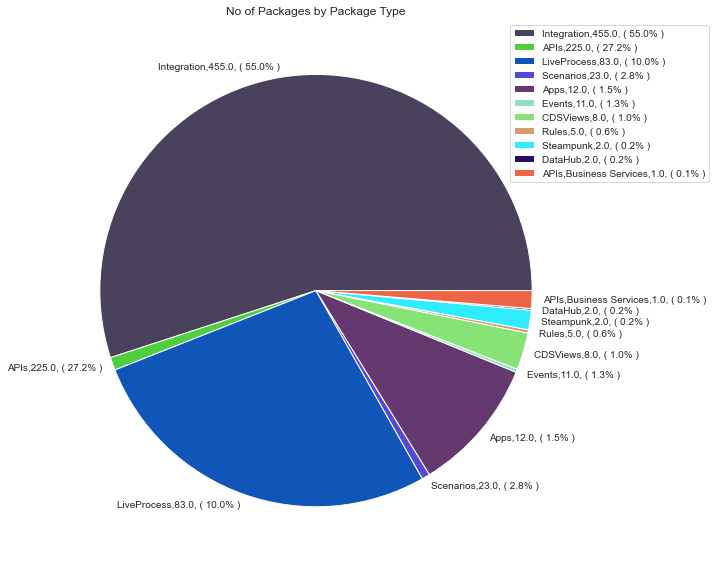

In [479]:
# Import librarie
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
import random

fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(111)



cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(df_common['Count'])))
# large = df_package_count[:len(df_package_count) / 2]
# small = df_package_count[len(df_package_count) / 2:]
# angle = 180 + float(sum(small[::2])) / sum(reordered) * 360

labels = df_common['Category'].values.tolist()
p = df_common['Category'].values.tolist()
q = df_common['Count'].values.tolist()
labels = [f'{l},{s:0.1f}, ( {t:0.1f}% )' for l, s, t in z]

color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(len(df_common))]

pie_wedge_collection = ax.pie(df_common['Count'],  labels=labels, labeldistance=1.05,colors=color);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax.set_title("No of Packages by Package Type");

# Creating dataset


# data = df_common['Count'].values.tolist()

# # Creating explode data

# explode = list()
# print("Type--",type(explode))
# for exp in range (len(data)):
#     explode.append(0.1)

# # # Creating color parameters
# # colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(len(sub_type))])
# # for i in range(n)]

# # Wedge properties
# wp = { 'linewidth' : 1, 'edgecolor' : "green"}

# # Creating autocpt arguments
# def func(pct, allvalues):
# 	absolute = (pct / 100.*np.sum(allvalues))
# # 	absolute = allvalues
# 	print("values--",absolute)
# 	return "{:.2f}%\n({:.0f})".format(pct, absolute)

# # Creating plot
# fig, ax = plt.subplots(figsize =(10, 7))
# wedges, texts, autotexts = ax.pie(data,
# 								autopct = lambda pct: func(pct, data),
# 								explode = explode,
# 								labels = labels,
# 								shadow = True,
								
# 								startangle = 270,
								
# 								textprops = dict(color ="Black",fontsize=15))
# ax.axis('equal')

# # Adding legend

# ax.legend(labels,
# 		title ="Package Type",
# 		loc ="right",
# 		bbox_to_anchor =(1, 0, 0.5, 1))

# plt.setp(autotexts, size = 15, weight ="bold")
# ax.set_title("API Distribution by It's Type",fontdict=dict(color ="Red",fontsize=15))
# plt.rcParams["figure.autolayout"] = True
# # show plot
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show();


# Artifact Analysis

In [153]:
response_artifacts = requests.get("https://api.sap.com/api/1.0/containergroup/ContentTypes?$expand=containers?$format=json")
response_artifacts

<Response [200]>

In [154]:
response_artifacts.json()

{'name': 'ContentTypes',
 'displayName': 'Explore Categories',
 'title': 'Categories',
 'description': 'Explore all the resources available from SAP and its partners',
 'supportedTypes': 'contentType',
 'groupOrder': 3,
 'createdBy': 'XXX',
 'modifiedBy': 'XXX',
 'createdDate': 1639118870830,
 'modifiedDate': 1662370894870,
 'containers': [{'name': 'API',
   'displayName': 'APIs',
   'shortText': 'Find APIs to integrate and extend.',
   'description': 'Explore API content from SAP and partners.',
   'type': 'contentType',
   'icon': 'API',
   'expression': [{'key': 'supportedPlatforms',
     'operator': '=',
     'values': ['SAP API Management', 'SAP Cloud Platform Open Connectors']}],
   'createdBy': 'XXX',
   'modifiedBy': 'XXX',
   'createdDate': 1639118870860,
   'modifiedDate': 1662370894873,
   'aggregation': '{"TotalPackages":226,"PackageType":{"SAP Cloud Platform Open Connectors":{"count":29},"SAP API Management":{"count":197}},"TotalArtifacts":3316,"ArtifactType":{"API":{"subT

In [155]:
response_artifacts.json().keys()

dict_keys(['name', 'displayName', 'title', 'description', 'supportedTypes', 'groupOrder', 'createdBy', 'modifiedBy', 'createdDate', 'modifiedDate', 'containers'])

In [181]:
import json
API_Aggregation = json.loads(response_artifacts.json()['containers'][0]['aggregation'])
API_Aggregation

{'TotalPackages': 226,
 'PackageType': {'SAP Cloud Platform Open Connectors': {'count': 29},
  'SAP API Management': {'count': 197}},
 'TotalArtifacts': 3316,
 'ArtifactType': {'API': {'subType': {'REST': {'count': 1173},
    'ODATA': {'count': 734},
    'ODATAV4': {'count': 425},
    'SOAP': {'count': 964}},
   'count': 3296},
  'PolicyTemplate': {'count': 20}}}

In [182]:
API_Aggregation['TotalArtifacts']

3316

In [187]:
API_Aggregation['ArtifactType'][list(API_Aggregation['ArtifactType'].keys())[0]].keys()

dict_keys(['subType', 'count'])

In [167]:
df_artifacts = pd.DataFrame(columns=['Artifact_Type','Artifact_Subtype','Count'])

In [202]:
m=0

# API Data -----------------------------------
API_Aggregation = json.loads(response_artifacts.json()['containers'][0]['aggregation'])
df_artifacts.loc[m,'Artifact_Type'] = 'API'
df_artifacts.loc[m,'Artifact_Subtype'] = 'SOAP_APIs'
df_artifacts.loc[m,'Count'] = API_Aggregation['ArtifactType']['API']['subType']['SOAP']['count']

m=m+1
df_artifacts.loc[m,'Artifact_Type'] = 'API'
df_artifacts.loc[m,'Artifact_Subtype'] = 'REST_APIs'
df_artifacts.loc[m,'Count'] = API_Aggregation['ArtifactType']['API']['subType']['REST']['count']

m=m+1
df_artifacts.loc[m,'Artifact_Type'] = 'API'
df_artifacts.loc[m,'Artifact_Subtype'] = 'OData_APIs'
df_artifacts.loc[m,'Count'] = API_Aggregation['ArtifactType']['API']['subType']['ODATA']['count']

m=m+1
df_artifacts.loc[m,'Artifact_Type'] = 'API'
df_artifacts.loc[m,'Artifact_Subtype'] = 'OData_APIs'
df_artifacts.loc[m,'Count'] = API_Aggregation['ArtifactType']['API']['subType']['ODATAV4']['count']

# Event Data -----------------------------------
Event_Aggregation = json.loads(response_artifacts.json()['containers'][1]['aggregation'])
m=m+1
df_artifacts.loc[m,'Artifact_Type'] = 'Event'
df_artifacts.loc[m,'Artifact_Subtype'] = 'Event'
df_artifacts.loc[m,'Count'] = Event_Aggregation['ArtifactType']['Event']['count']

# Integration Data ----------------------------------------
Integration_Aggregation = json.loads(response_artifacts.json()['containers'][2]['aggregation'])
m=m+1
df_artifacts.loc[m,'Artifact_Type'] = 'Integration'
df_artifacts.loc[m,'Artifact_Subtype'] = 'IFlow'
df_artifacts.loc[m,'Count'] = Integration_Aggregation['ArtifactType']['IFlow']['count']

m=m+1
df_artifacts.loc[m,'Artifact_Type'] = 'Integration'
df_artifacts.loc[m,'Artifact_Subtype'] = 'OData_Service'
df_artifacts.loc[m,'Count'] = Integration_Aggregation['ArtifactType']['OData Service']['count']

m=m+1
df_artifacts.loc[m,'Artifact_Type'] = 'Integration'
df_artifacts.loc[m,'Artifact_Subtype'] = 'Adapter_Storage'
df_artifacts.loc[m,'Count'] = Integration_Aggregation['ArtifactType']['IntegrationAdapter']['subType']['Storage']['count']

m=m+1
df_artifacts.loc[m,'Artifact_Type'] = 'Integration'
df_artifacts.loc[m,'Artifact_Subtype'] = 'Value_Mapping'
df_artifacts.loc[m,'Count'] = Integration_Aggregation['ArtifactType']['ValueMapping']['count']

m=m+1
df_artifacts.loc[m,'Artifact_Type'] = 'Integration'
df_artifacts.loc[m,'Artifact_Subtype'] = 'Script_Collection'
df_artifacts.loc[m,'Count'] = Integration_Aggregation['ArtifactType']['ScriptCollection']['count']

m=m+1
df_artifacts.loc[m,'Artifact_Type'] = 'Integration'
df_artifacts.loc[m,'Artifact_Subtype'] = 'Message_Mapping'
df_artifacts.loc[m,'Count'] = Integration_Aggregation['ArtifactType']['MessageMapping']['count']

# Adapters ----------------------------------------
Adapter_Aggregation = json.loads(response_artifacts.json()['containers'][3]['aggregation'])
m=m+1
df_artifacts.loc[m,'Artifact_Type'] = 'Adapter'
df_artifacts.loc[m,'Artifact_Subtype'] = 'Storage'
df_artifacts.loc[m,'Count'] = Integration_Aggregation['ArtifactType']['IntegrationAdapter']['subType']['Storage']['count']

df_artifacts

,Artifact_Type,Artifact_Subtype,Count
0,API,SOAP_APIs,964
1,API,REST_APIs,1173
2,API,OData_APIs,734
3,API,OData_APIs,425
4,Event,Event,285
5,Integration,IFlow,2586
6,Integration,OData_Service,2
7,Integration,Adapter_Storage,1
8,Integration,Value_Mapping,186
9,Integration,Script_Collection,12


In [199]:
Integration_Aggregation

{'TotalPackages': 435,
 'PackageType': {'SAP HANA Cloud Integration': {'count': 435}},
 'TotalArtifacts': 2802,
 'ArtifactType': {'IFlow': {'count': 2586},
  'OData Service': {'count': 2},
  'IntegrationAdapter': {'subType': {'Storage': {'count': 1}}, 'count': 1},
  'ValueMapping': {'count': 186},
  'ScriptCollection': {'count': 12},
  'MessageMapping': {'count': 15}}}

In [191]:
Event_Aggregation['ArtifactType']

{'API': {'subType': {'REST': {'count': 1173},
   'ODATA': {'count': 734},
   'ODATAV4': {'count': 425},
   'SOAP': {'count': 964}},
  'count': 3296},
 'PolicyTemplate': {'count': 20}}

In [21]:
#Constants
from datetime import date
Package_Creation_Date_From = '2022-08-07'
Package_Creation_Date_To =   '2022-09-07'
Package_Modification_Date_From = '2022-08-07'
Package_Modification_Date_To =   '2022-09-07'

In [45]:
#Calculate no of packages created within a timeframe
df_packages[(df_packages.Package_Creation_Date >= Package_Creation_Date_From) \
            & (df_packages.Package_Creation_Date <= Package_Creation_Date_To)
            & (df_packages.Package_Modification_Date == df_packages.Package_Creation_Date) \
           ]['Category'].value_counts()

Integration    15
APIs            2
LiveProcess     1
Name: Category, dtype: int64

In [47]:
#Calculate no of packages modified within a timeframe
df_packages[((df_packages.Package_Modification_Date >= Package_Modification_Date_From) \
            & (df_packages.Package_Modification_Date <= Package_Modification_Date_To)) \
            & (df_packages.Package_Modification_Date != df_packages.Package_Creation_Date) \
           ]['Category'].value_counts()

APIs           25
Integration    18
LiveProcess     5
Scenarios       4
Events          2
Name: Category, dtype: int64

In [48]:
#Calculate no of packages modified + Created within a timeframe
df_packages[((df_packages.Package_Modification_Date >= Package_Modification_Date_From) \
            & (df_packages.Package_Modification_Date <= Package_Modification_Date_To)) \
           ]['Category'].value_counts()

Integration    33
APIs           27
LiveProcess     6
Scenarios       4
Events          2
Name: Category, dtype: int64

# Filter only APIs Packages

In [60]:
#Take a backup before filter
df_packages_all_type = df_packages
df_packages = df_packages[df_packages['Category'] == 'APIs']
# or we can use below method for 2 values
# filter_values = ['APIs', 'Integration']
#df_packages = df_packages[df_packages['Category'] isin('filter_values')]
print(len(df_packages))
df_packages.head()

267


,Package_Id,Package_Title,Package_Short_Text,Package_Description,Organization_Name,Products,Support_Information,Category,Vendor,Package_Creation_Date,Package_Modification_Date
3,SAPConfigurePriceQuoteDeveloperTools,SAP Configure Price Quote - Developer Tools,Easily retrieve information stored in the SAP ...,"In this package, you can find tools that are u...",S4_PM_DISCRETE_IND_PRODUCE_CHEN,SAP CPQ,NaN,APIs,SAP,2022-03-24,2022-08-25
4,TrialPackage,Trial Package,Make it easy for employees to capture their ex...,Makes it easy for employees to capture their e...,DEFAULT_ORG,Concur Expense,NaN,APIs,SAP,2021-11-02,2022-08-25
24,InternalCP,Internal Content package,Internal content package test,Internal content package test,SAP,None,None,APIs,SAP,2020-09-22,2022-08-25
27,SAPCloudIdentityAccessGovernanceAccessRequestS...,"SAP Cloud Identity Access Governance, Access R...",Access APIs seamlessly across heterogenous lan...,The Access Request API enables external applic...,PE_LOB_GRC_2_US,SAP Cloud Identity Access Governance access re...,None,APIs,SAP,2021-10-21,2022-08-25
30,CloudIntegrationAPI,SAP Cloud Integration,Simplify end-to-end process integration across...,SAP Cloud Integration supports end-to-end proc...,PI_SAPCP_IO,SAP Cloud Integration,LOD-HCI-PI*,APIs,SAP,2019-09-18,2022-08-25


In [15]:
df_packages.reset_index(inplace=True, drop=True)
df_packages

,Package_Id,Package_Title,Package_Short_Text,Package_Description,Organization_Name,Products,Support_Information,Category,Vendor,Package_Creation_Date,Package_Modification_Date
0,com.wipro.bpm.utilities.prosumeronboarding,Prosumer Onboarding Workflow for Energy and Ut...,Automates various activities from the point wh...,<p>The Prosumer&nbsp;Onboarding&nbsp;Workflow ...,PARTNER_WIPRO_LTD,"SAPCloudPlatform,SAPCloudPlatformIntegrationSu...",NaN,LiveProcess,Wipro Limited,2022-07-04,2022-01-09
1,SAPSuccessFactorsLearningandSAPERPFinancialsIn...,SAP SuccessFactors Learning and SAP ERP Financ...,Post course fee for completed learning transac...,<p></p> \n<p></p> \n<p>This integration helps ...,HCM_PLAT_INT,"SAPFI,SAPERP,SAPSuccessFactorsLearning,SAPS4HA...",NaN,Integration,SAP,2020-12-17,2022-01-09
2,SourcetoPayHybrid,Source to Pay for Hybrid Deployment,"Covers strategic and operational procurement, ...",<p>Source-to-Pay provides an end-to-end scenar...,TI_SAP_CP_IO_DTS_CONTENTADMIN,"SAPAribaCloudIntegrationGateway,SAPS4HANA,SAPA...",NaN,Scenarios,SAP,2021-10-21,2022-01-09
3,SAPConfigurePriceQuoteDeveloperTools,SAP Configure Price Quote - Developer Tools,Easily retrieve information stored in the SAP ...,"In this package, you can find tools that are u...",S4_PM_DISCRETE_IND_PRODUCE_CHEN,SAP CPQ,NaN,APIs,SAP,2022-03-24,2022-01-09
4,TrialPackage,Trial Package,Make it easy for employees to capture their ex...,Makes it easy for employees to capture their e...,DEFAULT_ORG,Concur Expense,NaN,APIs,SAP,2021-11-02,2022-01-09
...,...,...,...,...,...,...,...,...,...,...,...
947,EmbedBusinessRulesinCustomApplication,Embed Business Rules in Custom Application,Extend cloud applications by embedding rules b...,<p><strong>SAP Business Rules</strong> is a se...,PI_ICD_IE_FND_APPS_DI_IN,"SAP Business Application Studio,SAP Business R...",None,Apps,SAP,2019-09-19,2022-01-09
948,SAPCommerceCloudIntegrationwithERP,SAP Commerce Cloud Integration with SAP ERP,Integration between SAP Commerce Cloud and SAP...,<p>Integration between SAP&nbsp;Commerce Cloud...,Y_COMMERCE_PLAT,"SAPCommerceCloud,SAPERP,SAPCloudPlatformIntegr...",CEC-COM-BSC-SLS-AOM,Integration,SAP,2019-09-18,2022-01-09
949,sapcommercecloud,SAP Commerce Cloud,Discover SAP Commerce Cloud REST APIs for Comm...,SAP Commerce Cloud provides a broad set of RES...,SAP_Customer_Experience_Commerce,SAP Commerce Cloud,None,APIs,SAP,2019-09-18,2022-01-09
950,SAPS4HANACloudCDSViewsforSourcingProcurement,SAP S/4HANA Cloud for Sourcing and Procurement,"Explore, extend and adapt the SAP S/4HANA Clou...",<p><strong>HEADS UP:</strong> SAP S/4HANA Clou...,S4HANA_CLOUD,SAPS4HANACloud,CA-GTF-EI,CDSViews,SAP,2019-09-18,2022-01-09


# Fetching APIs of Packages

In [62]:
df_packages_api_temp = pd.DataFrame(columns=['Package_Id','Package_Title','API_Id','API_Type','API_Title','Sub_Type','API_URL','Error'])
df_packages_api = pd.DataFrame(columns=['Package_Id','Package_Title','API_Id','API_Type','API_Title','Sub_Type','API_Creation_Date','API_Modification_Date','API_URL','Error'])

for x in range (len(df_packages)):
# #     print(df_packages.loc[x,'Package_Id'])
#     print("x---",df_packages.loc[3,'Package_Id'])
    url_apis = "https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/ContentPackages('" + df_packages.loc[x,'Package_Id'] + "')/Artifacts?$format=json"
    
#     print("API_URL--",url_apis)
    response_package_api = requests.get(url_apis)
    packages_api = response_package_api.json()
#     print("No of APIs -- ",len(packages_api["d"]['results']))
#     if len(df_packages_api_temp) > 0:
    #Initializing the dataframe with blank values
    df_packages_api_temp = pd.DataFrame(columns=df_packages_api_temp.columns)
    try:
        for i in range (len(packages_api["d"]['results'])):
            df_packages_api_temp.loc[i,"Package_Id"] = df_packages.loc[x,'Package_Id']
            df_packages_api_temp.loc[i,"Package_Title"] = df_packages.loc[x,'Package_Title']
            
            df_packages_api_temp.loc[i,"API_Id"] = packages_api["d"]['results'][i]["Name"]
            #             print("Printing name--",i,packages_api["d"]['results'][i]["Name"])
            df_packages_api_temp.loc[i,"API_Type"] = packages_api["d"]['results'][i]["Type"]
#             print("Printing type--",i,packages_api["d"]['results'][i]["Type"])
            df_packages_api_temp.loc[i,"API_Title"] = packages_api["d"]['results'][i]["DisplayName"]
#             print("Printing DisplayName--",i,packages_api["d"]['results'][i]["DisplayName"])
            df_packages_api_temp.loc[i,'Sub_Type'] = packages_api["d"]['results'][i]["SubType"]
#             print("Printing SubType--",i,packages_api["d"]['results'][i]["SubType"])
            df_packages_api_temp.loc[i,'API_Creation_Date'] = packages_api["d"]['results'][i]["CreatedAt"]
            df_packages_api_temp.loc[i,'API_Modification_Date'] = packages_api["d"]['results'][i]["ModifiedAt"]
            api_url = "https://api.sap.com/api/" + packages_api["d"]['results'][i]["Name"] + "/overview"
            df_packages_api_temp.loc[i,'API_URL'] =  repr(api_url)
#             print("Printing API_URL--",i,url_apis)
            df_packages_api_temp.loc[i,'Error'] = "No Error"
            
        df_packages_api = pd.concat([df_packages_api,df_packages_api_temp])
        df_packages_api.reset_index(inplace=True, drop=True)
#         print("Temp Package")
#         display(df_packages_api_temp)
#         print("Consoldaited Package")
#         display(df_packages_api)
    except:
        print("Exception caught")
        df_packages_api_temp.loc[i,"Error"] = "Error in the API_URL formed"
        df_packages_api_temp.loc[i,"API_URL"] = url_apis
#         df_packages_api.append(df_packages_api_temp, ignore_index = True)
        continue

# response_package_api
df_packages_api

,Package_Id,Package_Title,API_Id,API_Type,API_Title,Sub_Type,API_Creation_Date,API_Modification_Date,API_URL,Error
0,SAPConfigurePriceQuoteDeveloperTools,SAP Configure Price Quote - Developer Tools,SAPCPQEventLogReader,API,Event Log Reader,REST,/Date(1648066475890)/,/Date(1661372294356)/,'https://api.sap.com/api/SAPCPQEventLogReader/...,No Error
1,TrialPackage,Trial Package,TrialAPI,API,Trial Allocations,REST,/Date(1612988494450)/,/Date(1661373916033)/,'https://api.sap.com/api/TrialAPI/overview',No Error
2,InternalCP,Internal Content package,InternalCPAPI,API,InternalCPAPI,ODATA,/Date(1600760718210)/,/Date(1661371942386)/,'https://api.sap.com/api/InternalCPAPI/overview',No Error
3,SAPCloudIdentityAccessGovernanceAccessRequestS...,"SAP Cloud Identity Access Governance, Access R...",GetRequestStatus,API,Request Status,REST,/Date(1634760854803)/,/Date(1661372240556)/,'https://api.sap.com/api/GetRequestStatus/over...,No Error
4,SAPCloudIdentityAccessGovernanceAccessRequestS...,"SAP Cloud Identity Access Governance, Access R...",GetAccess,API,Access Search,REST,/Date(1634760854803)/,/Date(1661372240580)/,'https://api.sap.com/api/GetAccess/overview',No Error
...,...,...,...,...,...,...,...,...,...,...
3195,PolicyTemplatePublishPackageCH,PolicyTemplatePublishPackageCH,AllThePolicies,PolicyTemplate,AllThePolicies,None,/Date(1642997239936)/,/Date(1642997240370)/,'https://api.sap.com/api/AllThePolicies/overview',No Error
3196,SAPC4EEDSAPIs,SAP Cloud for Energy,cim,API,Energy Data Services,REST,/Date(1568957658350)/,/Date(1661372232483)/,'https://api.sap.com/api/cim/overview',No Error
3197,SAPC4EEDSAPIs,SAP Cloud for Energy,slp,API,Synthetic Load Profiles,REST,/Date(1599682286426)/,/Date(1661372232503)/,'https://api.sap.com/api/slp/overview',No Error
3198,SAPC4EEDSAPIs,SAP Cloud for Energy,bi,API,Billing Integration,REST,/Date(1585171563536)/,/Date(1661372232523)/,'https://api.sap.com/api/bi/overview',No Error


In [63]:
df_packages_api.to_csv("Packages_and_API.csv")

In [16]:
#Reading all the packages from API Hub
import pandas as pd
#Request class is used to read the APIs and store it in dataframe
import requests
import json
df_packages_api = pd.read_csv("Packages_and_API.csv")
# include index=False while importing the csv to avoid unnecessary unnamed columns of csv file
# Since we did not include that we have to remove unnamed column

In [17]:
df_packages_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             3200 non-null   int64 
 1   Package_Id             3200 non-null   object
 2   Package_Title          3200 non-null   object
 3   API_Id                 3200 non-null   object
 4   API_Type               3200 non-null   object
 5   API_Title              3200 non-null   object
 6   Sub_Type               3178 non-null   object
 7   API_Creation_Date      3200 non-null   object
 8   API_Modification_Date  3200 non-null   object
 9   API_URL                3200 non-null   object
 10  Error                  3200 non-null   object
dtypes: int64(1), object(10)
memory usage: 275.1+ KB


In [18]:
df_packages_api.drop(['Unnamed: 0'], inplace=True, axis=1)

In [19]:
df_packages_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Package_Id             3200 non-null   object
 1   Package_Title          3200 non-null   object
 2   API_Id                 3200 non-null   object
 3   API_Type               3200 non-null   object
 4   API_Title              3200 non-null   object
 5   Sub_Type               3178 non-null   object
 6   API_Creation_Date      3200 non-null   object
 7   API_Modification_Date  3200 non-null   object
 8   API_URL                3200 non-null   object
 9   Error                  3200 non-null   object
dtypes: object(10)
memory usage: 250.1+ KB


In [22]:
sub_type = df_packages_api['Sub_Type'].value_counts().reset_index()
sub_type

,index,Sub_Type
0,REST,1232
1,SOAP,868
2,ODATA,682
3,ODATAV4,395
4,GRAPHQL,1


In [84]:
null_sub_type = pd.isnull(df_packages_api['Sub_Type'])
df_packages_api[null_sub_type]

,Package_Id,Package_Title,API_Id,API_Type,API_Title,Sub_Type,API_Creation_Date,API_Modification_Date,API_URL,Error
573,SAPCloudFoundryConnectivity,Connect to SAP Cloud Foundry Services,SAPCloudFoundryXSUAAJWTToken,PolicyTemplate,SAP Cloud Foundry XSUAA JWTToken,NaN,/Date(1568957082243)/,/Date(1661371762576)/,'https://api.sap.com/api/SAPCloudFoundryXSUAAJ...,No Error
574,SAPCloudFoundryConnectivity,Connect to SAP Cloud Foundry Services,SAPCloudFoundrySAML2OAuthFlow,PolicyTemplate,SAP Cloud Foundry SAML2OAuth Flow,NaN,/Date(1568957082246)/,/Date(1661371762603)/,'https://api.sap.com/api/SAPCloudFoundrySAML2O...,No Error
576,SecurityBestPractices,SAP API Management Security Best Practices,Quota_With_429_Status_Code,PolicyTemplate,Quota With 429 Status Code,NaN,/Date(1568957668843)/,/Date(1661372087486)/,'https://api.sap.com/api/Quota_With_429_Status...,No Error
577,SecurityBestPractices,SAP API Management Security Best Practices,Verify_APIKey_ByQueryParam,PolicyTemplate,Verify APIKey By QueryParam,NaN,/Date(1568957668843)/,/Date(1661372087506)/,'https://api.sap.com/api/Verify_APIKey_ByQuery...,No Error
578,SecurityBestPractices,SAP API Management Security Best Practices,Verify_APIKey_ByHeader,PolicyTemplate,Verify APIKey By Header,NaN,/Date(1568957668846)/,/Date(1661372087523)/,'https://api.sap.com/api/Verify_APIKey_ByHeade...,No Error
579,SecurityBestPractices,SAP API Management Security Best Practices,OAuthRFCCompliant,PolicyTemplate,OAuth RFC Compliant,NaN,/Date(1643227945143)/,/Date(1661372087543)/,'https://api.sap.com/api/OAuthRFCCompliant/ove...,No Error
580,SecurityBestPractices,SAP API Management Security Best Practices,SQL_Threat_Protection,PolicyTemplate,SQL Threat Protection,NaN,/Date(1568957668850)/,/Date(1661372087560)/,'https://api.sap.com/api/SQL_Threat_Protection...,No Error
581,SecurityBestPractices,SAP API Management Security Best Practices,URL_Masking,PolicyTemplate,URL Masking,NaN,/Date(1568957668853)/,/Date(1661372087576)/,'https://api.sap.com/api/URL_Masking/overview',No Error
582,SecurityBestPractices,SAP API Management Security Best Practices,XML_Threat_Protection,PolicyTemplate,XML Threat Protection,NaN,/Date(1568957668856)/,/Date(1661372087593)/,'https://api.sap.com/api/XML_Threat_Protection...,No Error
583,SecurityBestPractices,SAP API Management Security Best Practices,JWTTokenVerificationPolicy,PolicyTemplate,JWT Token Verification Policy template,NaN,/Date(1595995633186)/,/Date(1661372087610)/,'https://api.sap.com/api/JWTTokenVerificationP...,No Error


In [87]:
df_packages_api['Sub_Type'] = df_packages_api['Sub_Type'].fillna(df_packages_api['API_Type'])
df_packages_api['Sub_Type'].value_counts()
sub_type = df_packages_api['Sub_Type'].value_counts().reset_index()
sub_type

,index,Sub_Type
0,REST,1232
1,SOAP,868
2,ODATA,682
3,ODATAV4,395
4,PolicyTemplate,22
5,GRAPHQL,1


In [93]:
def swap_rows(df, i1, i2):
    a, b = df.iloc[i1, :].copy(), df.iloc[i2, :].copy()
    df.iloc[i1, :], df.iloc[i2, :] = b, a
    return df

# swap_rows(sub_type,2,4)
swap_rows(sub_type,4,5)
sub_type

,index,Sub_Type
0,REST,1232
1,SOAP,868
2,PolicyTemplate,22
3,ODATAV4,395
4,GRAPHQL,1
5,ODATA,682


Type-- <class 'list'>
values-- 1231.9999694824219
values-- 868.0000305175781
values-- 21.99999988079071
values-- 395.0000047683716
values-- 0.9999999776482582
values-- 682.0000171661377


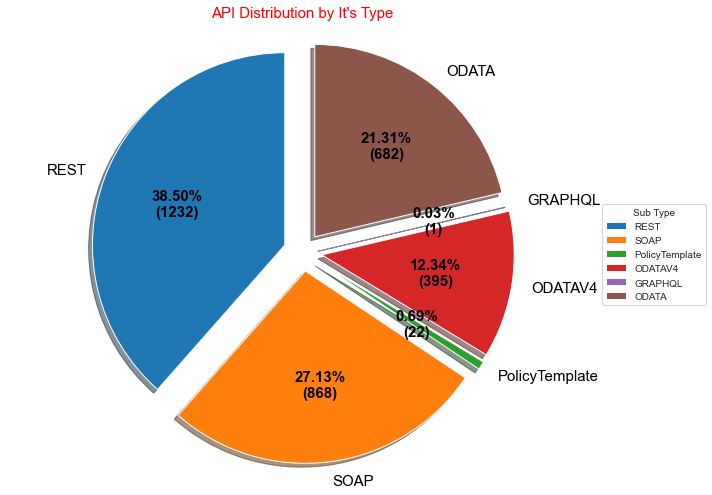

In [103]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
labels_Sub_Type = sub_type['index'].values.tolist()

data = sub_type['Sub_Type'].values.tolist()

# Creating explode data

explode = list()
print("Type--",type(explode))
for exp in range (len(data)):
    explode.append(0.1)

# # Creating color parameters
# colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(len(sub_type))])
# for i in range(n)]

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green"}

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = (pct / 100.*np.sum(allvalues))
# 	absolute = allvalues
	print("values--",absolute)
	return "{:.2f}%\n({:.0f})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = sub_type['index'],
								shadow = True,
								
								startangle = 90,
								
								textprops = dict(color ="Black",fontsize=15))
ax.axis('equal')

# Adding legend
ax.legend(wedges, labels_Sub_Type,
		title ="Sub Type",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 15, weight ="bold")
ax.set_title("API Distribution by It's Type",fontdict=dict(color ="Red",fontsize=15))

# show plot
plt.show()


In [110]:
df_packages_api.query("Sub_Type == 'GRAPHQL'").head()

,Package_Id,Package_Title,API_Id,API_Type,API_Title,Sub_Type,API_Creation_Date,API_Modification_Date,API_URL,Error
2997,TestGraphQLPackage,Test GraphQL Package,TestGraphQL,API,Test Graph QL,GRAPHQL,/Date(1658493667010)/,/Date(1658493667016)/,'https://api.sap.com/api/TestGraphQL/overview',No Error


In [104]:
# df_packages_api['Package_Id'].value_counts().to_csv('API_Coun\eulerts.csv')
df_counts = df_packages_api['Package_Id'].value_counts()
# df_counts['SAPS4HANACloud']
df_counts

SAPS4HANACloud                  676
S4HANAOPAPI                     500
FieldglassAPI                   227
BYD                             206
SAPAribaWebServices             111
                               ... 
ConversationAPI                   1
Litmos                            1
PackageaddAPItotheAPICockpit      1
APICSNTests                       1
sapcommercecloud                  1
Name: Package_Id, Length: 263, dtype: int64

In [113]:
import sidetable
# sidetable is mix of crosstab, groupby and value_counts
# sidetable can also be used for groupby totals, counts, subtotal, missing values, flattening table
# check the article https://github.com/chris1610/sidetable
df_packages_api.stb.freq(['Package_Id'],style = True, thresh = 70, other_label='Rest of API Package')

C:\Users\I069554\Anaconda3\lib\site-packages\sidetable\sidetable.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results[results[other_label] == False].append(


,Package_Id,count,percent,cumulative_count,cumulative_percent
0,SAPS4HANACloud,676,21.12%,676,21.12%
1,S4HANAOPAPI,500,15.62%,"1,176",36.75%
2,FieldglassAPI,227,7.09%,"1,403",43.84%
3,BYD,206,6.44%,"1,609",50.28%
4,SAPAribaWebServices,111,3.47%,"1,720",53.75%
5,SAPAribaOpenAPIs,78,2.44%,"1,798",56.19%
6,SAPDigitalManufacturingCloud,52,1.62%,"1,850",57.81%
7,SAPS4HANAMarketingCloud,47,1.47%,"1,897",59.28%
8,SAPReturnablePackagingManagement,47,1.47%,"1,944",60.75%
9,SAPIntelligentAgriculture,43,1.34%,"1,987",62.09%


In [28]:
def count_occurence(column_name):
    df_counts1 = df_packages_api['Package_Id'].value_counts()
    y = df_counts1[column_name]
    return y

In [10]:
count_occurence('SAPS4HANACloud')

676

In [48]:
api_list = []
# print("initial length--",len(api_list), df_packages_api.loc[0,'API_Id'])
for z in range (len(df_packages_api)):
#     print("value of z--",z)
    api_list.append(df_packages_api.loc[z,'API_Id'])

print("Total APIs--",len(api_list))

Total APIs-- 3189


In [32]:
df_apis_metadata['APIs_Metadata'][0]

{'x-odata-version': '4.0',
 'swagger': '2.0',
 'info': {'title': 'Event Log Reader',
  'description': 'Using the EventLogReader API, you can access and retrieve the log entries that are recorded in the SAP Configure Price Quote log. It is possible to retrieve either the complete content of the log, or a specific log entry by using that entry’s ID. In addition to that, you can retrieve the total number of records that are contained in the log. Another functionality provided by this API is retrieving the time zone of the SAP CPQ server. ',
  'version': '1.0'},
 'x-sap-shortText': 'Allows you to externally retrieve log records, the number of records, or the server time zone.',
 'x-servers': [{'url': 'https://{Customer Environment}.webcomcpq.com',
   'description': 'SAP Configure Price Quote production',
   'templates': {'Customer Environment': {'description': 'Customer environment'}}}],
 'host': 'hostname',
 'securityDefinitions': {'apiKeyAuth': {'type': 'apiKey',
   'in': 'header',
   'n

# Fetching Operations and it's detail for each API

In [49]:
# headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
# response = requests.get("https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('vehiclesnetworks')/$value?type=json")
# response

# api_list = []
# api_list.append("vehiclesnetworks")
# api_list.append("BANK_0002")
# api_list
loop_no = 0
list_response = {}
for api_name in api_list:
    api_url = "https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('" + api_name + "')/$value?type=json"
    loop_no = loop_no + 1
    remainder = loop_no % 10
    
    if (remainder == 0):
        print("loop_no-->",loop_no,"--",api_url)
    
    try:
        response = requests.get(api_url)
        data_final = response.json()
#         list_response.append(data_final)
        list_response[api_name] = data_final
#         list_response['API_Metadata'] = data_final
#         print("Dictionary built--",list_response)
#         if loop_no == 5:
#             break
    except:
        print("URL-------> ",api_url," could not be found")

# dictionary of lists  
# dict = {'APIs_Metadata': list_response}
api_dict = {
    'API_Id' : list_response.keys(),
    'API_Metadata' : list_response.values(),
   }
  
# creating a Dataframe object 
df_apis_metadata = pd.DataFrame(api_dict)
# df_apis_metadata = pd.DataFrame(list_response) 
    
# saving the dataframe 
# print("No of APIs for which we get the response from API-->",len(list_response))
df_apis_metadata.to_csv("list_response.csv")

loop_no--> 10 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('APIGetPriority')/$value?type=json
loop_no--> 20 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('OP_CO_SDMD_ESR_DISTR_CHANNEL')/$value?type=json
loop_no--> 30 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('OP_CO_MDM_PRD_BULK_REPL_REQ_OUT')/$value?type=json
loop_no--> 40 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('OP_API_PMRPFLEXIBLECONSTRAINT_0001')/$value?type=json
loop_no--> 50 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('OP_SUBSCRIPTIONBDRREQUEST_IN')/$value?type=json
loop_no--> 60 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('OP_API_RESPYM_T

loop_no--> 480 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('OP_SERVICEENTRYSHEETREQUEST_IN')/$value?type=json
loop_no--> 490 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('OP_API_PACKINGINSTRUCTION_0001')/$value?type=json
loop_no--> 500 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('OP_CO_SDBIL_ESR_CDM_SBI_OUT')/$value?type=json
loop_no--> 510 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('OP_CO_LOG_MDR_PLANT')/$value?type=json
loop_no--> 520 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('CompanyProfileAPI')/$value?type=json
loop_no--> 530 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('ManageAnnouncementsAP

loop_no--> 820 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('PSM_ISI_R_II_FOP_MANAGE_PAYORD_ENTRY_IN')/$value?type=json
loop_no--> 830 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('PSM_ISI_R_II_QUERY_ISTOCK_IN')/$value?type=json
loop_no--> 840 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('PSM_ISI_R_II_APCRM_QUERY_LEAD_IN')/$value?type=json
loop_no--> 850 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('PSM_ISI_R_II_QUERY_PRODUCTION_MODEL_IN')/$value?type=json
loop_no--> 860 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('PSM_ISI_R_II_QUERY_BUPA_IN')/$value?type=json
loop_no--> 870 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.sv

loop_no--> 1300 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('CE_WHSEFIXEDBINASSIGNMENT_0001')/$value?type=json
loop_no--> 1310 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('CE_LEGALCONTEXT_0001')/$value?type=json
loop_no--> 1320 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('CO_PUR_ORDER_STATUS_NOTIF_OUT')/$value?type=json
loop_no--> 1330 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('CO_PUR_REQUISITION_STATUS_OUT')/$value?type=json
loop_no--> 1340 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('API_MANAGE_SKILLTAGS_SRV')/$value?type=json
loop_no--> 1350 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('API_PR

loop_no--> 1790 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('outlookemail')/$value?type=json
URL------->  https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('Hybris_Connectivity')/$value?type=json  could not be found
loop_no--> 1800 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('GTT_OrderEvents_Provider')/$value?type=json
loop_no--> 1810 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('Organizations')/$value?type=json
loop_no--> 1820 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('CCPA')/$value?type=json
loop_no--> 1830 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('Groups')/$value?type=json
loop_no--> 1840 -- https:/

loop_no--> 2270 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('API_MKT_QUERYBUSINESSUSERMETADATAIN')/$value?type=json
loop_no--> 2280 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('API_MKT_CO_KEY_MAP_RPLCTCO')/$value?type=json
loop_no--> 2290 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('API_MKT_LANDING_PAGE_VALUEHELP_SRV')/$value?type=json
loop_no--> 2300 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('API_MKT_CAMPAIGN_MESSAGE_SRV')/$value?type=json
loop_no--> 2310 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('API_MKT_EXTERNAL_RECMDN_SRV')/$value?type=json
loop_no--> 2320 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APICo

loop_no--> 2720 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('ECPersonalInformation')/$value?type=json
loop_no--> 2730 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('ECPositionManagement')/$value?type=json
URL------->  https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('SuccessFactors_OAuth2SAMLAssertion')/$value?type=json  could not be found
loop_no--> 2740 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('ConfigurationAPI')/$value?type=json
URL------->  https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('Cloud_Platform_Connectivity')/$value?type=json  could not be found
loop_no--> 2750 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIConten

loop_no--> 3170 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('servicemax')/$value?type=json
loop_no--> 3180 -- https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('stoppayment')/$value?type=json
URL------->  https://nimbusdevu211gt2yln-mt0zqysbgq.int.sap.eu2.hana.ondemand.com/odata/1.0/catalog.svc/APIContent.APIs('AllThePolicies')/$value?type=json  could not be found


In [53]:
df_apis_metadata.head(2)

,API_Id,API_Metadata
0,SAPCPQEventLogReader,"{'x-odata-version': '4.0', 'swagger': '2.0', '..."
1,TrialAPI,"{'swagger': '2.0', 'host': 'sandbox.api.sap.co..."


In [1]:
import pandas as pd
df_list_response = pd.read_csv("list_response.csv", index_col=0)
df_list_response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3165 entries, 0 to 3164
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   API_Id        3165 non-null   object
 1   API_Metadata  3165 non-null   object
dtypes: object(2)
memory usage: 74.2+ KB


In [11]:
test_df = df_list_response[:]

In [12]:
# Convert disctionary string to dictionary
import ast
test = test_df['API_Metadata'][5]
print("type===",type(test))
# dict = json.loads(test)
test = ast.literal_eval(test_df['API_Metadata'][5])
test['info']['title']

type=== <class 'str'>


'Application User'

In [13]:
# for api_data in list_response:
#     print(api_data.keys())

# print("No of APIs for which we get the response from API-->",len(df_list_responselist_response))

# api_type = ''
# for api_data in list_response:
# #     data = response.json()
# #     print("response",response)
# #     print(pd.DataFrame(data['paths']))
    
# #     print(api_data['info']['title'])
#     if 'swagger' in api_data.keys():
#         api_type = 'swagger'
#     if 'openapi' in api_data.keys():
#         api_type = 'openapi'


# # api_data['components']['securitySchemes']

import pandas as pd
import ast
# i=0
# df_path_reset = pd.DataFrame()
# df_path = pd.DataFrame()
df_path_values = pd.DataFrame(columns = ['index'])
df_api_header = pd.DataFrame(columns = ['API_Id','API_Title', 'API_Status','API_Version','API_Short_Text', 'API_Description','Security_Scheme','Production_URL','Operation_Type'])
df_path_reset1 = pd.DataFrame()
sample_dictionary = {1:1,2:2}
Security_Scheme = ''
counter = 0
count = -1

for n in range(len(test_df)):
    api_data = test_df['API_Metadata'][n]
    api_id = test_df['API_Id'][n]
    api_data = ast.literal_eval(api_data)
#     print(api_data["info"]["title"])
    count = count + 1
    try:
#     print("Start")
#     display(api_data["info"]["title"])
#     print("end")

        if 'swagger' in api_data.keys():
            api_type = 'swagger'
        elif 'openapi' in api_data.keys():
            api_type = 'openapi'
        else:
            api_type = 'None'

        Production_URL = 'Not Defined'
        try:
            if api_type == 'swagger':
                Production_URL = api_data['x-servers'][0]['url']
    #             print("production url",df_api_header[["Production_URL"]])
            else:
                Production_URL = api_data['servers'][0]['url']
        except:
            print("production URL could not be derived")

        Security_Scheme = 'Not Defined'
        try:
            if api_type == 'swagger':
    #             print("inside swagger")
                Security_Scheme = api_data['securityDefinitions']
    #             print("Security_Scheme---",Security_Scheme)
            else:
    #             print("inside open api")
                Security_Scheme = api_data['components']['securitySchemes']
    #             print("Security_Scheme--",Security_Scheme)
        except:
            print("security scheme could not be derived")
        
        api_state = 'Not Defined'
        try:
            api_state = api_data['x-sap-stateInfo']['state']
        except:
            print("API Status could not be derived")
        
        api_version = 'Not Defined'
        try:
            api_version = api_data['info']['version']
        except:
            print("API Status could not be derived")

    #     print(api_data)
    #     df_api_header[["API_Title"]] = api_data['info']['title']
    #     df_api_header[["API_Short_Text"]] = api_data['x-sap-shortText']
    #     df_api_header[["API_Description"]] = api_data['info']['description']

        # Parsing the path to get all the operations
    #     dfx = pd.json_normalize(api_data, max_level=0)
    #     print("df = pd.json_normalize(data, max_level=0)---",dfx)
        df_path = pd.DataFrame(api_data['paths']).transpose()
    #     print('df_path--',df_path)
        df_path_reset = df_path.reset_index()
        df_path_values = pd.concat([df_path_values,df_path_reset], ignore_index=True)
    #     display("df_path_values",df_path_values)
#         print("df_path_values--",df_path_values)
        df_path_reset = df_path_reset.drop(["index"], axis=1)

#         print("length of df_path_reset--",len(df_path_reset))
        for i in range(len(df_path_reset)):

            for j in df_path_reset.columns:
    #             print(type(df_path_reset.loc[i,j]))
                if type(df_path_reset.loc[i,j]) == type(sample_dictionary):
                    for k in df_path_reset.loc[i,j]:
                        if type(df_path_reset.loc[i,j]) == type(sample_dictionary):
    #                     print(k)
    #                     print(df3.loc[i,j][k])
                            if k == 'summary' or k == 'description' or k == 'tags':
    #                         print(k,'--',df3.loc[i,j][k])
    #                             print(j,'-',k)
                                col_name =  j + '-' + k
    #                             print("df_path_reset.loc[i,j][k]--",df_path_reset.loc[i,j][k])
    #                             print("i--",i)
    #                             print("colom name -- ",col_name)
                                try:
#                                     print("Operation Type",j)
                                    df_path_reset1.loc[counter,"API_Id"] = api_id
#                                     print("api_id",api_id)
                                    df_path_reset1.loc[counter,"API_Title"] = api_data['info']['title']
#                                     print("api_data['info']['title']--",api_data['info']['title'])
                                    df_path_reset1.loc[counter,"API_Status"] = api_state
#                                     print('api_state',api_state)
                                    df_path_reset1.loc[counter,"API_Version"] = api_version
#                                     print('api_version',api_version)    
                                    df_path_reset1.loc[counter,'API_Short_Text'] = api_data['x-sap-shortText']
#                                     print('api_data[x-sap-shortText]',api_data['x-sap-shortText'])
                                    df_path_reset1.loc[counter,'API_Description'] = api_data['info']['description']
#                                     print('API Desc--',api_data['info']['description'])
                                    df_path_reset1.loc[counter,'Production_URL'] = Production_URL
    #                                 print("Security_Scheme",type(Security_Scheme))
                                    df_path_reset1.loc[counter,"Security_Scheme"] = str(Security_Scheme)             
#                                     df_path_reset1.loc[counter,col_name] = df_path_reset.loc[i,j][k]
                                    df_path_reset1.loc[counter,"Operation_Type"] = j
#                                     print("Operation Type",j)
                                    df_path_reset1.loc[counter, k] = df_path_reset.loc[i,j][k]
                                    

                                except:
                                    print("Exception occured in last loop for counter--",counter)
                                    continue
            counter = counter + 1
#             print("length of df_path_reset1 at counter-",counter,"is--",len(df_path_reset1))


# print("Counter",counter)
# display(df_path_reset1)
    except:
        print("Exception raised in main loop for api_data in list_response: in the rwo no-->",count, "for API ---", api_data["info"]["title"])
        continue
        
print("df_path_values--")        
display(df_path_values)   
print("df_path_reset1--")        
display(df_path_reset1)    
# df_final = pd.concat([df_path_values, df_path_reset1], axis=1, join='inner')
# display(df_final)


API Status could not be derived
security scheme could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 19 for API --- Distribution Channel - Replicate
production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 22 for API --- Service Contract - Notification Processing (Asynchrono

production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 99 for API --- Sales Order - Send Error Log (A2A)
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 100 for API --- Revenue Accounting Contract - Process Order Items
production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 101 for API --- Sales Division - Replicate
production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 103 for API --- Production Version - Replicate
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_re

production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 180 for API --- Sales Order - Confirm Processing (A2A)
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 181 for API --- Appointment Activity (Asynchronous)
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 182 for API --- Business User - Read
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 183 for API --- Service Order - Create, Change (Asynchronous)
production URL could not be derived
security scheme could not be derived
API Status could not 

production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 267 for API --- Full Payment - Bulk Send
production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 271 for API --- Assignment of Plant to Purchasing Organization – Replicate
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 272 for API --- Service Order (Bulk) - Create, Change (Asynchronous)
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 273 for API --- Key Mapping - Replicate from Client to SAP S/4HANA
production URL could not be derived
security scheme could not be derived
API Sta

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 355 for API --- Statistical Key Figure - Post
production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 356 for API --- Self-Billing Invoice - Send Creation Confirmation
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 357 for API --- Characteristic Data for Classification ‒ Confirmation (Asynchronous, Inbound)
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 360 for API --- Quality Certificate Receipt – Create, Update (A2X)
production URL could not be

production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 453 for API --- Master Recipe - Replicate
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 454 for API --- Sales Order/Customer Return - Create, Update, Cancel (B2B)
production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 462 for API --- Region - Replicate (A2X)
production URL could not be derived
security scheme could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 465 for API --- Supplier Quotation - Send Confirmation (Outbound)
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for a

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 7190
Exception occured in last loop for counter-- 7190
Exception occured in last loop for counter-- 7191
Exception occured in last loop for counter-- 7191
Exception occured in last loop for counter-- 7192
Exception occured in last loop for counter-- 7192
Exception occured in last loop for counter-- 7193
Exception occured in last loop for counter-- 7193
Exception occured in last loop for counter-- 7194
Exception occured in last loop for counter-- 7194
Exception occured in last loop for counter-- 7195
Exception occured in last loop for counter-- 7195
Exception occured in last loop for counter-- 7196
Exception occured in last loop for counter-- 7196
Exception occured in last loop for counter-- 7197
Exception occured in last loop for counter-- 7197
Exception occured in last loop for counter-- 7198
Exception occured in last loop for counter-- 

Exception raised in main loop for api_data in list_response: in the rwo no--> 846 for API --- Query Business Partners
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 847 for API --- Query Price Lists
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 848 for API --- Query Price Specifications
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 849 for API --- Read Equipment Resources
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 850 for API --- Create Goods and

Exception occured in last loop for counter-- 8081
Exception occured in last loop for counter-- 8082
Exception occured in last loop for counter-- 8082
Exception occured in last loop for counter-- 8082
Exception occured in last loop for counter-- 8082
Exception occured in last loop for counter-- 8082
Exception occured in last loop for counter-- 8082
Exception occured in last loop for counter-- 8083
Exception occured in last loop for counter-- 8083
Exception occured in last loop for counter-- 8084
Exception occured in last loop for counter-- 8084
Exception occured in last loop for counter-- 8085
Exception occured in last loop for counter-- 8085
Exception occured in last loop for counter-- 8086
Exception occured in last loop for counter-- 8086
Exception occured in last loop for counter-- 8087
Exception occured in last loop for counter-- 8087
Exception occured in last loop for counter-- 8087
Exception occured in last loop for counter-- 8087
Exception occured in last loop for counter-- 8088


Exception occured in last loop for counter-- 8160
Exception occured in last loop for counter-- 8160
Exception occured in last loop for counter-- 8161
Exception occured in last loop for counter-- 8161
Exception occured in last loop for counter-- 8161
Exception occured in last loop for counter-- 8161
Exception occured in last loop for counter-- 8162
Exception occured in last loop for counter-- 8162
Exception occured in last loop for counter-- 8163
Exception occured in last loop for counter-- 8163
Exception occured in last loop for counter-- 8163
Exception occured in last loop for counter-- 8163
Exception occured in last loop for counter-- 8164
Exception occured in last loop for counter-- 8164
Exception occured in last loop for counter-- 8164
Exception occured in last loop for counter-- 8164
Exception occured in last loop for counter-- 8165
Exception occured in last loop for counter-- 8165
Exception occured in last loop for counter-- 8166
Exception occured in last loop for counter-- 8166


Exception occured in last loop for counter-- 8231
Exception occured in last loop for counter-- 8231
Exception occured in last loop for counter-- 8232
Exception occured in last loop for counter-- 8232
Exception occured in last loop for counter-- 8233
Exception occured in last loop for counter-- 8233
Exception occured in last loop for counter-- 8234
Exception occured in last loop for counter-- 8234
Exception occured in last loop for counter-- 8235
Exception occured in last loop for counter-- 8235
Exception occured in last loop for counter-- 8236
Exception occured in last loop for counter-- 8236
Exception occured in last loop for counter-- 8237
Exception occured in last loop for counter-- 8237
Exception occured in last loop for counter-- 8238
Exception occured in last loop for counter-- 8238
Exception occured in last loop for counter-- 8239
Exception occured in last loop for counter-- 8239
Exception occured in last loop for counter-- 8240
Exception occured in last loop for counter-- 8240


production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 8297
Exception occured in last loop for counter-- 8297
Exception occured in last loop for counter-- 8298
Exception occured in last loop for counter-- 8298
Exception occured in last loop for counter-- 8299
Exception occured in last loop for counter-- 8299
Exception occured in last loop for counter-- 8300
Exception occured in last loop for counter-- 8300
Exception occured in last loop for counter-- 8301
Exception occured in last loop for counter-- 8301
Exception occured in last loop for counter-- 8302
Exception occured in last loop for counter-- 8302
Exception occured in last loop for counter-- 8303
Exception occured in last loop for counter-- 8303
Exception occured in last loop for counter-- 8304
Exception occured in last loop for counter-- 8304
Exception occured in last loop for counter-- 8304
Exception occured in last loop for counter-- 

API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 952 for API --- Class Data for Classification - Confirmation (Asynchronous, Outbound)
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 956 for API --- Service Confirmation - Notification Processing (Asynchronous)
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 959 for API --- Self-Billing In

API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1017 for API --- JIT Collective Delivery Confirmation
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1018 for API --- Payment Advice – Create
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1020 for API --- Supplier Invoice - Create (B2B, Inbound, Asynchronous)
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be deri

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1098 for API --- Factoring - Offer Reversal Data
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1103 for API --- Revenue Accounting Contract - Process Cost Items
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1104 for API --- Service Contract - Notification Processing (Asynchronous)
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loo

API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1175 for API --- Incoterms – Replicate (A2X)
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1176 for API --- Master Recipe - Replicate
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1180 for API --- Payment Advice – Send Cancellation
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in 

API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1246 for API --- Request for Quotation - Receive Confirmation (Inbound)
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1250 for API --- External Tax - Determine Tax Jurisdiction Codes
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1251 for API --- Location – Receive Confirmation
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived


production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1335 for API --- Sales Group - Replicate
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1340 for API --- BP Relationship - Send Confirmation from SAP S/4HANA Cloud to Client
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1344 for API --- Service Order - Notification Processing (Asynchronous)
production URL could not be 

API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1406 for API --- Business Partner - Send Confirmation from SAP S/4HANA Cloud to Client
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1408 for API --- Reconnection Requests – Bulk Send
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1409 for API --- Service Order - Confirm Processing (Asynchronous)
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in

API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1475 for API --- Material Document - Receive Notification
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1476 for API --- Convergent Invoicing Billable Items - Create (obsolete)
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1481 for API --- Material Document - Create
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status 

API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1560 for API --- Order Confirmation - Receive
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1566 for API --- External Tax - Calculate Taxes
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1567 for API --- Contract Account – Bulk Replicate from SAP S/4HANA Cloud to Client
API Status could not be derived
API Status could not be derived
production URL co

Exception occured in last loop for counter-- 17800
Exception occured in last loop for counter-- 17800
Exception occured in last loop for counter-- 17800
Exception occured in last loop for counter-- 17800
Exception occured in last loop for counter-- 17801
Exception occured in last loop for counter-- 17801
Exception occured in last loop for counter-- 17801
Exception occured in last loop for counter-- 17801
Exception occured in last loop for counter-- 17801
Exception occured in last loop for counter-- 17801
Exception occured in last loop for counter-- 17801
Exception occured in last loop for counter-- 17801
Exception occured in last loop for counter-- 17802
Exception occured in last loop for counter-- 17802
Exception occured in last loop for counter-- 17802
Exception occured in last loop for counter-- 17802
Exception occured in last loop for counter-- 17803
Exception occured in last loop for counter-- 17803
Exception occured in last loop for counter-- 17803
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 17843
Exception occured in last loop for counter-- 17843
Exception occured in last loop for counter-- 17844
Exception occured in last loop for counter-- 17844
Exception occured in last loop for counter-- 17845
Exception occured in last loop for counter-- 17845
Exception occured in last loop for counter-- 17846
Exception occured in last loop for counter-- 17846
Exception occured in last loop for counter-- 17847
Exception occured in last loop for counter-- 17847
Exception occured in last loop for counter-- 17848
Exception occured in last loop for counter-- 17848
Exception occured in last loop for counter-- 17849
Exception occured in last loop for counter-- 17849
Exception occured in last loop for counter-- 17850
Exception occured in last loop for counter-- 17850
Exception occured in last loop for counter-- 17851
Exception occured in last lo

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 17907
Exception occured in last loop for counter-- 17907
Exception occured in last loop for counter-- 17908
Exception occured in last loop for counter-- 17908
Exception occured in last loop for counter-- 17909
Exception occured in last loop for counter-- 17909
Exception occured in last loop for counter-- 17910
Exception occured in last loop for counter-- 17910
Exception occured in last loop for counter-- 17911
Exception occured in last loop for counter-- 17911
Exception occured in last loop for counter-- 17912
Exception occured in last loop for counter-- 17912
Exception occured in last loop for counter-- 17913
Exception occured in last loop for counter-- 17913
Exception occured in last loop for counter-- 17914
Exception occured in last loop for counter-- 17914
Exception occured in last loop for counter-- 17914
Exception occured in last lo

Exception occured in last loop for counter-- 17957
Exception occured in last loop for counter-- 17957
Exception occured in last loop for counter-- 17957
Exception occured in last loop for counter-- 17957
Exception occured in last loop for counter-- 17957
Exception occured in last loop for counter-- 17957
Exception occured in last loop for counter-- 17958
Exception occured in last loop for counter-- 17958
Exception occured in last loop for counter-- 17958
Exception occured in last loop for counter-- 17958
Exception occured in last loop for counter-- 17959
Exception occured in last loop for counter-- 17959
Exception occured in last loop for counter-- 17959
Exception occured in last loop for counter-- 17959
Exception occured in last loop for counter-- 17959
Exception occured in last loop for counter-- 17959
Exception occured in last loop for counter-- 17960
Exception occured in last loop for counter-- 17960
Exception occured in last loop for counter-- 17960
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 18006
Exception occured in last loop for counter-- 18006
Exception occured in last loop for counter-- 18007
Exception occured in last loop for counter-- 18007
Exception occured in last loop for counter-- 18008
Exception occured in last loop for counter-- 18008
Exception occured in last loop for counter-- 18009
Exception occured in last loop for counter-- 18009
Exception occured in last loop for counter-- 18010
Exception occured in last loop for counter-- 18010
Exception occured in last loop for counter-- 18010
Exception occured in last loop for counter-- 18010
Exception occured in last loop for counter-- 18010
Exception occured in last loop for counter-- 18010
Exception occured in last loop for counter-- 18010
Exception occured in last loop for counter-- 18010
Exception occured in last loop for counter-- 18011
Exception occured in last lo

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 18064
Exception occured in last loop for counter-- 18064
Exception occured in last loop for counter-- 18065
Exception occured in last loop for counter-- 18065
Exception occured in last loop for counter-- 18066
Exception occured in last loop for counter-- 18066
Exception occured in last loop for counter-- 18067
Exception occured in last loop for counter-- 18067
Exception occured in last loop for counter-- 18068
Exception occured in last loop for counter-- 18068
Exception occured in last loop for counter-- 18068
Exception occured in last loop for counter-- 18068
Exception occured in last loop for counter-- 18069
Exception occured in last loop for counter-- 18069
Exception occured in last loop for counter-- 18069
Exception occured in last loop for counter-- 18069
Exception occured in last loop for counter-- 18069
Exception occured in last lo

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1844 for API --- Provider API to Create Freight Order for Subcontracting
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1845 for API --- Consumer API to Update Freight Order with Dispute Charges
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 1848 for API --- Provider API to Cancel Freight Request for Quotation
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in 

Exception occured in last loop for counter-- 18319
Exception occured in last loop for counter-- 18319
Exception occured in last loop for counter-- 18320
Exception occured in last loop for counter-- 18320
Exception occured in last loop for counter-- 18321
Exception occured in last loop for counter-- 18321
Exception occured in last loop for counter-- 18322
Exception occured in last loop for counter-- 18322
Exception occured in last loop for counter-- 18323
Exception occured in last loop for counter-- 18323
Exception occured in last loop for counter-- 18323
Exception occured in last loop for counter-- 18323
Exception occured in last loop for counter-- 18324
Exception occured in last loop for counter-- 18324
Exception occured in last loop for counter-- 18325
Exception occured in last loop for counter-- 18325
Exception occured in last loop for counter-- 18326
Exception occured in last loop for counter-- 18326
Exception occured in last loop for counter-- 18327
Exception occured in last loop 

Exception occured in last loop for counter-- 18381
Exception occured in last loop for counter-- 18381
Exception occured in last loop for counter-- 18381
Exception occured in last loop for counter-- 18381
Exception occured in last loop for counter-- 18382
Exception occured in last loop for counter-- 18382
Exception occured in last loop for counter-- 18382
Exception occured in last loop for counter-- 18382
Exception occured in last loop for counter-- 18383
Exception occured in last loop for counter-- 18383
Exception occured in last loop for counter-- 18383
Exception occured in last loop for counter-- 18383
Exception occured in last loop for counter-- 18383
Exception occured in last loop for counter-- 18383
Exception occured in last loop for counter-- 18383
Exception occured in last loop for counter-- 18383
Exception occured in last loop for counter-- 18384
Exception occured in last loop for counter-- 18384
Exception occured in last loop for counter-- 18384
Exception occured in last loop 

Exception occured in last loop for counter-- 18434
Exception occured in last loop for counter-- 18434
Exception occured in last loop for counter-- 18434
Exception occured in last loop for counter-- 18434
Exception occured in last loop for counter-- 18435
Exception occured in last loop for counter-- 18435
Exception occured in last loop for counter-- 18435
Exception occured in last loop for counter-- 18435
Exception occured in last loop for counter-- 18435
Exception occured in last loop for counter-- 18435
Exception occured in last loop for counter-- 18435
Exception occured in last loop for counter-- 18435
Exception occured in last loop for counter-- 18436
Exception occured in last loop for counter-- 18436
Exception occured in last loop for counter-- 18437
Exception occured in last loop for counter-- 18437
Exception occured in last loop for counter-- 18437
Exception occured in last loop for counter-- 18437
Exception occured in last loop for counter-- 18437
Exception occured in last loop 

Exception occured in last loop for counter-- 18593
Exception occured in last loop for counter-- 18593
Exception occured in last loop for counter-- 18594
Exception occured in last loop for counter-- 18594
Exception occured in last loop for counter-- 18595
Exception occured in last loop for counter-- 18595
Exception occured in last loop for counter-- 18596
Exception occured in last loop for counter-- 18596
Exception occured in last loop for counter-- 18597
Exception occured in last loop for counter-- 18597
Exception occured in last loop for counter-- 18598
Exception occured in last loop for counter-- 18598
Exception occured in last loop for counter-- 18599
Exception occured in last loop for counter-- 18599
Exception occured in last loop for counter-- 18600
Exception occured in last loop for counter-- 18600
Exception occured in last loop for counter-- 18601
Exception occured in last loop for counter-- 18601
Exception occured in last loop for counter-- 18602
Exception occured in last loop 

Exception occured in last loop for counter-- 18670
Exception occured in last loop for counter-- 18670
Exception occured in last loop for counter-- 18671
Exception occured in last loop for counter-- 18671
Exception occured in last loop for counter-- 18671
Exception occured in last loop for counter-- 18671
Exception occured in last loop for counter-- 18672
Exception occured in last loop for counter-- 18672
Exception occured in last loop for counter-- 18672
Exception occured in last loop for counter-- 18672
Exception occured in last loop for counter-- 18672
Exception occured in last loop for counter-- 18672
Exception occured in last loop for counter-- 18673
Exception occured in last loop for counter-- 18673
Exception occured in last loop for counter-- 18674
Exception occured in last loop for counter-- 18674
Exception occured in last loop for counter-- 18675
Exception occured in last loop for counter-- 18675
Exception occured in last loop for counter-- 18676
Exception occured in last loop 

Exception occured in last loop for counter-- 18725
Exception occured in last loop for counter-- 18725
Exception occured in last loop for counter-- 18725
Exception occured in last loop for counter-- 18725
Exception occured in last loop for counter-- 18726
Exception occured in last loop for counter-- 18726
Exception occured in last loop for counter-- 18726
Exception occured in last loop for counter-- 18726
Exception occured in last loop for counter-- 18727
Exception occured in last loop for counter-- 18727
Exception occured in last loop for counter-- 18727
Exception occured in last loop for counter-- 18727
Exception occured in last loop for counter-- 18727
Exception occured in last loop for counter-- 18727
Exception occured in last loop for counter-- 18728
Exception occured in last loop for counter-- 18728
Exception occured in last loop for counter-- 18729
Exception occured in last loop for counter-- 18729
Exception occured in last loop for counter-- 18730
Exception occured in last loop 

Exception occured in last loop for counter-- 18771
Exception occured in last loop for counter-- 18771
Exception occured in last loop for counter-- 18771
Exception occured in last loop for counter-- 18771
Exception occured in last loop for counter-- 18772
Exception occured in last loop for counter-- 18772
Exception occured in last loop for counter-- 18772
Exception occured in last loop for counter-- 18772
Exception occured in last loop for counter-- 18772
Exception occured in last loop for counter-- 18772
Exception occured in last loop for counter-- 18773
Exception occured in last loop for counter-- 18773
Exception occured in last loop for counter-- 18773
Exception occured in last loop for counter-- 18773
Exception occured in last loop for counter-- 18774
Exception occured in last loop for counter-- 18774
Exception occured in last loop for counter-- 18774
Exception occured in last loop for counter-- 18774
Exception occured in last loop for counter-- 18774
Exception occured in last loop 

Exception occured in last loop for counter-- 18821
Exception occured in last loop for counter-- 18821
Exception occured in last loop for counter-- 18821
Exception occured in last loop for counter-- 18821
Exception occured in last loop for counter-- 18821
Exception occured in last loop for counter-- 18821
Exception occured in last loop for counter-- 18822
Exception occured in last loop for counter-- 18822
Exception occured in last loop for counter-- 18822
Exception occured in last loop for counter-- 18822
Exception occured in last loop for counter-- 18823
Exception occured in last loop for counter-- 18823
Exception occured in last loop for counter-- 18823
Exception occured in last loop for counter-- 18823
Exception occured in last loop for counter-- 18823
Exception occured in last loop for counter-- 18823
Exception occured in last loop for counter-- 18824
Exception occured in last loop for counter-- 18824
Exception occured in last loop for counter-- 18824
Exception occured in last loop 

Exception occured in last loop for counter-- 18866
Exception occured in last loop for counter-- 18867
Exception occured in last loop for counter-- 18867
Exception occured in last loop for counter-- 18867
Exception occured in last loop for counter-- 18867
Exception occured in last loop for counter-- 18867
Exception occured in last loop for counter-- 18867
Exception occured in last loop for counter-- 18868
Exception occured in last loop for counter-- 18868
Exception occured in last loop for counter-- 18868
Exception occured in last loop for counter-- 18868
Exception occured in last loop for counter-- 18869
Exception occured in last loop for counter-- 18869
Exception occured in last loop for counter-- 18869
Exception occured in last loop for counter-- 18869
Exception occured in last loop for counter-- 18870
Exception occured in last loop for counter-- 18870
Exception occured in last loop for counter-- 18870
Exception occured in last loop for counter-- 18870
Exception occured in last loop 

Exception occured in last loop for counter-- 18919
Exception occured in last loop for counter-- 18919
Exception occured in last loop for counter-- 18920
Exception occured in last loop for counter-- 18920
Exception occured in last loop for counter-- 18921
Exception occured in last loop for counter-- 18921
Exception occured in last loop for counter-- 18921
Exception occured in last loop for counter-- 18921
Exception occured in last loop for counter-- 18922
Exception occured in last loop for counter-- 18922
Exception occured in last loop for counter-- 18922
Exception occured in last loop for counter-- 18922
Exception occured in last loop for counter-- 18922
Exception occured in last loop for counter-- 18922
Exception occured in last loop for counter-- 18923
Exception occured in last loop for counter-- 18923
Exception occured in last loop for counter-- 18924
Exception occured in last loop for counter-- 18924
Exception occured in last loop for counter-- 18925
Exception occured in last loop 

Exception occured in last loop for counter-- 18972
Exception occured in last loop for counter-- 18972
Exception occured in last loop for counter-- 18972
Exception occured in last loop for counter-- 18972
Exception occured in last loop for counter-- 18972
Exception occured in last loop for counter-- 18972
Exception occured in last loop for counter-- 18973
Exception occured in last loop for counter-- 18973
Exception occured in last loop for counter-- 18974
Exception occured in last loop for counter-- 18974
Exception occured in last loop for counter-- 18975
Exception occured in last loop for counter-- 18975
Exception occured in last loop for counter-- 18976
Exception occured in last loop for counter-- 18976
Exception occured in last loop for counter-- 18977
Exception occured in last loop for counter-- 18977
Exception occured in last loop for counter-- 18977
Exception occured in last loop for counter-- 18977
Exception occured in last loop for counter-- 18978
Exception occured in last loop 

Exception occured in last loop for counter-- 19015
Exception occured in last loop for counter-- 19015
Exception occured in last loop for counter-- 19015
Exception occured in last loop for counter-- 19015
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 19016
Exception occured in last loop for counter-- 19016
Exception occured in last loop for counter-- 19016
Exception occured in last loop for counter-- 19016
Exception occured in last loop for counter-- 19017
Exception occured in last loop for counter-- 19017
Exception occured in last loop for counter-- 19017
Exception occured in last loop for counter-- 19017
Exception occured in last loop for counter-- 19018
Exception occured in last loop for counter-- 19018
Exception occured in last loop for counter-- 19019
Exception occured in last loop for counter-- 19019
Exception occured in last loop for counter-- 19020
Exception occured in last lo

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 19060
Exception occured in last loop for counter-- 19060
Exception occured in last loop for counter-- 19061
Exception occured in last loop for counter-- 19061
Exception occured in last loop for counter-- 19062
Exception occured in last loop for counter-- 19062
Exception occured in last loop for counter-- 19063
Exception occured in last loop for counter-- 19063
Exception occured in last loop for counter-- 19064
Exception occured in last loop for counter-- 19064
Exception occured in last loop for counter-- 19065
Exception occured in last loop for counter-- 19065
Exception occured in last loop for counter-- 19066
Exception occured in last loop for counter-- 19066
Exception occured in last loop for counter-- 19067
Exception occured in last loop for counter-- 19067
Exception occured in last loop for counter-- 19068
Exception occured in last lo

Exception occured in last loop for counter-- 19118
Exception occured in last loop for counter-- 19119
Exception occured in last loop for counter-- 19119
Exception occured in last loop for counter-- 19120
Exception occured in last loop for counter-- 19120
Exception occured in last loop for counter-- 19121
Exception occured in last loop for counter-- 19121
Exception occured in last loop for counter-- 19121
Exception occured in last loop for counter-- 19121
Exception occured in last loop for counter-- 19122
Exception occured in last loop for counter-- 19122
Exception occured in last loop for counter-- 19122
Exception occured in last loop for counter-- 19122
Exception occured in last loop for counter-- 19122
Exception occured in last loop for counter-- 19122
Exception occured in last loop for counter-- 19123
Exception occured in last loop for counter-- 19123
Exception occured in last loop for counter-- 19123
Exception occured in last loop for counter-- 19123
Exception occured in last loop 

Exception occured in last loop for counter-- 19169
Exception occured in last loop for counter-- 19169
Exception occured in last loop for counter-- 19169
Exception occured in last loop for counter-- 19169
Exception occured in last loop for counter-- 19169
Exception occured in last loop for counter-- 19169
Exception occured in last loop for counter-- 19170
Exception occured in last loop for counter-- 19170
Exception occured in last loop for counter-- 19171
Exception occured in last loop for counter-- 19171
Exception occured in last loop for counter-- 19171
Exception occured in last loop for counter-- 19171
Exception occured in last loop for counter-- 19172
Exception occured in last loop for counter-- 19172
Exception occured in last loop for counter-- 19172
Exception occured in last loop for counter-- 19172
Exception occured in last loop for counter-- 19172
Exception occured in last loop for counter-- 19172
Exception occured in last loop for counter-- 19173
Exception occured in last loop 

Exception occured in last loop for counter-- 19216
Exception occured in last loop for counter-- 19216
Exception occured in last loop for counter-- 19216
Exception occured in last loop for counter-- 19216
Exception occured in last loop for counter-- 19216
Exception occured in last loop for counter-- 19216
Exception occured in last loop for counter-- 19217
Exception occured in last loop for counter-- 19217
Exception occured in last loop for counter-- 19217
Exception occured in last loop for counter-- 19217
Exception occured in last loop for counter-- 19218
Exception occured in last loop for counter-- 19218
Exception occured in last loop for counter-- 19218
Exception occured in last loop for counter-- 19218
Exception occured in last loop for counter-- 19218
Exception occured in last loop for counter-- 19218
Exception occured in last loop for counter-- 19219
Exception occured in last loop for counter-- 19219
Exception occured in last loop for counter-- 19219
Exception occured in last loop 

Exception occured in last loop for counter-- 19256
Exception occured in last loop for counter-- 19256
Exception occured in last loop for counter-- 19256
Exception occured in last loop for counter-- 19257
Exception occured in last loop for counter-- 19257
Exception occured in last loop for counter-- 19257
Exception occured in last loop for counter-- 19257
Exception occured in last loop for counter-- 19258
Exception occured in last loop for counter-- 19258
Exception occured in last loop for counter-- 19258
Exception occured in last loop for counter-- 19258
Exception occured in last loop for counter-- 19258
Exception occured in last loop for counter-- 19258
Exception occured in last loop for counter-- 19259
Exception occured in last loop for counter-- 19259
Exception occured in last loop for counter-- 19259
Exception occured in last loop for counter-- 19259
Exception occured in last loop for counter-- 19260
Exception occured in last loop for counter-- 19260
Exception occured in last loop 

API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Stat

Exception occured in last loop for counter-- 19792
Exception occured in last loop for counter-- 19792
Exception occured in last loop for counter-- 19792
Exception occured in last loop for counter-- 19792
Exception occured in last loop for counter-- 19793
Exception occured in last loop for counter-- 19793
Exception occured in last loop for counter-- 19793
Exception occured in last loop for counter-- 19793
Exception occured in last loop for counter-- 19793
Exception occured in last loop for counter-- 19793
Exception occured in last loop for counter-- 19794
Exception occured in last loop for counter-- 19794
Exception occured in last loop for counter-- 19794
Exception occured in last loop for counter-- 19794
Exception occured in last loop for counter-- 19795
Exception occured in last loop for counter-- 19795
Exception occured in last loop for counter-- 19795
Exception occured in last loop for counter-- 19795
Exception occured in last loop for counter-- 19796
Exception occured in last loop 

Exception occured in last loop for counter-- 19807
Exception occured in last loop for counter-- 19807
Exception occured in last loop for counter-- 19808
Exception occured in last loop for counter-- 19808
Exception occured in last loop for counter-- 19809
Exception occured in last loop for counter-- 19809
Exception occured in last loop for counter-- 19810
Exception occured in last loop for counter-- 19810
Exception occured in last loop for counter-- 19811
Exception occured in last loop for counter-- 19811
Exception occured in last loop for counter-- 19812
Exception occured in last loop for counter-- 19812
Exception occured in last loop for counter-- 19813
Exception occured in last loop for counter-- 19813
Exception occured in last loop for counter-- 19814
Exception occured in last loop for counter-- 19814
Exception occured in last loop for counter-- 19815
Exception occured in last loop for counter-- 19815
Exception occured in last loop for counter-- 19816
Exception occured in last loop 

Exception occured in last loop for counter-- 20804
Exception occured in last loop for counter-- 20804
Exception occured in last loop for counter-- 20804
Exception occured in last loop for counter-- 20804
Exception occured in last loop for counter-- 20805
Exception occured in last loop for counter-- 20805
Exception occured in last loop for counter-- 20805
Exception occured in last loop for counter-- 20805
Exception occured in last loop for counter-- 20806
Exception occured in last loop for counter-- 20806
Exception occured in last loop for counter-- 20807
Exception occured in last loop for counter-- 20807
Exception occured in last loop for counter-- 20808
Exception occured in last loop for counter-- 20808
Exception occured in last loop for counter-- 20809
Exception occured in last loop for counter-- 20809
Exception occured in last loop for counter-- 20809
Exception occured in last loop for counter-- 20809
Exception occured in last loop for counter-- 20810
Exception occured in last loop 

Exception occured in last loop for counter-- 21202
Exception occured in last loop for counter-- 21202
Exception occured in last loop for counter-- 21202
Exception occured in last loop for counter-- 21202
Exception occured in last loop for counter-- 21202
Exception occured in last loop for counter-- 21202
Exception occured in last loop for counter-- 21203
Exception occured in last loop for counter-- 21203
Exception occured in last loop for counter-- 21203
Exception occured in last loop for counter-- 21203
Exception occured in last loop for counter-- 21204
Exception occured in last loop for counter-- 21204
Exception occured in last loop for counter-- 21204
Exception occured in last loop for counter-- 21204
Exception occured in last loop for counter-- 21204
Exception occured in last loop for counter-- 21204
Exception occured in last loop for counter-- 21205
Exception occured in last loop for counter-- 21205
Exception occured in last loop for counter-- 21205
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 21238
Exception occured in last loop for counter-- 21238
Exception occured in last loop for counter-- 21238
Exception occured in last loop for counter-- 21238
Exception occured in last loop for counter-- 21239
Exception occured in last loop for counter-- 21239
Exception occured in last loop for counter-- 21239
Exception occured in last loop for counter-- 21239
Exception occured in last loop for counter-- 21239
Exception occured in last loop for counter-- 21239
Exception occured in last loop for counter-- 21240
Exception occured in last loop for counter-- 21240
Exception occured in last loop for counter-- 21241
Exception occured in last loop for counter-- 21241
Exception occured in last loop for counter-- 21241
Exception occured in last loop for counter-- 21241
Exception occured in last loop for counter-- 21242
Exception occured in last lo

Exception occured in last loop for counter-- 21291
Exception occured in last loop for counter-- 21291
Exception occured in last loop for counter-- 21291
Exception occured in last loop for counter-- 21291
Exception occured in last loop for counter-- 21292
Exception occured in last loop for counter-- 21292
Exception occured in last loop for counter-- 21292
Exception occured in last loop for counter-- 21292
Exception occured in last loop for counter-- 21292
Exception occured in last loop for counter-- 21292
Exception occured in last loop for counter-- 21292
Exception occured in last loop for counter-- 21292
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 21293
Exception occured in last loop for counter-- 21293
Exception occured in last loop for counter-- 21293
Exception occured in last loop for counter-- 21293
Exception occured in last loop for counter-- 21294
Exception occured in last lo

Exception occured in last loop for counter-- 21346
Exception occured in last loop for counter-- 21346
Exception occured in last loop for counter-- 21346
Exception occured in last loop for counter-- 21346
Exception occured in last loop for counter-- 21346
Exception occured in last loop for counter-- 21346
Exception occured in last loop for counter-- 21346
Exception occured in last loop for counter-- 21346
Exception occured in last loop for counter-- 21347
Exception occured in last loop for counter-- 21347
Exception occured in last loop for counter-- 21347
Exception occured in last loop for counter-- 21347
Exception occured in last loop for counter-- 21348
Exception occured in last loop for counter-- 21348
Exception occured in last loop for counter-- 21348
Exception occured in last loop for counter-- 21348
Exception occured in last loop for counter-- 21348
Exception occured in last loop for counter-- 21348
Exception occured in last loop for counter-- 21348
Exception occured in last loop 

Exception occured in last loop for counter-- 21398
Exception occured in last loop for counter-- 21398
Exception occured in last loop for counter-- 21398
Exception occured in last loop for counter-- 21398
Exception occured in last loop for counter-- 21398
Exception occured in last loop for counter-- 21398
Exception occured in last loop for counter-- 21399
Exception occured in last loop for counter-- 21399
Exception occured in last loop for counter-- 21399
Exception occured in last loop for counter-- 21399
Exception occured in last loop for counter-- 21399
Exception occured in last loop for counter-- 21399
Exception occured in last loop for counter-- 21400
Exception occured in last loop for counter-- 21400
Exception occured in last loop for counter-- 21400
Exception occured in last loop for counter-- 21400
Exception occured in last loop for counter-- 21401
Exception occured in last loop for counter-- 21401
Exception occured in last loop for counter-- 21401
Exception occured in last loop 

Exception occured in last loop for counter-- 21454
Exception occured in last loop for counter-- 21454
Exception occured in last loop for counter-- 21454
Exception occured in last loop for counter-- 21454
Exception occured in last loop for counter-- 21454
Exception occured in last loop for counter-- 21454
Exception occured in last loop for counter-- 21454
Exception occured in last loop for counter-- 21454
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 21455
Exception occured in last loop for counter-- 21455
Exception occured in last loop for counter-- 21456
Exception occured in last loop for counter-- 21456
Exception occured in last loop for counter-- 21457
Exception occured in last loop for counter-- 21457
Exception occured in last loop for counter-- 21457
Exception occured in last loop for counter-- 21457
Exception occured in last loop for counter-- 21458
Exception occured in last lo

Exception occured in last loop for counter-- 21504
Exception occured in last loop for counter-- 21504
Exception occured in last loop for counter-- 21505
Exception occured in last loop for counter-- 21505
Exception occured in last loop for counter-- 21506
Exception occured in last loop for counter-- 21506
Exception occured in last loop for counter-- 21507
Exception occured in last loop for counter-- 21507
Exception occured in last loop for counter-- 21508
Exception occured in last loop for counter-- 21508
Exception occured in last loop for counter-- 21509
Exception occured in last loop for counter-- 21509
Exception occured in last loop for counter-- 21509
Exception occured in last loop for counter-- 21509
Exception occured in last loop for counter-- 21510
Exception occured in last loop for counter-- 21510
Exception occured in last loop for counter-- 21510
Exception occured in last loop for counter-- 21510
Exception occured in last loop for counter-- 21510
Exception occured in last loop 

Exception occured in last loop for counter-- 21560
Exception occured in last loop for counter-- 21561
Exception occured in last loop for counter-- 21561
Exception occured in last loop for counter-- 21562
Exception occured in last loop for counter-- 21562
Exception occured in last loop for counter-- 21563
Exception occured in last loop for counter-- 21563
Exception occured in last loop for counter-- 21564
Exception occured in last loop for counter-- 21564
Exception occured in last loop for counter-- 21565
Exception occured in last loop for counter-- 21565
Exception occured in last loop for counter-- 21565
Exception occured in last loop for counter-- 21565
Exception occured in last loop for counter-- 21566
Exception occured in last loop for counter-- 21566
Exception occured in last loop for counter-- 21566
Exception occured in last loop for counter-- 21566
Exception occured in last loop for counter-- 21566
Exception occured in last loop for counter-- 21566
Exception occured in last loop 

API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 21685
Exception occured in last loop for counter-- 21685
Exception occured in last loop for counter-- 21686
Exception occured in last loop for counter-- 21686
Exception occured in last loop for counter-- 21686


Exception occured in last loop for counter-- 21730
Exception occured in last loop for counter-- 21730
Exception occured in last loop for counter-- 21730
Exception occured in last loop for counter-- 21730
Exception occured in last loop for counter-- 21731
Exception occured in last loop for counter-- 21731
Exception occured in last loop for counter-- 21731
Exception occured in last loop for counter-- 21731
Exception occured in last loop for counter-- 21732
Exception occured in last loop for counter-- 21732
Exception occured in last loop for counter-- 21732
Exception occured in last loop for counter-- 21732
Exception occured in last loop for counter-- 21733
Exception occured in last loop for counter-- 21733
Exception occured in last loop for counter-- 21734
Exception occured in last loop for counter-- 21734
Exception occured in last loop for counter-- 21734
Exception occured in last loop for counter-- 21734
Exception occured in last loop for counter-- 21735
Exception occured in last loop 

Exception occured in last loop for counter-- 21783
Exception occured in last loop for counter-- 21783
Exception occured in last loop for counter-- 21783
Exception occured in last loop for counter-- 21783
Exception occured in last loop for counter-- 21784
Exception occured in last loop for counter-- 21784
Exception occured in last loop for counter-- 21784
Exception occured in last loop for counter-- 21784
Exception occured in last loop for counter-- 21784
Exception occured in last loop for counter-- 21784
Exception occured in last loop for counter-- 21785
Exception occured in last loop for counter-- 21785
Exception occured in last loop for counter-- 21785
Exception occured in last loop for counter-- 21785
Exception occured in last loop for counter-- 21786
Exception occured in last loop for counter-- 21786
Exception occured in last loop for counter-- 21786
Exception occured in last loop for counter-- 21786
Exception occured in last loop for counter-- 21786
Exception occured in last loop 

Exception occured in last loop for counter-- 21837
Exception occured in last loop for counter-- 21837
Exception occured in last loop for counter-- 21838
Exception occured in last loop for counter-- 21838
Exception occured in last loop for counter-- 21839
Exception occured in last loop for counter-- 21839
Exception occured in last loop for counter-- 21839
Exception occured in last loop for counter-- 21839
Exception occured in last loop for counter-- 21840
Exception occured in last loop for counter-- 21840
Exception occured in last loop for counter-- 21840
Exception occured in last loop for counter-- 21840
Exception occured in last loop for counter-- 21840
Exception occured in last loop for counter-- 21840
Exception occured in last loop for counter-- 21841
Exception occured in last loop for counter-- 21841
Exception occured in last loop for counter-- 21842
Exception occured in last loop for counter-- 21842
Exception occured in last loop for counter-- 21842
Exception occured in last loop 

Exception occured in last loop for counter-- 21895
Exception occured in last loop for counter-- 21895
Exception occured in last loop for counter-- 21896
Exception occured in last loop for counter-- 21896
Exception occured in last loop for counter-- 21897
Exception occured in last loop for counter-- 21897
Exception occured in last loop for counter-- 21898
Exception occured in last loop for counter-- 21898
Exception occured in last loop for counter-- 21898
Exception occured in last loop for counter-- 21898
Exception occured in last loop for counter-- 21899
Exception occured in last loop for counter-- 21899
Exception occured in last loop for counter-- 21899
Exception occured in last loop for counter-- 21899
Exception occured in last loop for counter-- 21899
Exception occured in last loop for counter-- 21899
Exception occured in last loop for counter-- 21900
Exception occured in last loop for counter-- 21900
Exception occured in last loop for counter-- 21901
Exception occured in last loop 

Exception occured in last loop for counter-- 21940
Exception occured in last loop for counter-- 21940
Exception occured in last loop for counter-- 21941
Exception occured in last loop for counter-- 21941
Exception occured in last loop for counter-- 21942
Exception occured in last loop for counter-- 21942
Exception occured in last loop for counter-- 21943
Exception occured in last loop for counter-- 21943
Exception occured in last loop for counter-- 21943
Exception occured in last loop for counter-- 21943
Exception occured in last loop for counter-- 21944
Exception occured in last loop for counter-- 21944
Exception occured in last loop for counter-- 21944
Exception occured in last loop for counter-- 21944
Exception occured in last loop for counter-- 21944
Exception occured in last loop for counter-- 21944
Exception occured in last loop for counter-- 21945
Exception occured in last loop for counter-- 21945
Exception occured in last loop for counter-- 21946
Exception occured in last loop 

Exception occured in last loop for counter-- 21988
Exception occured in last loop for counter-- 21988
Exception occured in last loop for counter-- 21989
Exception occured in last loop for counter-- 21989
Exception occured in last loop for counter-- 21990
Exception occured in last loop for counter-- 21990
Exception occured in last loop for counter-- 21991
Exception occured in last loop for counter-- 21991
Exception occured in last loop for counter-- 21992
Exception occured in last loop for counter-- 21992
Exception occured in last loop for counter-- 21993
Exception occured in last loop for counter-- 21993
Exception occured in last loop for counter-- 21994
Exception occured in last loop for counter-- 21994
Exception occured in last loop for counter-- 21995
Exception occured in last loop for counter-- 21995
Exception occured in last loop for counter-- 21996
Exception occured in last loop for counter-- 21996
Exception occured in last loop for counter-- 21996
Exception occured in last loop 

Exception occured in last loop for counter-- 22040
Exception occured in last loop for counter-- 22040
Exception occured in last loop for counter-- 22040
Exception occured in last loop for counter-- 22040
Exception occured in last loop for counter-- 22041
Exception occured in last loop for counter-- 22041
Exception occured in last loop for counter-- 22042
Exception occured in last loop for counter-- 22042
Exception occured in last loop for counter-- 22042
Exception occured in last loop for counter-- 22042
Exception occured in last loop for counter-- 22042
Exception occured in last loop for counter-- 22042
Exception occured in last loop for counter-- 22043
Exception occured in last loop for counter-- 22043
Exception occured in last loop for counter-- 22043
Exception occured in last loop for counter-- 22043
Exception occured in last loop for counter-- 22044
Exception occured in last loop for counter-- 22044
Exception occured in last loop for counter-- 22044
Exception occured in last loop 

Exception occured in last loop for counter-- 22088
Exception occured in last loop for counter-- 22088
Exception occured in last loop for counter-- 22089
Exception occured in last loop for counter-- 22089
Exception occured in last loop for counter-- 22089
Exception occured in last loop for counter-- 22089
Exception occured in last loop for counter-- 22089
Exception occured in last loop for counter-- 22089
Exception occured in last loop for counter-- 22089
Exception occured in last loop for counter-- 22089
Exception occured in last loop for counter-- 22090
Exception occured in last loop for counter-- 22090
Exception occured in last loop for counter-- 22091
Exception occured in last loop for counter-- 22091
Exception occured in last loop for counter-- 22092
Exception occured in last loop for counter-- 22092
Exception occured in last loop for counter-- 22092
Exception occured in last loop for counter-- 22092
Exception occured in last loop for counter-- 22093
Exception occured in last loop 

Exception occured in last loop for counter-- 22145
Exception occured in last loop for counter-- 22145
Exception occured in last loop for counter-- 22146
Exception occured in last loop for counter-- 22146
Exception occured in last loop for counter-- 22146
Exception occured in last loop for counter-- 22146
Exception occured in last loop for counter-- 22147
Exception occured in last loop for counter-- 22147
Exception occured in last loop for counter-- 22147
Exception occured in last loop for counter-- 22147
Exception occured in last loop for counter-- 22147
Exception occured in last loop for counter-- 22147
Exception occured in last loop for counter-- 22148
Exception occured in last loop for counter-- 22148
Exception occured in last loop for counter-- 22149
Exception occured in last loop for counter-- 22149
Exception occured in last loop for counter-- 22150
Exception occured in last loop for counter-- 22150
Exception occured in last loop for counter-- 22151
Exception occured in last loop 

Exception occured in last loop for counter-- 22189
Exception occured in last loop for counter-- 22189
Exception occured in last loop for counter-- 22189
Exception occured in last loop for counter-- 22189
Exception occured in last loop for counter-- 22190
Exception occured in last loop for counter-- 22190
Exception occured in last loop for counter-- 22191
Exception occured in last loop for counter-- 22191
Exception occured in last loop for counter-- 22191
Exception occured in last loop for counter-- 22191
Exception occured in last loop for counter-- 22191
Exception occured in last loop for counter-- 22191
Exception occured in last loop for counter-- 22192
Exception occured in last loop for counter-- 22192
Exception occured in last loop for counter-- 22192
Exception occured in last loop for counter-- 22192
Exception occured in last loop for counter-- 22193
Exception occured in last loop for counter-- 22193
Exception occured in last loop for counter-- 22193
Exception occured in last loop 

Exception occured in last loop for counter-- 22246
Exception occured in last loop for counter-- 22246
Exception occured in last loop for counter-- 22246
Exception occured in last loop for counter-- 22246
Exception occured in last loop for counter-- 22247
Exception occured in last loop for counter-- 22247
Exception occured in last loop for counter-- 22247
Exception occured in last loop for counter-- 22247
Exception occured in last loop for counter-- 22247
Exception occured in last loop for counter-- 22247
Exception occured in last loop for counter-- 22248
Exception occured in last loop for counter-- 22248
Exception occured in last loop for counter-- 22248
Exception occured in last loop for counter-- 22248
Exception occured in last loop for counter-- 22249
Exception occured in last loop for counter-- 22249
Exception occured in last loop for counter-- 22249
Exception occured in last loop for counter-- 22249
Exception occured in last loop for counter-- 22249
Exception occured in last loop 

Exception occured in last loop for counter-- 22289
Exception occured in last loop for counter-- 22289
Exception occured in last loop for counter-- 22289
Exception occured in last loop for counter-- 22289
Exception occured in last loop for counter-- 22289
Exception occured in last loop for counter-- 22289
Exception occured in last loop for counter-- 22290
Exception occured in last loop for counter-- 22290
Exception occured in last loop for counter-- 22290
Exception occured in last loop for counter-- 22290
Exception occured in last loop for counter-- 22291
Exception occured in last loop for counter-- 22291
Exception occured in last loop for counter-- 22291
Exception occured in last loop for counter-- 22291
Exception occured in last loop for counter-- 22291
Exception occured in last loop for counter-- 22291
Exception occured in last loop for counter-- 22292
Exception occured in last loop for counter-- 22292
Exception occured in last loop for counter-- 22292
Exception occured in last loop 

Exception occured in last loop for counter-- 22328
Exception occured in last loop for counter-- 22328
Exception occured in last loop for counter-- 22328
Exception occured in last loop for counter-- 22328
Exception occured in last loop for counter-- 22329
Exception occured in last loop for counter-- 22329
Exception occured in last loop for counter-- 22329
Exception occured in last loop for counter-- 22329
Exception occured in last loop for counter-- 22329
Exception occured in last loop for counter-- 22329
Exception occured in last loop for counter-- 22330
Exception occured in last loop for counter-- 22330
Exception occured in last loop for counter-- 22330
Exception occured in last loop for counter-- 22330
Exception occured in last loop for counter-- 22331
Exception occured in last loop for counter-- 22331
Exception occured in last loop for counter-- 22331
Exception occured in last loop for counter-- 22331
Exception occured in last loop for counter-- 22331
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 22370
Exception occured in last loop for counter-- 22370
Exception occured in last loop for counter-- 22370
Exception occured in last loop for counter-- 22370
Exception occured in last loop for counter-- 22371
Exception occured in last loop for counter-- 22371
Exception occured in last loop for counter-- 22371
Exception occured in last loop for counter-- 22371
Exception occured in last loop for counter-- 22371
Exception occured in last loop for counter-- 22371
Exception occured in last loop for counter-- 22372
Exception occured in last loop for counter-- 22372
Exception occured in last loop for counter-- 22372
Exception occured in last loop for counter-- 22372
Exception occured in last loop for counter-- 22373
Exception occured in last loop for counter-- 22373
Exception occured in last loop for counter-- 22373
Exception occured in last lo

Exception occured in last loop for counter-- 22414
Exception occured in last loop for counter-- 22414
Exception occured in last loop for counter-- 22414
Exception occured in last loop for counter-- 22414
Exception occured in last loop for counter-- 22414
Exception occured in last loop for counter-- 22414
Exception occured in last loop for counter-- 22415
Exception occured in last loop for counter-- 22415
Exception occured in last loop for counter-- 22415
Exception occured in last loop for counter-- 22415
Exception occured in last loop for counter-- 22416
Exception occured in last loop for counter-- 22416
Exception occured in last loop for counter-- 22416
Exception occured in last loop for counter-- 22416
Exception occured in last loop for counter-- 22416
Exception occured in last loop for counter-- 22416
Exception occured in last loop for counter-- 22416
Exception occured in last loop for counter-- 22416
production URL could not be derived
security scheme could not be derived
API Statu

Exception occured in last loop for counter-- 22456
Exception occured in last loop for counter-- 22456
Exception occured in last loop for counter-- 22457
Exception occured in last loop for counter-- 22457
Exception occured in last loop for counter-- 22457
Exception occured in last loop for counter-- 22457
Exception occured in last loop for counter-- 22457
Exception occured in last loop for counter-- 22457
Exception occured in last loop for counter-- 22458
Exception occured in last loop for counter-- 22458
Exception occured in last loop for counter-- 22459
Exception occured in last loop for counter-- 22459
Exception occured in last loop for counter-- 22459
Exception occured in last loop for counter-- 22459
Exception occured in last loop for counter-- 22460
Exception occured in last loop for counter-- 22460
Exception occured in last loop for counter-- 22460
Exception occured in last loop for counter-- 22460
Exception occured in last loop for counter-- 22461
Exception occured in last loop 

Exception occured in last loop for counter-- 22498
Exception occured in last loop for counter-- 22498
Exception occured in last loop for counter-- 22498
Exception occured in last loop for counter-- 22498
Exception occured in last loop for counter-- 22499
Exception occured in last loop for counter-- 22499
Exception occured in last loop for counter-- 22499
Exception occured in last loop for counter-- 22499
Exception occured in last loop for counter-- 22499
Exception occured in last loop for counter-- 22499
Exception occured in last loop for counter-- 22500
Exception occured in last loop for counter-- 22500
Exception occured in last loop for counter-- 22501
Exception occured in last loop for counter-- 22501
Exception occured in last loop for counter-- 22502
Exception occured in last loop for counter-- 22502
Exception occured in last loop for counter-- 22503
Exception occured in last loop for counter-- 22503
Exception occured in last loop for counter-- 22504
Exception occured in last loop 

Exception occured in last loop for counter-- 22544
Exception occured in last loop for counter-- 22544
Exception occured in last loop for counter-- 22544
Exception occured in last loop for counter-- 22544
Exception occured in last loop for counter-- 22545
Exception occured in last loop for counter-- 22545
Exception occured in last loop for counter-- 22545
Exception occured in last loop for counter-- 22545
Exception occured in last loop for counter-- 22545
Exception occured in last loop for counter-- 22545
Exception occured in last loop for counter-- 22545
Exception occured in last loop for counter-- 22545
Exception occured in last loop for counter-- 22546
Exception occured in last loop for counter-- 22546
Exception occured in last loop for counter-- 22546
Exception occured in last loop for counter-- 22546
Exception occured in last loop for counter-- 22547
Exception occured in last loop for counter-- 22547
Exception occured in last loop for counter-- 22548
Exception occured in last loop 

Exception occured in last loop for counter-- 22590
Exception occured in last loop for counter-- 22590
Exception occured in last loop for counter-- 22590
Exception occured in last loop for counter-- 22590
Exception occured in last loop for counter-- 22590
Exception occured in last loop for counter-- 22590
Exception occured in last loop for counter-- 22591
Exception occured in last loop for counter-- 22591
Exception occured in last loop for counter-- 22591
Exception occured in last loop for counter-- 22591
Exception occured in last loop for counter-- 22592
Exception occured in last loop for counter-- 22592
Exception occured in last loop for counter-- 22592
Exception occured in last loop for counter-- 22592
Exception occured in last loop for counter-- 22592
Exception occured in last loop for counter-- 22592
Exception occured in last loop for counter-- 22593
Exception occured in last loop for counter-- 22593
Exception occured in last loop for counter-- 22593
Exception occured in last loop 

Exception occured in last loop for counter-- 22632
Exception occured in last loop for counter-- 22632
Exception occured in last loop for counter-- 22632
Exception occured in last loop for counter-- 22632
Exception occured in last loop for counter-- 22632
Exception occured in last loop for counter-- 22632
Exception occured in last loop for counter-- 22633
Exception occured in last loop for counter-- 22633
Exception occured in last loop for counter-- 22633
Exception occured in last loop for counter-- 22633
Exception occured in last loop for counter-- 22634
Exception occured in last loop for counter-- 22634
Exception occured in last loop for counter-- 22634
Exception occured in last loop for counter-- 22634
Exception occured in last loop for counter-- 22634
Exception occured in last loop for counter-- 22634
Exception occured in last loop for counter-- 22635
Exception occured in last loop for counter-- 22635
Exception occured in last loop for counter-- 22635
Exception occured in last loop 

Exception occured in last loop for counter-- 22680
Exception occured in last loop for counter-- 22680
Exception occured in last loop for counter-- 22680
Exception occured in last loop for counter-- 22680
Exception occured in last loop for counter-- 22680
Exception occured in last loop for counter-- 22680
Exception occured in last loop for counter-- 22681
Exception occured in last loop for counter-- 22681
Exception occured in last loop for counter-- 22682
Exception occured in last loop for counter-- 22682
Exception occured in last loop for counter-- 22682
Exception occured in last loop for counter-- 22682
Exception occured in last loop for counter-- 22683
Exception occured in last loop for counter-- 22683
Exception occured in last loop for counter-- 22684
Exception occured in last loop for counter-- 22684
Exception occured in last loop for counter-- 22684
Exception occured in last loop for counter-- 22684
Exception occured in last loop for counter-- 22685
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 22726
Exception occured in last loop for counter-- 22726
Exception occured in last loop for counter-- 22726
Exception occured in last loop for counter-- 22726
Exception occured in last loop for counter-- 22727
Exception occured in last loop for counter-- 22727
Exception occured in last loop for counter-- 22727
Exception occured in last loop for counter-- 22727
Exception occured in last loop for counter-- 22727
Exception occured in last loop for counter-- 22727
Exception occured in last loop for counter-- 22728
Exception occured in last loop for counter-- 22728
Exception occured in last loop for counter-- 22728
Exception occured in last loop for counter-- 22728
Exception occured in last loop for counter-- 22729
Exception occured in last loop for counter-- 22729
Exception occured in last loop for counter-- 22729
Exception occured in last lo

Exception occured in last loop for counter-- 22769
Exception occured in last loop for counter-- 22769
Exception occured in last loop for counter-- 22769
Exception occured in last loop for counter-- 22769
Exception occured in last loop for counter-- 22769
Exception occured in last loop for counter-- 22769
Exception occured in last loop for counter-- 22770
Exception occured in last loop for counter-- 22770
Exception occured in last loop for counter-- 22771
Exception occured in last loop for counter-- 22771
Exception occured in last loop for counter-- 22772
Exception occured in last loop for counter-- 22772
Exception occured in last loop for counter-- 22773
Exception occured in last loop for counter-- 22773
Exception occured in last loop for counter-- 22773
Exception occured in last loop for counter-- 22773
Exception occured in last loop for counter-- 22774
Exception occured in last loop for counter-- 22774
Exception occured in last loop for counter-- 22774
Exception occured in last loop 

Exception occured in last loop for counter-- 22996
Exception occured in last loop for counter-- 22996
Exception occured in last loop for counter-- 22997
Exception occured in last loop for counter-- 22997
Exception occured in last loop for counter-- 22998
Exception occured in last loop for counter-- 22998
Exception occured in last loop for counter-- 22999
Exception occured in last loop for counter-- 22999
Exception occured in last loop for counter-- 23000
Exception occured in last loop for counter-- 23000
Exception occured in last loop for counter-- 23001
Exception occured in last loop for counter-- 23001
Exception occured in last loop for counter-- 23002
Exception occured in last loop for counter-- 23002
Exception occured in last loop for counter-- 23003
Exception occured in last loop for counter-- 23003
Exception occured in last loop for counter-- 23004
Exception occured in last loop for counter-- 23004
Exception occured in last loop for counter-- 23005
Exception occured in last loop 

Exception occured in last loop for counter-- 24981
Exception occured in last loop for counter-- 24981
Exception occured in last loop for counter-- 24982
Exception occured in last loop for counter-- 24982
Exception occured in last loop for counter-- 24982
Exception occured in last loop for counter-- 24982
Exception occured in last loop for counter-- 24982
Exception occured in last loop for counter-- 24982
Exception occured in last loop for counter-- 24983
Exception occured in last loop for counter-- 24983
Exception occured in last loop for counter-- 24983
Exception occured in last loop for counter-- 24983
Exception occured in last loop for counter-- 24984
Exception occured in last loop for counter-- 24984
Exception occured in last loop for counter-- 24985
Exception occured in last loop for counter-- 24985
Exception occured in last loop for counter-- 24986
Exception occured in last loop for counter-- 24986
Exception occured in last loop for counter-- 24986
Exception occured in last loop 

API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 25064
Exception occured in last loop for counter-- 25064
Exception occured in last loop for counter-- 25064
Exception occured in last loop for counter-- 25064
Exception occured in last loop for counter-- 25064
Exception occured in last loop for counter-- 25064
Exception occured in last loop for counter-- 25065
Exception occured in last loop for counter-- 25065
Exception occured in last loop for counter-- 25065
Exception occured in last loop for counter-- 25065
E

Exception occured in last loop for counter-- 25118
Exception occured in last loop for counter-- 25118
Exception occured in last loop for counter-- 25118
Exception occured in last loop for counter-- 25118
Exception occured in last loop for counter-- 25119
Exception occured in last loop for counter-- 25119
Exception occured in last loop for counter-- 25120
Exception occured in last loop for counter-- 25120
Exception occured in last loop for counter-- 25121
Exception occured in last loop for counter-- 25121
Exception occured in last loop for counter-- 25122
Exception occured in last loop for counter-- 25122
Exception occured in last loop for counter-- 25123
Exception occured in last loop for counter-- 25123
Exception occured in last loop for counter-- 25124
Exception occured in last loop for counter-- 25124
Exception occured in last loop for counter-- 25125
Exception occured in last loop for counter-- 25125
Exception occured in last loop for counter-- 25126
Exception occured in last loop 

Exception occured in last loop for counter-- 25181
Exception occured in last loop for counter-- 25181
Exception occured in last loop for counter-- 25182
Exception occured in last loop for counter-- 25182
Exception occured in last loop for counter-- 25183
Exception occured in last loop for counter-- 25183
Exception occured in last loop for counter-- 25183
Exception occured in last loop for counter-- 25183
Exception occured in last loop for counter-- 25184
Exception occured in last loop for counter-- 25184
Exception occured in last loop for counter-- 25185
Exception occured in last loop for counter-- 25185
Exception occured in last loop for counter-- 25186
Exception occured in last loop for counter-- 25186
Exception occured in last loop for counter-- 25187
Exception occured in last loop for counter-- 25187
Exception occured in last loop for counter-- 25187
Exception occured in last loop for counter-- 25187
Exception occured in last loop for counter-- 25188
Exception occured in last loop 

Exception occured in last loop for counter-- 25241
Exception occured in last loop for counter-- 25241
Exception occured in last loop for counter-- 25241
Exception occured in last loop for counter-- 25241
Exception occured in last loop for counter-- 25241
Exception occured in last loop for counter-- 25241
Exception occured in last loop for counter-- 25242
Exception occured in last loop for counter-- 25242
Exception occured in last loop for counter-- 25242
Exception occured in last loop for counter-- 25242
Exception occured in last loop for counter-- 25243
Exception occured in last loop for counter-- 25243
Exception occured in last loop for counter-- 25244
Exception occured in last loop for counter-- 25244
Exception occured in last loop for counter-- 25244
Exception occured in last loop for counter-- 25244
Exception occured in last loop for counter-- 25245
Exception occured in last loop for counter-- 25245
Exception occured in last loop for counter-- 25246
Exception occured in last loop 

Exception occured in last loop for counter-- 25289
Exception occured in last loop for counter-- 25289
Exception occured in last loop for counter-- 25289
Exception occured in last loop for counter-- 25289
Exception occured in last loop for counter-- 25290
Exception occured in last loop for counter-- 25290
Exception occured in last loop for counter-- 25290
Exception occured in last loop for counter-- 25290
Exception occured in last loop for counter-- 25290
Exception occured in last loop for counter-- 25290
Exception occured in last loop for counter-- 25290
Exception occured in last loop for counter-- 25290
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 25291
Exception occured in last loop for counter-- 25291
Exception occured in last loop for counter-- 25291
Exception occured in last loop for counter-- 25291
Exception occured in last loop for counter-- 25291
Exception occured in last lo

Exception occured in last loop for counter-- 25350
Exception occured in last loop for counter-- 25350
Exception occured in last loop for counter-- 25350
Exception occured in last loop for counter-- 25350
Exception occured in last loop for counter-- 25351
Exception occured in last loop for counter-- 25351
Exception occured in last loop for counter-- 25351
Exception occured in last loop for counter-- 25351
Exception occured in last loop for counter-- 25352
Exception occured in last loop for counter-- 25352
Exception occured in last loop for counter-- 25353
Exception occured in last loop for counter-- 25353
Exception occured in last loop for counter-- 25353
Exception occured in last loop for counter-- 25353
Exception occured in last loop for counter-- 25354
Exception occured in last loop for counter-- 25354
Exception occured in last loop for counter-- 25355
Exception occured in last loop for counter-- 25355
Exception occured in last loop for counter-- 25355
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 25411
Exception occured in last loop for counter-- 25411
Exception occured in last loop for counter-- 25411
Exception occured in last loop for counter-- 25411
Exception occured in last loop for counter-- 25412
Exception occured in last loop for counter-- 25412
Exception occured in last loop for counter-- 25413
Exception occured in last loop for counter-- 25413
Exception occured in last loop for counter-- 25413
Exception occured in last loop for counter-- 25413
Exception occured in last loop for counter-- 25413
Exception occured in last loop for counter-- 25413
Exception occured in last loop for counter-- 25414
Exception occured in last loop for counter-- 25414
Exception occured in last loop for counter-- 25415
Exception occured in last loop for counter-- 25415
Exception occured in last loop for counter-- 25415
Exception occured in last lo

Exception occured in last loop for counter-- 25470
Exception occured in last loop for counter-- 25470
Exception occured in last loop for counter-- 25470
Exception occured in last loop for counter-- 25470
Exception occured in last loop for counter-- 25471
Exception occured in last loop for counter-- 25471
Exception occured in last loop for counter-- 25472
Exception occured in last loop for counter-- 25472
Exception occured in last loop for counter-- 25473
Exception occured in last loop for counter-- 25473
Exception occured in last loop for counter-- 25473
Exception occured in last loop for counter-- 25473
Exception occured in last loop for counter-- 25474
Exception occured in last loop for counter-- 25474
Exception occured in last loop for counter-- 25475
Exception occured in last loop for counter-- 25475
Exception occured in last loop for counter-- 25476
Exception occured in last loop for counter-- 25476
Exception occured in last loop for counter-- 25477
Exception occured in last loop 

Exception occured in last loop for counter-- 25522
Exception occured in last loop for counter-- 25522
Exception occured in last loop for counter-- 25523
Exception occured in last loop for counter-- 25523
Exception occured in last loop for counter-- 25524
Exception occured in last loop for counter-- 25524
Exception occured in last loop for counter-- 25524
Exception occured in last loop for counter-- 25524
Exception occured in last loop for counter-- 25525
Exception occured in last loop for counter-- 25525
Exception occured in last loop for counter-- 25526
Exception occured in last loop for counter-- 25526
Exception occured in last loop for counter-- 25527
Exception occured in last loop for counter-- 25527
Exception occured in last loop for counter-- 25528
Exception occured in last loop for counter-- 25528
Exception occured in last loop for counter-- 25528
Exception occured in last loop for counter-- 25528
Exception occured in last loop for counter-- 25529
Exception occured in last loop 

Exception occured in last loop for counter-- 25584
Exception occured in last loop for counter-- 25584
Exception occured in last loop for counter-- 25584
Exception occured in last loop for counter-- 25584
Exception occured in last loop for counter-- 25585
Exception occured in last loop for counter-- 25585
Exception occured in last loop for counter-- 25586
Exception occured in last loop for counter-- 25586
Exception occured in last loop for counter-- 25587
Exception occured in last loop for counter-- 25587
Exception occured in last loop for counter-- 25587
Exception occured in last loop for counter-- 25587
Exception occured in last loop for counter-- 25588
Exception occured in last loop for counter-- 25588
Exception occured in last loop for counter-- 25589
Exception occured in last loop for counter-- 25589
Exception occured in last loop for counter-- 25590
Exception occured in last loop for counter-- 25590
Exception occured in last loop for counter-- 25590
Exception occured in last loop 

Exception occured in last loop for counter-- 25635
Exception occured in last loop for counter-- 25635
Exception occured in last loop for counter-- 25636
Exception occured in last loop for counter-- 25636
Exception occured in last loop for counter-- 25637
Exception occured in last loop for counter-- 25637
Exception occured in last loop for counter-- 25638
Exception occured in last loop for counter-- 25638
Exception occured in last loop for counter-- 25639
Exception occured in last loop for counter-- 25639
Exception occured in last loop for counter-- 25639
Exception occured in last loop for counter-- 25639
Exception occured in last loop for counter-- 25640
Exception occured in last loop for counter-- 25640
Exception occured in last loop for counter-- 25640
Exception occured in last loop for counter-- 25640
Exception occured in last loop for counter-- 25641
Exception occured in last loop for counter-- 25641
Exception occured in last loop for counter-- 25641
Exception occured in last loop 

Exception occured in last loop for counter-- 25709
Exception occured in last loop for counter-- 25709
Exception occured in last loop for counter-- 25709
Exception occured in last loop for counter-- 25709
Exception occured in last loop for counter-- 25709
Exception occured in last loop for counter-- 25709
Exception occured in last loop for counter-- 25710
Exception occured in last loop for counter-- 25710
Exception occured in last loop for counter-- 25711
Exception occured in last loop for counter-- 25711
Exception occured in last loop for counter-- 25712
Exception occured in last loop for counter-- 25712
Exception occured in last loop for counter-- 25713
Exception occured in last loop for counter-- 25713
Exception occured in last loop for counter-- 25714
Exception occured in last loop for counter-- 25714
Exception occured in last loop for counter-- 25714
Exception occured in last loop for counter-- 25714
Exception occured in last loop for counter-- 25715
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 25754
Exception occured in last loop for counter-- 25754
Exception occured in last loop for counter-- 25755
Exception occured in last loop for counter-- 25755
Exception occured in last loop for counter-- 25756
Exception occured in last loop for counter-- 25756
Exception occured in last loop for counter-- 25757
Exception occured in last loop for counter-- 25757
Exception occured in last loop for counter-- 25758
Exception occured in last loop for counter-- 25758
Exception occured in last loop for counter-- 25759
Exception occured in last loop for counter-- 25759
Exception occured in last loop for counter-- 25760
Exception occured in last loop for counter-- 25760
Exception occured in last loop for counter-- 25761
Exception occured in last loop for counter-- 25761
Exception occured in last loop for counter-- 25761
Exception occured in last lo

Exception occured in last loop for counter-- 25807
Exception occured in last loop for counter-- 25807
Exception occured in last loop for counter-- 25808
Exception occured in last loop for counter-- 25808
Exception occured in last loop for counter-- 25809
Exception occured in last loop for counter-- 25809
Exception occured in last loop for counter-- 25810
Exception occured in last loop for counter-- 25810
Exception occured in last loop for counter-- 25811
Exception occured in last loop for counter-- 25811
Exception occured in last loop for counter-- 25812
Exception occured in last loop for counter-- 25812
Exception occured in last loop for counter-- 25813
Exception occured in last loop for counter-- 25813
Exception occured in last loop for counter-- 25814
Exception occured in last loop for counter-- 25814
Exception occured in last loop for counter-- 25815
Exception occured in last loop for counter-- 25815
Exception occured in last loop for counter-- 25816
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 25866
Exception occured in last loop for counter-- 25866
Exception occured in last loop for counter-- 25866
Exception occured in last loop for counter-- 25866
Exception occured in last loop for counter-- 25867
Exception occured in last loop for counter-- 25867
Exception occured in last loop for counter-- 25867
Exception occured in last loop for counter-- 25867
Exception occured in last loop for counter-- 25867
Exception occured in last loop for counter-- 25867
Exception occured in last loop for counter-- 25868
Exception occured in last loop for counter-- 25868
Exception occured in last loop for counter-- 25869
Exception occured in last loop for counter-- 25869
Exception occured in last loop for counter-- 25870
Exception occured in last loop for counter-- 25870
Exception occured in last loop for counter-- 25871
Exception occured in last lo

Exception occured in last loop for counter-- 25914
Exception occured in last loop for counter-- 25914
Exception occured in last loop for counter-- 25915
Exception occured in last loop for counter-- 25915
Exception occured in last loop for counter-- 25916
Exception occured in last loop for counter-- 25916
Exception occured in last loop for counter-- 25916
Exception occured in last loop for counter-- 25916
Exception occured in last loop for counter-- 25917
Exception occured in last loop for counter-- 25917
Exception occured in last loop for counter-- 25917
Exception occured in last loop for counter-- 25917
Exception occured in last loop for counter-- 25917
Exception occured in last loop for counter-- 25917
Exception occured in last loop for counter-- 25918
Exception occured in last loop for counter-- 25918
Exception occured in last loop for counter-- 25918
Exception occured in last loop for counter-- 25918
Exception occured in last loop for counter-- 25919
Exception occured in last loop 

Exception occured in last loop for counter-- 25971
Exception occured in last loop for counter-- 25971
Exception occured in last loop for counter-- 25971
Exception occured in last loop for counter-- 25971
Exception occured in last loop for counter-- 25971
Exception occured in last loop for counter-- 25971
Exception occured in last loop for counter-- 25971
Exception occured in last loop for counter-- 25971
Exception occured in last loop for counter-- 25972
Exception occured in last loop for counter-- 25972
Exception occured in last loop for counter-- 25972
Exception occured in last loop for counter-- 25972
Exception occured in last loop for counter-- 25973
Exception occured in last loop for counter-- 25973
Exception occured in last loop for counter-- 25973
Exception occured in last loop for counter-- 25973
Exception occured in last loop for counter-- 25973
Exception occured in last loop for counter-- 25973
Exception occured in last loop for counter-- 25973
Exception occured in last loop 

Exception occured in last loop for counter-- 26026
Exception occured in last loop for counter-- 26026
Exception occured in last loop for counter-- 26027
Exception occured in last loop for counter-- 26027
Exception occured in last loop for counter-- 26028
Exception occured in last loop for counter-- 26028
Exception occured in last loop for counter-- 26029
Exception occured in last loop for counter-- 26029
Exception occured in last loop for counter-- 26030
Exception occured in last loop for counter-- 26030
Exception occured in last loop for counter-- 26031
Exception occured in last loop for counter-- 26031
Exception occured in last loop for counter-- 26032
Exception occured in last loop for counter-- 26032
Exception occured in last loop for counter-- 26033
Exception occured in last loop for counter-- 26033
Exception occured in last loop for counter-- 26033
Exception occured in last loop for counter-- 26033
Exception occured in last loop for counter-- 26034
Exception occured in last loop 

Exception occured in last loop for counter-- 26091
Exception occured in last loop for counter-- 26091
Exception occured in last loop for counter-- 26091
Exception occured in last loop for counter-- 26091
Exception occured in last loop for counter-- 26091
Exception occured in last loop for counter-- 26091
Exception occured in last loop for counter-- 26092
Exception occured in last loop for counter-- 26092
Exception occured in last loop for counter-- 26093
Exception occured in last loop for counter-- 26093
Exception occured in last loop for counter-- 26094
Exception occured in last loop for counter-- 26094
Exception occured in last loop for counter-- 26095
Exception occured in last loop for counter-- 26095
Exception occured in last loop for counter-- 26096
Exception occured in last loop for counter-- 26096
Exception occured in last loop for counter-- 26096
Exception occured in last loop for counter-- 26096
Exception occured in last loop for counter-- 26097
Exception occured in last loop 

Exception occured in last loop for counter-- 26152
Exception occured in last loop for counter-- 26152
Exception occured in last loop for counter-- 26152
Exception occured in last loop for counter-- 26152
Exception occured in last loop for counter-- 26153
Exception occured in last loop for counter-- 26153
Exception occured in last loop for counter-- 26153
Exception occured in last loop for counter-- 26153
Exception occured in last loop for counter-- 26153
Exception occured in last loop for counter-- 26153
Exception occured in last loop for counter-- 26154
Exception occured in last loop for counter-- 26154
Exception occured in last loop for counter-- 26154
Exception occured in last loop for counter-- 26154
Exception occured in last loop for counter-- 26155
Exception occured in last loop for counter-- 26155
Exception occured in last loop for counter-- 26155
Exception occured in last loop for counter-- 26155
Exception occured in last loop for counter-- 26155
Exception occured in last loop 

Exception occured in last loop for counter-- 26203
Exception occured in last loop for counter-- 26203
Exception occured in last loop for counter-- 26203
Exception occured in last loop for counter-- 26203
Exception occured in last loop for counter-- 26204
Exception occured in last loop for counter-- 26204
Exception occured in last loop for counter-- 26204
Exception occured in last loop for counter-- 26204
Exception occured in last loop for counter-- 26204
Exception occured in last loop for counter-- 26204
Exception occured in last loop for counter-- 26205
Exception occured in last loop for counter-- 26205
Exception occured in last loop for counter-- 26205
Exception occured in last loop for counter-- 26205
Exception occured in last loop for counter-- 26206
Exception occured in last loop for counter-- 26206
Exception occured in last loop for counter-- 26206
Exception occured in last loop for counter-- 26206
Exception occured in last loop for counter-- 26206
Exception occured in last loop 

Exception occured in last loop for counter-- 26245
Exception occured in last loop for counter-- 26245
Exception occured in last loop for counter-- 26245
Exception occured in last loop for counter-- 26245
Exception occured in last loop for counter-- 26246
Exception occured in last loop for counter-- 26246
Exception occured in last loop for counter-- 26246
Exception occured in last loop for counter-- 26246
Exception occured in last loop for counter-- 26246
Exception occured in last loop for counter-- 26246
Exception occured in last loop for counter-- 26247
Exception occured in last loop for counter-- 26247
Exception occured in last loop for counter-- 26248
Exception occured in last loop for counter-- 26248
Exception occured in last loop for counter-- 26249
Exception occured in last loop for counter-- 26249
Exception occured in last loop for counter-- 26250
Exception occured in last loop for counter-- 26250
Exception occured in last loop for counter-- 26250
Exception occured in last loop 

Exception occured in last loop for counter-- 26296
Exception occured in last loop for counter-- 26296
Exception occured in last loop for counter-- 26296
Exception occured in last loop for counter-- 26296
Exception occured in last loop for counter-- 26296
Exception occured in last loop for counter-- 26296
Exception occured in last loop for counter-- 26296
Exception occured in last loop for counter-- 26296
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 26297
Exception occured in last loop for counter-- 26297
Exception occured in last loop for counter-- 26298
Exception occured in last loop for counter-- 26298
Exception occured in last loop for counter-- 26299
Exception occured in last loop for counter-- 26299
Exception occured in last loop for counter-- 26300
Exception occured in last loop for counter-- 26300
Exception occured in last loop for counter-- 26300
Exception occured in last lo

Exception occured in last loop for counter-- 26348
Exception occured in last loop for counter-- 26348
Exception occured in last loop for counter-- 26348
Exception occured in last loop for counter-- 26348
Exception occured in last loop for counter-- 26349
Exception occured in last loop for counter-- 26349
Exception occured in last loop for counter-- 26349
Exception occured in last loop for counter-- 26349
Exception occured in last loop for counter-- 26349
Exception occured in last loop for counter-- 26349
Exception occured in last loop for counter-- 26350
Exception occured in last loop for counter-- 26350
Exception occured in last loop for counter-- 26351
Exception occured in last loop for counter-- 26351
Exception occured in last loop for counter-- 26352
Exception occured in last loop for counter-- 26352
Exception occured in last loop for counter-- 26353
Exception occured in last loop for counter-- 26353
Exception occured in last loop for counter-- 26353
Exception occured in last loop 

Exception occured in last loop for counter-- 26398
Exception occured in last loop for counter-- 26398
Exception occured in last loop for counter-- 26399
Exception occured in last loop for counter-- 26399
Exception occured in last loop for counter-- 26399
Exception occured in last loop for counter-- 26399
Exception occured in last loop for counter-- 26400
Exception occured in last loop for counter-- 26400
Exception occured in last loop for counter-- 26400
Exception occured in last loop for counter-- 26400
Exception occured in last loop for counter-- 26401
Exception occured in last loop for counter-- 26401
Exception occured in last loop for counter-- 26401
Exception occured in last loop for counter-- 26401
Exception occured in last loop for counter-- 26402
Exception occured in last loop for counter-- 26402
Exception occured in last loop for counter-- 26402
Exception occured in last loop for counter-- 26402
Exception occured in last loop for counter-- 26402
Exception occured in last loop 

Exception occured in last loop for counter-- 26454
Exception occured in last loop for counter-- 26454
Exception occured in last loop for counter-- 26455
Exception occured in last loop for counter-- 26455
Exception occured in last loop for counter-- 26455
Exception occured in last loop for counter-- 26455
Exception occured in last loop for counter-- 26456
Exception occured in last loop for counter-- 26456
Exception occured in last loop for counter-- 26456
Exception occured in last loop for counter-- 26456
Exception occured in last loop for counter-- 26457
Exception occured in last loop for counter-- 26457
Exception occured in last loop for counter-- 26457
Exception occured in last loop for counter-- 26457
Exception occured in last loop for counter-- 26458
Exception occured in last loop for counter-- 26458
Exception occured in last loop for counter-- 26458
Exception occured in last loop for counter-- 26458
Exception occured in last loop for counter-- 26458
Exception occured in last loop 

Exception occured in last loop for counter-- 26494
Exception occured in last loop for counter-- 26495
Exception occured in last loop for counter-- 26495
Exception occured in last loop for counter-- 26495
Exception occured in last loop for counter-- 26495
Exception occured in last loop for counter-- 26496
Exception occured in last loop for counter-- 26496
Exception occured in last loop for counter-- 26496
Exception occured in last loop for counter-- 26496
Exception occured in last loop for counter-- 26496
Exception occured in last loop for counter-- 26496
Exception occured in last loop for counter-- 26496
Exception occured in last loop for counter-- 26496
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 26497
Exception occured in last loop for counter-- 26497
Exception occured in last loop for counter-- 26497
Exception occured in last loop for counter-- 26497
Exception occured in last lo

Exception occured in last loop for counter-- 26545
Exception occured in last loop for counter-- 26545
Exception occured in last loop for counter-- 26546
Exception occured in last loop for counter-- 26546
Exception occured in last loop for counter-- 26547
Exception occured in last loop for counter-- 26547
Exception occured in last loop for counter-- 26547
Exception occured in last loop for counter-- 26547
Exception occured in last loop for counter-- 26548
Exception occured in last loop for counter-- 26548
Exception occured in last loop for counter-- 26549
Exception occured in last loop for counter-- 26549
Exception occured in last loop for counter-- 26550
Exception occured in last loop for counter-- 26550
Exception occured in last loop for counter-- 26551
Exception occured in last loop for counter-- 26551
Exception occured in last loop for counter-- 26552
Exception occured in last loop for counter-- 26552
Exception occured in last loop for counter-- 26553
Exception occured in last loop 

Exception occured in last loop for counter-- 27464
Exception occured in last loop for counter-- 27464
Exception occured in last loop for counter-- 27465
Exception occured in last loop for counter-- 27465
Exception occured in last loop for counter-- 27466
Exception occured in last loop for counter-- 27466
Exception occured in last loop for counter-- 27467
Exception occured in last loop for counter-- 27467
Exception occured in last loop for counter-- 27467
Exception occured in last loop for counter-- 27467
Exception occured in last loop for counter-- 27468
Exception occured in last loop for counter-- 27468
Exception occured in last loop for counter-- 27468
Exception occured in last loop for counter-- 27468
Exception occured in last loop for counter-- 27468
Exception occured in last loop for counter-- 27468
Exception occured in last loop for counter-- 27469
Exception occured in last loop for counter-- 27469
Exception occured in last loop for counter-- 27470
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 2752 for API --- Central Supplier Quotation - Create
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 2755 for API --- Central Supplier Quotation - Send Confirmation
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 2756 for API --- Central Request for Quotation - Receive Confirmation
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 2757 for API --- 

Exception occured in last loop for counter-- 28790
Exception occured in last loop for counter-- 28790
Exception occured in last loop for counter-- 28790
Exception occured in last loop for counter-- 28790
Exception occured in last loop for counter-- 28790
Exception occured in last loop for counter-- 28790
Exception occured in last loop for counter-- 28790
Exception occured in last loop for counter-- 28790
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 28791
Exception occured in last loop for counter-- 28791
Exception occured in last loop for counter-- 28792
Exception occured in last loop for counter-- 28792
Exception occured in last loop for counter-- 28793
Exception occured in last loop for counter-- 28793
Exception occured in last loop for counter-- 28794
Exception occured in last loop for counter-- 28794
Exception occured in last loop for counter-- 28795
Exception occured in last lo

Exception occured in last loop for counter-- 28846
Exception occured in last loop for counter-- 28846
Exception occured in last loop for counter-- 28847
Exception occured in last loop for counter-- 28847
Exception occured in last loop for counter-- 28848
Exception occured in last loop for counter-- 28848
Exception occured in last loop for counter-- 28849
Exception occured in last loop for counter-- 28849
Exception occured in last loop for counter-- 28849
Exception occured in last loop for counter-- 28849
Exception occured in last loop for counter-- 28849
Exception occured in last loop for counter-- 28849
Exception occured in last loop for counter-- 28850
Exception occured in last loop for counter-- 28850
Exception occured in last loop for counter-- 28851
Exception occured in last loop for counter-- 28851
Exception occured in last loop for counter-- 28852
Exception occured in last loop for counter-- 28852
Exception occured in last loop for counter-- 28853
Exception occured in last loop 

Exception occured in last loop for counter-- 28902
Exception occured in last loop for counter-- 28902
Exception occured in last loop for counter-- 28903
Exception occured in last loop for counter-- 28903
Exception occured in last loop for counter-- 28904
Exception occured in last loop for counter-- 28904
Exception occured in last loop for counter-- 28905
Exception occured in last loop for counter-- 28905
Exception occured in last loop for counter-- 28906
Exception occured in last loop for counter-- 28906
Exception occured in last loop for counter-- 28907
Exception occured in last loop for counter-- 28907
Exception occured in last loop for counter-- 28907
Exception occured in last loop for counter-- 28907
Exception occured in last loop for counter-- 28908
Exception occured in last loop for counter-- 28908
Exception occured in last loop for counter-- 28908
Exception occured in last loop for counter-- 28908
Exception occured in last loop for counter-- 28908
Exception occured in last loop 

Exception occured in last loop for counter-- 29333
Exception occured in last loop for counter-- 29333
Exception occured in last loop for counter-- 29334
Exception occured in last loop for counter-- 29334
Exception occured in last loop for counter-- 29335
Exception occured in last loop for counter-- 29335
Exception occured in last loop for counter-- 29336
Exception occured in last loop for counter-- 29336
Exception occured in last loop for counter-- 29337
Exception occured in last loop for counter-- 29337
Exception occured in last loop for counter-- 29338
Exception occured in last loop for counter-- 29338
Exception occured in last loop for counter-- 29339
Exception occured in last loop for counter-- 29339
Exception occured in last loop for counter-- 29340
Exception occured in last loop for counter-- 29340
Exception occured in last loop for counter-- 29340
Exception occured in last loop for counter-- 29340
Exception occured in last loop for counter-- 29341
Exception occured in last loop 

Exception occured in last loop for counter-- 29382
Exception occured in last loop for counter-- 29382
Exception occured in last loop for counter-- 29383
Exception occured in last loop for counter-- 29383
Exception occured in last loop for counter-- 29384
Exception occured in last loop for counter-- 29384
Exception occured in last loop for counter-- 29385
Exception occured in last loop for counter-- 29385
Exception occured in last loop for counter-- 29386
Exception occured in last loop for counter-- 29386
Exception occured in last loop for counter-- 29387
Exception occured in last loop for counter-- 29387
Exception occured in last loop for counter-- 29388
Exception occured in last loop for counter-- 29388
Exception occured in last loop for counter-- 29389
Exception occured in last loop for counter-- 29389
Exception occured in last loop for counter-- 29390
Exception occured in last loop for counter-- 29390
Exception occured in last loop for counter-- 29391
Exception occured in last loop 

Exception occured in last loop for counter-- 29440
Exception occured in last loop for counter-- 29440
Exception occured in last loop for counter-- 29441
Exception occured in last loop for counter-- 29441
Exception occured in last loop for counter-- 29442
Exception occured in last loop for counter-- 29442
Exception occured in last loop for counter-- 29442
Exception occured in last loop for counter-- 29442
Exception occured in last loop for counter-- 29443
Exception occured in last loop for counter-- 29443
Exception occured in last loop for counter-- 29443
Exception occured in last loop for counter-- 29443
Exception occured in last loop for counter-- 29443
Exception occured in last loop for counter-- 29443
Exception occured in last loop for counter-- 29444
Exception occured in last loop for counter-- 29444
Exception occured in last loop for counter-- 29444
Exception occured in last loop for counter-- 29444
Exception occured in last loop for counter-- 29445
Exception occured in last loop 

Exception occured in last loop for counter-- 29491
Exception occured in last loop for counter-- 29491
Exception occured in last loop for counter-- 29491
Exception occured in last loop for counter-- 29491
Exception occured in last loop for counter-- 29491
Exception occured in last loop for counter-- 29491
Exception occured in last loop for counter-- 29492
Exception occured in last loop for counter-- 29492
Exception occured in last loop for counter-- 29492
Exception occured in last loop for counter-- 29492
Exception occured in last loop for counter-- 29493
Exception occured in last loop for counter-- 29493
Exception occured in last loop for counter-- 29494
Exception occured in last loop for counter-- 29494
Exception occured in last loop for counter-- 29494
Exception occured in last loop for counter-- 29494
Exception occured in last loop for counter-- 29495
Exception occured in last loop for counter-- 29495
Exception occured in last loop for counter-- 29496
Exception occured in last loop 

Exception occured in last loop for counter-- 29551
Exception occured in last loop for counter-- 29551
Exception occured in last loop for counter-- 29551
Exception occured in last loop for counter-- 29551
Exception occured in last loop for counter-- 29552
Exception occured in last loop for counter-- 29552
Exception occured in last loop for counter-- 29553
Exception occured in last loop for counter-- 29553
Exception occured in last loop for counter-- 29553
Exception occured in last loop for counter-- 29553
Exception occured in last loop for counter-- 29554
Exception occured in last loop for counter-- 29554
Exception occured in last loop for counter-- 29555
Exception occured in last loop for counter-- 29555
Exception occured in last loop for counter-- 29555
Exception occured in last loop for counter-- 29555
Exception occured in last loop for counter-- 29556
Exception occured in last loop for counter-- 29556
Exception occured in last loop for counter-- 29557
Exception occured in last loop 

Exception occured in last loop for counter-- 29609
Exception occured in last loop for counter-- 29609
Exception occured in last loop for counter-- 29610
Exception occured in last loop for counter-- 29610
Exception occured in last loop for counter-- 29611
Exception occured in last loop for counter-- 29611
Exception occured in last loop for counter-- 29611
Exception occured in last loop for counter-- 29611
Exception occured in last loop for counter-- 29612
Exception occured in last loop for counter-- 29612
Exception occured in last loop for counter-- 29613
Exception occured in last loop for counter-- 29613
Exception occured in last loop for counter-- 29613
Exception occured in last loop for counter-- 29613
Exception occured in last loop for counter-- 29613
Exception occured in last loop for counter-- 29613
Exception occured in last loop for counter-- 29614
Exception occured in last loop for counter-- 29614
Exception occured in last loop for counter-- 29614
Exception occured in last loop 

Exception occured in last loop for counter-- 29664
Exception occured in last loop for counter-- 29664
Exception occured in last loop for counter-- 29664
Exception occured in last loop for counter-- 29664
Exception occured in last loop for counter-- 29664
Exception occured in last loop for counter-- 29664
Exception occured in last loop for counter-- 29665
Exception occured in last loop for counter-- 29665
Exception occured in last loop for counter-- 29665
Exception occured in last loop for counter-- 29665
Exception occured in last loop for counter-- 29666
Exception occured in last loop for counter-- 29666
Exception occured in last loop for counter-- 29666
Exception occured in last loop for counter-- 29666
Exception occured in last loop for counter-- 29667
Exception occured in last loop for counter-- 29667
Exception occured in last loop for counter-- 29667
Exception occured in last loop for counter-- 29667
Exception occured in last loop for counter-- 29668
Exception occured in last loop 

Exception occured in last loop for counter-- 29719
Exception occured in last loop for counter-- 29719
Exception occured in last loop for counter-- 29719
Exception occured in last loop for counter-- 29719
Exception occured in last loop for counter-- 29720
Exception occured in last loop for counter-- 29720
Exception occured in last loop for counter-- 29720
Exception occured in last loop for counter-- 29720
Exception occured in last loop for counter-- 29720
Exception occured in last loop for counter-- 29720
Exception occured in last loop for counter-- 29721
Exception occured in last loop for counter-- 29721
Exception occured in last loop for counter-- 29721
Exception occured in last loop for counter-- 29721
Exception occured in last loop for counter-- 29722
Exception occured in last loop for counter-- 29722
Exception occured in last loop for counter-- 29722
Exception occured in last loop for counter-- 29722
Exception occured in last loop for counter-- 29722
Exception occured in last loop 

Exception occured in last loop for counter-- 30169
Exception occured in last loop for counter-- 30169
Exception occured in last loop for counter-- 30170
Exception occured in last loop for counter-- 30170
Exception occured in last loop for counter-- 30170
Exception occured in last loop for counter-- 30170
Exception occured in last loop for counter-- 30171
Exception occured in last loop for counter-- 30171
Exception occured in last loop for counter-- 30171
Exception occured in last loop for counter-- 30171
Exception occured in last loop for counter-- 30172
Exception occured in last loop for counter-- 30172
Exception occured in last loop for counter-- 30172
Exception occured in last loop for counter-- 30172
Exception occured in last loop for counter-- 30173
Exception occured in last loop for counter-- 30173
Exception occured in last loop for counter-- 30174
Exception occured in last loop for counter-- 30174
Exception occured in last loop for counter-- 30175
Exception occured in last loop 

Exception occured in last loop for counter-- 30352
Exception occured in last loop for counter-- 30352
Exception occured in last loop for counter-- 30352
Exception occured in last loop for counter-- 30352
Exception occured in last loop for counter-- 30353
Exception occured in last loop for counter-- 30353
Exception occured in last loop for counter-- 30353
Exception occured in last loop for counter-- 30353
Exception occured in last loop for counter-- 30353
Exception occured in last loop for counter-- 30353
Exception occured in last loop for counter-- 30353
Exception occured in last loop for counter-- 30353
Exception occured in last loop for counter-- 30354
Exception occured in last loop for counter-- 30354
Exception occured in last loop for counter-- 30354
Exception occured in last loop for counter-- 30354
Exception occured in last loop for counter-- 30355
Exception occured in last loop for counter-- 30355
Exception occured in last loop for counter-- 30355
Exception occured in last loop 

Exception occured in last loop for counter-- 31132
Exception occured in last loop for counter-- 31132
Exception occured in last loop for counter-- 31133
Exception occured in last loop for counter-- 31133
Exception occured in last loop for counter-- 31133
Exception occured in last loop for counter-- 31133
Exception occured in last loop for counter-- 31134
Exception occured in last loop for counter-- 31134
Exception occured in last loop for counter-- 31134
Exception occured in last loop for counter-- 31134
Exception occured in last loop for counter-- 31134
Exception occured in last loop for counter-- 31134
Exception occured in last loop for counter-- 31135
Exception occured in last loop for counter-- 31135
Exception occured in last loop for counter-- 31136
Exception occured in last loop for counter-- 31136
Exception occured in last loop for counter-- 31136
Exception occured in last loop for counter-- 31136
Exception occured in last loop for counter-- 31137
Exception occured in last loop 

API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
producti

Exception occured in last loop for counter-- 31277
Exception occured in last loop for counter-- 31277
Exception occured in last loop for counter-- 31277
Exception occured in last loop for counter-- 31277
Exception occured in last loop for counter-- 31278
Exception occured in last loop for counter-- 31278
Exception occured in last loop for counter-- 31278
Exception occured in last loop for counter-- 31278
Exception occured in last loop for counter-- 31278
Exception occured in last loop for counter-- 31278
Exception occured in last loop for counter-- 31278
Exception occured in last loop for counter-- 31278
Exception occured in last loop for counter-- 31279
Exception occured in last loop for counter-- 31279
Exception occured in last loop for counter-- 31279
Exception occured in last loop for counter-- 31279
Exception occured in last loop for counter-- 31280
Exception occured in last loop for counter-- 31280
Exception occured in last loop for counter-- 31280
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 31322
Exception occured in last loop for counter-- 31322
Exception occured in last loop for counter-- 31323
Exception occured in last loop for counter-- 31323
Exception occured in last loop for counter-- 31324
Exception occured in last loop for counter-- 31324
Exception occured in last loop for counter-- 31325
Exception occured in last loop for counter-- 31325
Exception occured in last loop for counter-- 31326
Exception occured in last loop for counter-- 31326
Exception occured in last loop for counter-- 31327
Exception occured in last loop for counter-- 31327
Exception occured in last loop for counter-- 31328
Exception occured in last loop for counter-- 31328
Exception occured in last loop for counter-- 31329
Exception occured in last loop for counter-- 31329
Exception occured in last loop for counter-- 31330
Exception occured in last lo

Exception occured in last loop for counter-- 31373
Exception occured in last loop for counter-- 31374
Exception occured in last loop for counter-- 31374
Exception occured in last loop for counter-- 31374
Exception occured in last loop for counter-- 31374
Exception occured in last loop for counter-- 31374
Exception occured in last loop for counter-- 31374
Exception occured in last loop for counter-- 31375
Exception occured in last loop for counter-- 31375
Exception occured in last loop for counter-- 31376
Exception occured in last loop for counter-- 31376
Exception occured in last loop for counter-- 31377
Exception occured in last loop for counter-- 31377
Exception occured in last loop for counter-- 31377
Exception occured in last loop for counter-- 31377
Exception occured in last loop for counter-- 31377
Exception occured in last loop for counter-- 31377
Exception occured in last loop for counter-- 31378
Exception occured in last loop for counter-- 31378
Exception occured in last loop 

Exception occured in last loop for counter-- 31416
Exception occured in last loop for counter-- 31416
Exception occured in last loop for counter-- 31417
Exception occured in last loop for counter-- 31417
Exception occured in last loop for counter-- 31417
Exception occured in last loop for counter-- 31417
Exception occured in last loop for counter-- 31418
Exception occured in last loop for counter-- 31418
Exception occured in last loop for counter-- 31418
Exception occured in last loop for counter-- 31418
Exception occured in last loop for counter-- 31418
Exception occured in last loop for counter-- 31418
Exception occured in last loop for counter-- 31418
Exception occured in last loop for counter-- 31418
Exception occured in last loop for counter-- 31419
Exception occured in last loop for counter-- 31419
Exception occured in last loop for counter-- 31419
Exception occured in last loop for counter-- 31419
Exception occured in last loop for counter-- 31420
Exception occured in last loop 

Exception occured in last loop for counter-- 31466
Exception occured in last loop for counter-- 31466
Exception occured in last loop for counter-- 31467
Exception occured in last loop for counter-- 31467
Exception occured in last loop for counter-- 31468
Exception occured in last loop for counter-- 31468
Exception occured in last loop for counter-- 31468
Exception occured in last loop for counter-- 31468
Exception occured in last loop for counter-- 31469
Exception occured in last loop for counter-- 31469
Exception occured in last loop for counter-- 31469
Exception occured in last loop for counter-- 31469
Exception occured in last loop for counter-- 31470
Exception occured in last loop for counter-- 31470
Exception occured in last loop for counter-- 31470
Exception occured in last loop for counter-- 31470
Exception occured in last loop for counter-- 31471
Exception occured in last loop for counter-- 31471
Exception occured in last loop for counter-- 31472
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 31523
Exception occured in last loop for counter-- 31523
Exception occured in last loop for counter-- 31524
Exception occured in last loop for counter-- 31524
Exception occured in last loop for counter-- 31525
Exception occured in last loop for counter-- 31525
Exception occured in last loop for counter-- 31526
Exception occured in last loop for counter-- 31526
Exception occured in last loop for counter-- 31527
Exception occured in last loop for counter-- 31527
Exception occured in last loop for counter-- 31528
Exception occured in last loop for counter-- 31528
Exception occured in last loop for counter-- 31529
Exception occured in last loop for counter-- 31529
Exception occured in last loop for counter-- 31530
Exception occured in last loop for counter-- 31530
Exception occured in last loop for counter-- 31531
Exception occured in last lo

Exception occured in last loop for counter-- 31577
Exception occured in last loop for counter-- 31578
Exception occured in last loop for counter-- 31578
Exception occured in last loop for counter-- 31578
Exception occured in last loop for counter-- 31578
Exception occured in last loop for counter-- 31578
Exception occured in last loop for counter-- 31578
Exception occured in last loop for counter-- 31578
Exception occured in last loop for counter-- 31578
Exception occured in last loop for counter-- 31579
Exception occured in last loop for counter-- 31579
Exception occured in last loop for counter-- 31579
Exception occured in last loop for counter-- 31579
Exception occured in last loop for counter-- 31580
Exception occured in last loop for counter-- 31580
Exception occured in last loop for counter-- 31580
Exception occured in last loop for counter-- 31580
Exception occured in last loop for counter-- 31580
Exception occured in last loop for counter-- 31580
Exception occured in last loop 

Exception occured in last loop for counter-- 31627
Exception occured in last loop for counter-- 31627
Exception occured in last loop for counter-- 31627
Exception occured in last loop for counter-- 31627
Exception occured in last loop for counter-- 31627
Exception occured in last loop for counter-- 31627
Exception occured in last loop for counter-- 31628
Exception occured in last loop for counter-- 31628
Exception occured in last loop for counter-- 31628
Exception occured in last loop for counter-- 31628
Exception occured in last loop for counter-- 31629
Exception occured in last loop for counter-- 31629
Exception occured in last loop for counter-- 31629
Exception occured in last loop for counter-- 31629
Exception occured in last loop for counter-- 31629
Exception occured in last loop for counter-- 31629
Exception occured in last loop for counter-- 31630
Exception occured in last loop for counter-- 31630
Exception occured in last loop for counter-- 31631
Exception occured in last loop 

Exception occured in last loop for counter-- 31684
Exception occured in last loop for counter-- 31684
Exception occured in last loop for counter-- 31684
Exception occured in last loop for counter-- 31684
Exception occured in last loop for counter-- 31684
Exception occured in last loop for counter-- 31684
Exception occured in last loop for counter-- 31684
Exception occured in last loop for counter-- 31684
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 31685
Exception occured in last loop for counter-- 31685
Exception occured in last loop for counter-- 31685
Exception occured in last loop for counter-- 31685
Exception occured in last loop for counter-- 31686
Exception occured in last loop for counter-- 31686
Exception occured in last loop for counter-- 31686
Exception occured in last loop for counter-- 31686
Exception occured in last loop for counter-- 31686
Exception occured in last lo

Exception occured in last loop for counter-- 31734
Exception occured in last loop for counter-- 31734
Exception occured in last loop for counter-- 31735
Exception occured in last loop for counter-- 31735
Exception occured in last loop for counter-- 31736
Exception occured in last loop for counter-- 31736
Exception occured in last loop for counter-- 31736
Exception occured in last loop for counter-- 31736
Exception occured in last loop for counter-- 31737
Exception occured in last loop for counter-- 31737
Exception occured in last loop for counter-- 31737
Exception occured in last loop for counter-- 31737
Exception occured in last loop for counter-- 31737
Exception occured in last loop for counter-- 31737
Exception occured in last loop for counter-- 31737
Exception occured in last loop for counter-- 31737
Exception occured in last loop for counter-- 31738
Exception occured in last loop for counter-- 31738
Exception occured in last loop for counter-- 31738
Exception occured in last loop 

Exception occured in last loop for counter-- 31786
Exception occured in last loop for counter-- 31786
Exception occured in last loop for counter-- 31786
Exception occured in last loop for counter-- 31786
Exception occured in last loop for counter-- 31787
Exception occured in last loop for counter-- 31787
Exception occured in last loop for counter-- 31787
Exception occured in last loop for counter-- 31787
Exception occured in last loop for counter-- 31788
Exception occured in last loop for counter-- 31788
Exception occured in last loop for counter-- 31788
Exception occured in last loop for counter-- 31788
Exception occured in last loop for counter-- 31788
Exception occured in last loop for counter-- 31788
Exception occured in last loop for counter-- 31789
Exception occured in last loop for counter-- 31789
Exception occured in last loop for counter-- 31789
Exception occured in last loop for counter-- 31789
Exception occured in last loop for counter-- 31790
Exception occured in last loop 

Exception occured in last loop for counter-- 31835
Exception occured in last loop for counter-- 31835
Exception occured in last loop for counter-- 31835
Exception occured in last loop for counter-- 31835
Exception occured in last loop for counter-- 31835
Exception occured in last loop for counter-- 31835
Exception occured in last loop for counter-- 31836
Exception occured in last loop for counter-- 31836
Exception occured in last loop for counter-- 31837
Exception occured in last loop for counter-- 31837
Exception occured in last loop for counter-- 31838
Exception occured in last loop for counter-- 31838
Exception occured in last loop for counter-- 31839
Exception occured in last loop for counter-- 31839
Exception occured in last loop for counter-- 31840
Exception occured in last loop for counter-- 31840
Exception occured in last loop for counter-- 31841
Exception occured in last loop for counter-- 31841
Exception occured in last loop for counter-- 31842
Exception occured in last loop 

Exception occured in last loop for counter-- 31892
Exception occured in last loop for counter-- 31892
Exception occured in last loop for counter-- 31892
Exception occured in last loop for counter-- 31892
Exception occured in last loop for counter-- 31892
Exception occured in last loop for counter-- 31892
Exception occured in last loop for counter-- 31893
Exception occured in last loop for counter-- 31893
Exception occured in last loop for counter-- 31893
Exception occured in last loop for counter-- 31894
Exception occured in last loop for counter-- 31894
Exception occured in last loop for counter-- 31894
Exception occured in last loop for counter-- 31895
Exception occured in last loop for counter-- 31895
Exception occured in last loop for counter-- 31895
Exception occured in last loop for counter-- 31897
Exception occured in last loop for counter-- 31897
Exception occured in last loop for counter-- 31897
Exception occured in last loop for counter-- 31898
Exception occured in last loop 

API Status could not be derived
Exception occured in last loop for counter-- 32263
Exception occured in last loop for counter-- 32263
Exception occured in last loop for counter-- 32264
Exception occured in last loop for counter-- 32264
Exception occured in last loop for counter-- 32264
Exception occured in last loop for counter-- 32264
Exception occured in last loop for counter-- 32265
Exception occured in last loop for counter-- 32265
Exception occured in last loop for counter-- 32266
Exception occured in last loop for counter-- 32266
Exception occured in last loop for counter-- 32266
Exception occured in last loop for counter-- 32266
Exception occured in last loop for counter-- 32267
Exception occured in last loop for counter-- 32267
Exception occured in last loop for counter-- 32268
Exception occured in last loop for counter-- 32268
Exception occured in last loop for counter-- 32268
Exception occured in last loop for counter-- 32268
Exception occured in last loop for counter-- 32269

Exception occured in last loop for counter-- 32332
Exception occured in last loop for counter-- 32332
Exception occured in last loop for counter-- 32333
Exception occured in last loop for counter-- 32333
Exception occured in last loop for counter-- 32334
Exception occured in last loop for counter-- 32334
Exception occured in last loop for counter-- 32335
Exception occured in last loop for counter-- 32335
Exception occured in last loop for counter-- 32336
Exception occured in last loop for counter-- 32336
Exception occured in last loop for counter-- 32337
Exception occured in last loop for counter-- 32337
Exception occured in last loop for counter-- 32338
Exception occured in last loop for counter-- 32338
Exception occured in last loop for counter-- 32339
Exception occured in last loop for counter-- 32339
Exception occured in last loop for counter-- 32340
Exception occured in last loop for counter-- 32340
Exception occured in last loop for counter-- 32341
Exception occured in last loop 

Exception occured in last loop for counter-- 32404
Exception occured in last loop for counter-- 32404
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 3076 for API --- Business User - Read
production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception raised in main loop for api_data in list_response: in the rwo no--> 3077 for API --- Business User
API Status could not be derived
API Status could not be derived
production URL could not be derived
security scheme could not be derived
API Status could not be deriv

Exception occured in last loop for counter-- 32858
Exception occured in last loop for counter-- 32858
Exception occured in last loop for counter-- 32859
Exception occured in last loop for counter-- 32859
Exception occured in last loop for counter-- 32860
Exception occured in last loop for counter-- 32860
Exception occured in last loop for counter-- 32861
Exception occured in last loop for counter-- 32861
Exception occured in last loop for counter-- 32862
Exception occured in last loop for counter-- 32862
Exception occured in last loop for counter-- 32862
Exception occured in last loop for counter-- 32862
Exception occured in last loop for counter-- 32863
Exception occured in last loop for counter-- 32863
Exception occured in last loop for counter-- 32863
Exception occured in last loop for counter-- 32863
Exception occured in last loop for counter-- 32863
Exception occured in last loop for counter-- 32863
Exception occured in last loop for counter-- 32863
Exception occured in last loop 

Exception occured in last loop for counter-- 32917
Exception occured in last loop for counter-- 32917
Exception occured in last loop for counter-- 32918
Exception occured in last loop for counter-- 32918
Exception occured in last loop for counter-- 32919
Exception occured in last loop for counter-- 32919
Exception occured in last loop for counter-- 32919
Exception occured in last loop for counter-- 32919
Exception occured in last loop for counter-- 32920
Exception occured in last loop for counter-- 32920
Exception occured in last loop for counter-- 32921
Exception occured in last loop for counter-- 32921
Exception occured in last loop for counter-- 32922
Exception occured in last loop for counter-- 32922
Exception occured in last loop for counter-- 32923
Exception occured in last loop for counter-- 32923
Exception occured in last loop for counter-- 32924
Exception occured in last loop for counter-- 32924
Exception occured in last loop for counter-- 32924
Exception occured in last loop 

Exception occured in last loop for counter-- 32967
Exception occured in last loop for counter-- 32967
Exception occured in last loop for counter-- 32968
Exception occured in last loop for counter-- 32968
Exception occured in last loop for counter-- 32969
Exception occured in last loop for counter-- 32969
Exception occured in last loop for counter-- 32970
Exception occured in last loop for counter-- 32970
Exception occured in last loop for counter-- 32971
Exception occured in last loop for counter-- 32971
Exception occured in last loop for counter-- 32972
Exception occured in last loop for counter-- 32972
Exception occured in last loop for counter-- 32973
Exception occured in last loop for counter-- 32973
Exception occured in last loop for counter-- 32974
Exception occured in last loop for counter-- 32974
Exception occured in last loop for counter-- 32975
Exception occured in last loop for counter-- 32975
Exception occured in last loop for counter-- 32976
Exception occured in last loop 

Exception occured in last loop for counter-- 33026
Exception occured in last loop for counter-- 33026
Exception occured in last loop for counter-- 33027
Exception occured in last loop for counter-- 33027
Exception occured in last loop for counter-- 33028
Exception occured in last loop for counter-- 33028
Exception occured in last loop for counter-- 33029
Exception occured in last loop for counter-- 33029
Exception occured in last loop for counter-- 33030
Exception occured in last loop for counter-- 33030
Exception occured in last loop for counter-- 33031
Exception occured in last loop for counter-- 33031
Exception occured in last loop for counter-- 33031
Exception occured in last loop for counter-- 33031
Exception occured in last loop for counter-- 33032
Exception occured in last loop for counter-- 33032
Exception occured in last loop for counter-- 33033
Exception occured in last loop for counter-- 33033
Exception occured in last loop for counter-- 33033
Exception occured in last loop 

Exception occured in last loop for counter-- 33078
Exception occured in last loop for counter-- 33078
Exception occured in last loop for counter-- 33079
Exception occured in last loop for counter-- 33079
Exception occured in last loop for counter-- 33080
Exception occured in last loop for counter-- 33080
Exception occured in last loop for counter-- 33081
Exception occured in last loop for counter-- 33081
Exception occured in last loop for counter-- 33082
Exception occured in last loop for counter-- 33082
Exception occured in last loop for counter-- 33083
Exception occured in last loop for counter-- 33083
Exception occured in last loop for counter-- 33084
Exception occured in last loop for counter-- 33084
Exception occured in last loop for counter-- 33085
Exception occured in last loop for counter-- 33085
Exception occured in last loop for counter-- 33085
Exception occured in last loop for counter-- 33085
Exception occured in last loop for counter-- 33086
Exception occured in last loop 

Exception occured in last loop for counter-- 33127
Exception occured in last loop for counter-- 33127
Exception occured in last loop for counter-- 33128
Exception occured in last loop for counter-- 33128
Exception occured in last loop for counter-- 33128
Exception occured in last loop for counter-- 33128
Exception occured in last loop for counter-- 33129
Exception occured in last loop for counter-- 33129
Exception occured in last loop for counter-- 33130
Exception occured in last loop for counter-- 33130
Exception occured in last loop for counter-- 33131
Exception occured in last loop for counter-- 33131
Exception occured in last loop for counter-- 33131
Exception occured in last loop for counter-- 33131
Exception occured in last loop for counter-- 33132
Exception occured in last loop for counter-- 33132
Exception occured in last loop for counter-- 33132
Exception occured in last loop for counter-- 33132
Exception occured in last loop for counter-- 33132
Exception occured in last loop 

Exception occured in last loop for counter-- 33177
Exception occured in last loop for counter-- 33177
Exception occured in last loop for counter-- 33177
Exception occured in last loop for counter-- 33177
Exception occured in last loop for counter-- 33177
Exception occured in last loop for counter-- 33177
Exception occured in last loop for counter-- 33178
Exception occured in last loop for counter-- 33178
Exception occured in last loop for counter-- 33178
Exception occured in last loop for counter-- 33178
Exception occured in last loop for counter-- 33179
Exception occured in last loop for counter-- 33179
Exception occured in last loop for counter-- 33179
Exception occured in last loop for counter-- 33179
Exception occured in last loop for counter-- 33179
Exception occured in last loop for counter-- 33179
Exception occured in last loop for counter-- 33180
Exception occured in last loop for counter-- 33180
Exception occured in last loop for counter-- 33181
Exception occured in last loop 

Exception occured in last loop for counter-- 33243
Exception occured in last loop for counter-- 33243
Exception occured in last loop for counter-- 33244
Exception occured in last loop for counter-- 33244
Exception occured in last loop for counter-- 33245
Exception occured in last loop for counter-- 33245
Exception occured in last loop for counter-- 33246
Exception occured in last loop for counter-- 33246
Exception occured in last loop for counter-- 33247
Exception occured in last loop for counter-- 33247
Exception occured in last loop for counter-- 33248
Exception occured in last loop for counter-- 33248
Exception occured in last loop for counter-- 33249
Exception occured in last loop for counter-- 33249
Exception occured in last loop for counter-- 33250
Exception occured in last loop for counter-- 33250
Exception occured in last loop for counter-- 33251
Exception occured in last loop for counter-- 33251
Exception occured in last loop for counter-- 33252
Exception occured in last loop 

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 33438
Exception occured in last loop for counter-- 33438
Exception occured in last loop for counter-- 33438
Exception occured in last loop for counter-- 33438
Exception occured in last loop for counter-- 33439
Exception occured in last loop for counter-- 33439
Exception occured in last loop for counter-- 33440
Exception occured in last loop for counter-- 33440
Exception occured in last loop for counter-- 33441
Exception occured in last loop for counter-- 33441
Exception occured in last loop for counter-- 33441
Exception occured in last loop for counter-- 33441
Exception occured in last loop for counter-- 33442
Exception occured in last loop for counter-- 33442
Exception occured in last loop for counter-- 33443
Exception occured in last loop for counter-- 33443
Exception occured in last loop for counter-- 33444
Exception occured in last lo

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 33507
Exception occured in last loop for counter-- 33507
Exception occured in last loop for counter-- 33508
Exception occured in last loop for counter-- 33508
Exception occured in last loop for counter-- 33509
Exception occured in last loop for counter-- 33509
Exception occured in last loop for counter-- 33510
Exception occured in last loop for counter-- 33510
Exception occured in last loop for counter-- 33511
Exception occured in last loop for counter-- 33511
Exception occured in last loop for counter-- 33512
Exception occured in last loop for counter-- 33512
Exception occured in last loop for counter-- 33513
Exception occured in last loop for counter-- 33513
Exception occured in last loop for counter-- 33514
Exception occured in last loop for counter-- 33514
Exception occured in last loop for counter-- 33515
Exception occured in last lo

production URL could not be derived
security scheme could not be derived
API Status could not be derived
Exception occured in last loop for counter-- 33599
Exception occured in last loop for counter-- 33599
Exception occured in last loop for counter-- 33600
Exception occured in last loop for counter-- 33600
Exception occured in last loop for counter-- 33601
Exception occured in last loop for counter-- 33601
Exception occured in last loop for counter-- 33602
Exception occured in last loop for counter-- 33602
Exception occured in last loop for counter-- 33603
Exception occured in last loop for counter-- 33603
Exception occured in last loop for counter-- 33604
Exception occured in last loop for counter-- 33604
Exception occured in last loop for counter-- 33605
Exception occured in last loop for counter-- 33605
Exception occured in last loop for counter-- 33606
Exception occured in last loop for counter-- 33606
Exception occured in last loop for counter-- 33606
Exception occured in last lo

,index,get,post,delete,parameters,put,patch,description,head
0,/api/EventLog/v1/EventLogs,"{'tags': ['EventLogReader'], 'summary': 'Gets ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/api/EventLog/v1/EventLogs/{id},"{'tags': ['EventLogReader'], 'summary': 'Get E...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/api/EventLog/v1/EventLogs/count,"{'tags': ['EventLogReader'], 'summary': 'Gets ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/api/EventLog/v1/EventLogs/timezone,"{'tags': ['EventLogReader'], 'summary': 'Gets ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/expense/allocations,"{'tags': ['Resources'], 'summary': 'Get all al...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
33830,/{baseSiteId}/users/{userId}/orders/{code},"{'tags': ['Orders'], 'summary': 'Get a order.'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
33831,/{baseSiteId}/users/{userId}/password,NaN,NaN,NaN,NaN,"{'tags': ['Users'], 'summary': 'Changes custom...",NaN,NaN,NaN
33832,/{baseSiteId}/users/{userId}/paymentdetails,"{'tags': ['Payment Details'], 'summary': 'Get ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
33833,/{baseSiteId}/users/{userId}/paymentdetails/{p...,"{'tags': ['Payment Details'], 'summary': 'Get ...",NaN,"{'tags': ['Payment Details'], 'summary': 'Dele...",NaN,"{'tags': ['Payment Details'], 'summary': 'Upda...","{'tags': ['Payment Details'], 'summary': 'Upda...",NaN,NaN


df_path_reset1--


,API_Id,API_Title,API_Status,API_Version,API_Short_Text,API_Description,Production_URL,Security_Scheme,Operation_Type,tags,summary,description
0,SAPCPQEventLogReader,Event Log Reader,Not Defined,1.0,"Allows you to externally retrieve log records,...","Using the EventLogReader API, you can access a...",https://{Customer Environment}.webcomcpq.com,"{'apiKeyAuth': {'type': 'apiKey', 'in': 'heade...",get,[EventLogReader],Gets the Event logs.,You can use the following request to get Event...
1,SAPCPQEventLogReader,Event Log Reader,Not Defined,1.0,"Allows you to externally retrieve log records,...","Using the EventLogReader API, you can access a...",https://{Customer Environment}.webcomcpq.com,"{'apiKeyAuth': {'type': 'apiKey', 'in': 'heade...",get,[EventLogReader],Get Event log by id.,You can use the following request to get the E...
2,SAPCPQEventLogReader,Event Log Reader,Not Defined,1.0,"Allows you to externally retrieve log records,...","Using the EventLogReader API, you can access a...",https://{Customer Environment}.webcomcpq.com,"{'apiKeyAuth': {'type': 'apiKey', 'in': 'heade...",get,[EventLogReader],Gets the number of records in Event log.,Gets the number of records in the EventLog tak...
3,SAPCPQEventLogReader,Event Log Reader,Not Defined,1.0,"Allows you to externally retrieve log records,...","Using the EventLogReader API, you can access a...",https://{Customer Environment}.webcomcpq.com,"{'apiKeyAuth': {'type': 'apiKey', 'in': 'heade...",get,[EventLogReader],Gets server timezone.,You can use the following endpoint to get the ...
4,TrialAPI,Trial Allocations,Not Defined,3.0,"View all allocations for a user or report, or ...",Allocations divide the responsibility for an e...,https://www.concursolutions.com/api/v3.0,Not Defined,get,[Resources],Get all allocations per entry or report,Specify the target language you want to transl...
...,...,...,...,...,...,...,...,...,...,...,...,...
33830,commerce_services,Commerce Webservices,Active,2.0,Enables you to manage all of the common commer...,These services manage all of the common commer...,https://{url}/rest/v2,{'oauth2_client_credentials': {'type': 'oauth2...,get,[Orders],Get a order.,Returns specific order details based on a spec...
33831,commerce_services,Commerce Webservices,Active,2.0,Enables you to manage all of the common commer...,These services manage all of the common commer...,https://{url}/rest/v2,{'oauth2_client_credentials': {'type': 'oauth2...,put,[Users],Changes customer's password,Changes customer's password.
33832,commerce_services,Commerce Webservices,Active,2.0,Enables you to manage all of the common commer...,These services manage all of the common commer...,https://{url}/rest/v2,{'oauth2_client_credentials': {'type': 'oauth2...,get,[Payment Details],Get customer's credit card payment details list.,Return customer's credit card payment details ...
33833,commerce_services,Commerce Webservices,Active,2.0,Enables you to manage all of the common commer...,These services manage all of the common commer...,https://{url}/rest/v2,{'oauth2_client_credentials': {'type': 'oauth2...,delete,[Payment Details],Deletes customer's credit card payment details.,Deletes a customer's credit card payment detai...


In [14]:
df_path_values.info()
df_path_values.to_csv("Operations.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33835 entries, 0 to 33834
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        33835 non-null  object
 1   get          29272 non-null  object
 2   post         10188 non-null  object
 3   delete       4950 non-null   object
 4   parameters   12253 non-null  object
 5   put          1819 non-null   object
 6   patch        4540 non-null   object
 7   description  2 non-null      object
 8   head         6 non-null      object
dtypes: object(9)
memory usage: 2.3+ MB


In [15]:
operation_path_df = df_path_values['index']

In [16]:
operation_path_df = operation_path_df.reset_index()
operation_path_df.head(2)

,level_0,index
0,0,/api/EventLog/v1/EventLogs
1,1,/api/EventLog/v1/EventLogs/{id}


In [120]:
operation_path_df = operation_path_df.set_index('level_0')


In [17]:
operation_path_df.iloc[2013]

level_0                         2013
index      /GRTransactionDataResults
Name: 2013, dtype: object

In [18]:
df_path_reset1.info()
df_path_reset1.to_csv("APIs.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33660 entries, 0 to 33834
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   API_Id           33660 non-null  object
 1   API_Title        33660 non-null  object
 2   API_Status       33660 non-null  object
 3   API_Version      33660 non-null  object
 4   API_Short_Text   26537 non-null  object
 5   API_Description  26536 non-null  object
 6   Production_URL   26536 non-null  object
 7   Security_Scheme  26536 non-null  object
 8   Operation_Type   26536 non-null  object
 9   tags             26364 non-null  object
 10  summary          26312 non-null  object
 11  description      14120 non-null  object
dtypes: object(12)
memory usage: 4.3+ MB


In [19]:
api_paths_df = pd.merge(operation_path_df, df_path_reset1, left_index=True, right_index=True)

In [20]:
api_paths_df[api_paths_df['API_Title']=='Customer and Supplier Industry - Read']

,level_0,index,API_Id,API_Title,API_Status,API_Version,API_Short_Text,API_Description,Production_URL,Security_Scheme,Operation_Type,tags,summary,description
2020,2020,/A_CustomerSupplierIndustry,OP_API_CUSTOMERSUPPLIERINDUSTRY_SRV_0001,Customer and Supplier Industry - Read,active,1.0.0,\r\nRead industry master data using this synch...,\r\n\r\nThe service enables you to retrieve in...,https://{host}:{port}/sap/opu/odata/sap/API_CU...,"{'basicAuthentication': {'type': 'http', 'sche...",get,[Customer and Supplier Industry],Reads the items of all supplier industries.,Reads the available customer and supplier indu...
2021,2021,/A_CustomerSupplierIndustry('{Industry}'),OP_API_CUSTOMERSUPPLIERINDUSTRY_SRV_0001,Customer and Supplier Industry - Read,active,1.0.0,\r\nRead industry master data using this synch...,\r\n\r\nThe service enables you to retrieve in...,https://{host}:{port}/sap/opu/odata/sap/API_CU...,"{'basicAuthentication': {'type': 'http', 'sche...",get,[Customer and Supplier Industry],Reads a customer and supplier industry by key.,Reads a selected customer and supplier industr...
2022,2022,/A_CustomerSupplierIndustry('{Industry}')/to_Text,OP_API_CUSTOMERSUPPLIERINDUSTRY_SRV_0001,Customer and Supplier Industry - Read,active,1.0.0,\r\nRead industry master data using this synch...,\r\n\r\nThe service enables you to retrieve in...,https://{host}:{port}/sap/opu/odata/sap/API_CU...,"{'basicAuthentication': {'type': 'http', 'sche...",get,"[Customer and Supplier Industry, Customer and ...",Reads the texts of a specific customer and sup...,Reads the texts and related fields from a spec...
2023,2023,/A_CustomerSupplierIndustryText,OP_API_CUSTOMERSUPPLIERINDUSTRY_SRV_0001,Customer and Supplier Industry - Read,active,1.0.0,\r\nRead industry master data using this synch...,\r\n\r\nThe service enables you to retrieve in...,https://{host}:{port}/sap/opu/odata/sap/API_CU...,"{'basicAuthentication': {'type': 'http', 'sche...",get,[Customer and Supplier Industry Text],Reads the texts of all customer and supplier i...,Reads the texts and related fields from all cu...
2024,2024,/A_CustomerSupplierIndustryText(Language='{Lan...,OP_API_CUSTOMERSUPPLIERINDUSTRY_SRV_0001,Customer and Supplier Industry - Read,active,1.0.0,\r\nRead industry master data using this synch...,\r\n\r\nThe service enables you to retrieve in...,https://{host}:{port}/sap/opu/odata/sap/API_CU...,"{'basicAuthentication': {'type': 'http', 'sche...",get,[Customer and Supplier Industry Text],Reads the texts of a customer and supplier ind...,Reads the texts and related fields of a custom...
2025,2025,/A_CustomerSupplierIndustryText(Language='{Lan...,OP_API_CUSTOMERSUPPLIERINDUSTRY_SRV_0001,Customer and Supplier Industry - Read,active,1.0.0,\r\nRead industry master data using this synch...,\r\n\r\nThe service enables you to retrieve in...,https://{host}:{port}/sap/opu/odata/sap/API_CU...,"{'basicAuthentication': {'type': 'http', 'sche...",get,"[Customer and Supplier Industry Text, Customer...",Reads the customer and supplier industry relat...,Reads the customer and supplier industry and i...
9349,9349,/A_CustomerSupplierIndustry,API_CUSTOMERSUPPLIERINDUSTRY_SRV,Customer and Supplier Industry - Read,Not Defined,1.0.0,Read industry master data using this synchrono...,\r\n\r\nThe service enables you to retrieve cu...,https://{host}:{port}/sap/opu/odata/sap/API_CU...,"{'basicAuthentication': {'type': 'http', 'sche...",get,[Customer and Supplier Industry],Reads the items of all supplier industries.,Reads the available customer and supplier indu...
9350,9350,/A_CustomerSupplierIndustry('{Industry}'),API_CUSTOMERSUPPLIERINDUSTRY_SRV,Customer and Supplier Industry - Read,Not Defined,1.0.0,Read industry master data using this synchrono...,\r\n\r\nThe service enables you to retrieve cu...,https://{host}:{port}/sap/opu/odata/sap/API_CU...,"{'basicAuthentication': {'type': 'http', 'sche...",get,[Customer and Supplier Industry],Reads a customer and supplier industry by key.,Reads a selected cu

In [29]:
df_package_api_operations = pd.merge(df_packages_api,api_paths_df, how='inner', on ='API_Id')

In [30]:
df_package_api_operations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33660 entries, 0 to 33659
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Package_Id             33660 non-null  object
 1   Package_Title          33660 non-null  object
 2   API_Id                 33660 non-null  object
 3   API_Type               33660 non-null  object
 4   API_Title_x            33660 non-null  object
 5   Sub_Type               33660 non-null  object
 6   API_Creation_Date      33660 non-null  object
 7   API_Modification_Date  33660 non-null  object
 8   API_URL                33660 non-null  object
 9   Error                  33660 non-null  object
 10  level_0                33660 non-null  int64 
 11  index                  33660 non-null  object
 12  API_Title_y            33660 non-null  object
 13  API_Status             33660 non-null  object
 14  API_Version            33660 non-null  object
 15  API_Short_Text     

In [31]:
df_package_api_operations.to_csv("Package_API_Operations.csv")

In [3]:
import pandas as pd
df_package_api_operations = pd.read_csv("Package_API_Operations.csv")

In [29]:
df_package_api_operations.head(1)

,Unnamed: 0,Package_Id,Package_Title,API_Id,API_Type,API_Title_x,Sub_Type,API_Creation_Date,API_Modification_Date,API_URL,...,API_Status,API_Version,API_Short_Text,API_Description,Production_URL,Security_Scheme,Operation_Type,tags,summary,description
0,0,SAPConfigurePriceQuoteDeveloperTools,SAP Configure Price Quote - Developer Tools,SAPCPQEventLogReader,API,Event Log Reader,REST,/Date(1648066475890)/,/Date(1661372294356)/,'https://api.sap.com/api/SAPCPQEventLogReader/...,...,Not Defined,1.0,"Allows you to externally retrieve log records,...","Using the EventLogReader API, you can access a...",https://{Customer Environment}.webcomcpq.com,"{'apiKeyAuth': {'type': 'apiKey', 'in': 'heade...",get,['EventLogReader'],Gets the Event logs.,You can use the following request to get Event...


In [4]:
df_package_api_unique = df_package_api_operations.drop_duplicates(subset=['Package_Id','API_Id'])

In [5]:
df_package_api_unique['Package_Title'].value_counts()

SAP S/4HANA Cloud                                                 414
SAP S/4HANA                                                       283
SAP Fieldglass                                                    227
SAP Ariba APIs                                                     78
SAP Digital Manufacturing Cloud                                    48
                                                                 ... 
Sinch Live Link 365                                                 1
SAP Vehicles Network                                                1
SAP API Management Monetization using SAP Subscription Billing      1
SAP IBP - Product Lifecycle                                         1
SAP Commerce Cloud                                                  1
Name: Package_Title, Length: 239, dtype: int64

In [6]:
df_top_10 = df_package_api_unique['Package_Title'].value_counts().reset_index().head(10)
df_others_sum = df_package_api_unique['Package_Title'].value_counts().sort_values(ascending=False).iloc[10:].sum()
df_top_10_others = df_top_10
df_top_10_others.loc[10] = ['Others',df_others_sum]
df_top_10_others
# df_top_10 = df_top_10.append({'Package_Title' = 'Other'})

,index,Package_Title
0,SAP S/4HANA Cloud,414
1,SAP S/4HANA,283
2,SAP Fieldglass,227
3,SAP Ariba APIs,78
4,SAP Digital Manufacturing Cloud,48
5,SAP Returnable Packaging Management,47
6,SAP API Management,41
7,SAP Marketing Cloud,40
8,SAP Intelligent Agriculture,39
9,Data Ingestion for Industry Cloud Solutions,33


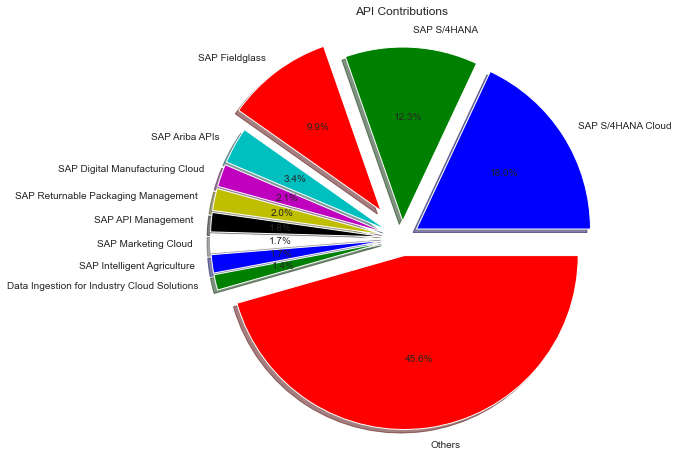

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
labels = list[df_top_10_others['index']]
# print("length--",labels)
colors1 = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b','g','r']
explode = [0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(df_top_10_others['Package_Title'], labels=df_top_10_others['index'],autopct='%0.1f%%',
       shadow = True, explode = explode, colors = colors1)
# plt.legend()
plt.title("API Contributions")
plt.show()

,index,Sub_Type
0,ODATA,14720
1,REST,11885
2,ODATAV4,7055


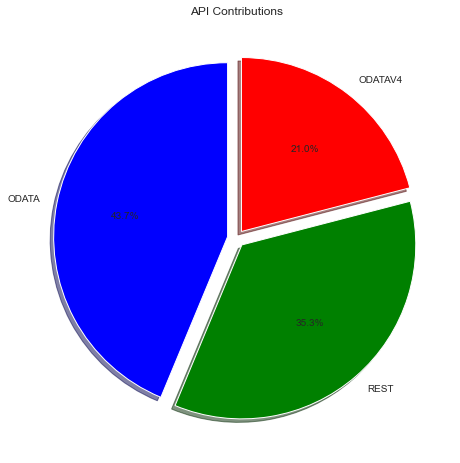

In [36]:
api_sub_type = df_package_api_operations['Sub_Type'].value_counts().reset_index()
display(api_sub_type)
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
# labels = list[api_sub_type['index']]
# print("length--",labels)
colors1 = ['b', 'g', 'r']
explode = [0.05,0.05,0.05]
plt.pie(api_sub_type['Sub_Type'], labels=api_sub_type['index'],autopct='%0.1f%%',
       shadow = True, explode = explode, colors = colors1,startangle=90)
# plt.legend()
plt.title("API Contributions")
plt.show()

In [35]:
df_package_api_group = df_package_api_operations.groupby(by=['Package_Id','API_Id'], axis=1)
df_package_api_group

In [45]:
df_package_api_operations.pivot_table(index=['Package_Title','API_Title_x','API_Version'], columns='Operation_Type', values='API_Description', aggfunc='count')

Operation_Type                                                                                   delete  \
Package_Title                       API_Title_x                                     API_Version           
 SAP Cloud ALM                      SAP Cloud ALM Analytics                         1.0.0           NaN   
                                    SAP Cloud ALM Business Service Management       Beta            NaN   
                                    SAP Cloud ALM Event Situations                  Beta            NaN   
                                    SAP Cloud ALM Projects                          1.0.0           1.0   
                                    SAP Cloud ALM Resource Changes                  1.0.0           NaN   
...                                                                                                 ...   
Trial Package                       Trial Allocations                               3.0             NaN   
UI5 Flexibility for Key Users       Translate Key User Adaptations (Cloud Foundry). 1.0.0           NaN   
Work Calendar                       Work Calendar                                   1.0.0-beta      NaN   
ZOOP.ONE Digital Know Your Customer PAN Verification API                            1.0.0           NaN   
search package with API artifacts   Product Text Classification API                 Alpha           NaN   

Operation_Type                                                                                   get  \
Package_Title                       API_Title_x                                     API_Version        
 SAP Cloud ALM                      SAP Cloud ALM Analytics                         1.0.0        2.0   
                                    SAP Cloud ALM Business Service Management       Beta         2.0   
                                    SAP Cloud ALM Event Situations                  Beta         NaN   
                                    SAP Cloud ALM Projects                          1.0.0        3.0   
                                    SAP Cloud ALM Resource Changes                  1.0.0        NaN   
...                                                                                              ...   
Trial Package                       Trial Allocations                               3.0          2.0   
UI5 Flexibility for Key Users       Translate Key User Adaptations (Cloud Foundry). 1.0.0        2.0   
Work Calendar                       Work Calendar                                   1.0.0-beta   9.0   
ZOOP.ONE Digital Know Your Customer PAN Verification API                            1.0.0        NaN   
search package with API artifacts   Product Text Classification API                 Alpha        1.0   

Operation_Type                                                                                   head  \
Package_Title                       API_Title_x                                     API_Version         
 SAP Cloud ALM                      SAP Cloud ALM Analytics                         1.0.0         NaN   
                                    SAP Cloud ALM Business Service Management       Beta          NaN   
                                    SAP Cloud ALM Event Situations                  Beta          NaN   
                                    SAP Cloud ALM Projects                          1.0.0         NaN   
                                    SAP Cloud ALM Resource Changes                  1.0.0         NaN   
...                                                                                               ...   
Trial Package                       Trial Allocations                               3.0           NaN   
UI5 Flexibility for Key Users       Translate Key User Adaptations (Cloud Foundry). 1.0.0         NaN   
Work Calendar                       Work Calendar                                   1.0.0-beta    NaN   
ZOOP.ONE Digital Know Your Customer PAN Verification API                            1.0.0         Na

In [48]:
df_package_api_operations.pivot_table(index=['Package_Title','API_Title_x','API_Version'], values='API_Description', aggfunc='count').sort_values(['API_Description'],ascending=False)

API_Description
Package_Title                                      API_Title_x                              API_Version                 
SAP S/4HANA Cloud                                  CTR Complementary Table Data Maintenance 1.0.0                    661
SAP S/4HANA                                        CTR Complementary Table Data Maintenance 1.0.0                    661
                                                   Master Data for Group Reporting – Read   1                        649
SAP S/4HANA Cloud                                  Master Data for Group Reporting – Read   1.0.0                    649
SAP S/4HANA Cloud - Internal                       Reference Service for Product Request    1.0.0                    385
...                                                                                                                  ...
Customer Relationship Management - Open Connectors Microsoft Dynamics CRM                   api-v2                     0
Marketing - Open Connectors                        Marketo                                  api-v2                     0
Customer Relationship Management - Open Connectors Maximizer                                api-v2                     0
Employee - Open Connectors                         Clover                                   api-v2                     0
Customer Relationship Management - Open Connectors Infusionsoft CRM by Keap                 api-v2                     0

[2279 rows x 1 columns]

# Aggreegated data on artifact

In [407]:

artifacts_agg = requests.get("https://api.sap.com/api/1.0/cpcache")
artifacts_agg

<Response [200]>

In [408]:
artifacts_agg_list = artifacts_agg.json()
artifacts_agg_list[0]

{'shortText': 'Automates various activities from the point when a customer evinces interest to be a prosumer, by following the Standard operating procedures like validations, financial viability, site readiness/suitability checks, reviews and approvals.',
 'supportedPlatforms': 'SAP Intelligent Business Process Management',
 'isFeatured': False,
 'isPartnerContent': True,
 'createdBy': 'XXX',
 'createdAt': 1648725119516,
 'modifiedBy': 'XXX',
 'modifiedAt': 1648725119533,
 'numberOfViews': '312',
 'isCertifiedBySAP': False,
 'orgName': 'PARTNER_WIPRO_LTD',
 'vendor': 'WiproLimited',
 'noOfArtifacts': 'null',
 'version': '2203 (1.0.0)',
 'category': 'LiveProcess',
 'products': 'SAPforUtilities,SAPCloudPlatformIntegrationSuite,SAPCloudPlatformWorkflowManagement,SAPCloudPlatform,SAPS4HANAUtilities',
 'industries': 'Utilities',
 'technicalName': 'com.wipro.bpm.utilities.prosumeronboarding',
 'displayName': 'Prosumer Onboarding Workflow for Energy and Utilities',
 'regId': '00b55eb77b50404e

In [361]:
artifacts_agg_list = artifacts_agg.json()
artifacts_agg_list[0]['noOfArtifacts']

'null'

In [354]:
import json

artifacts = json.loads(artifacts_agg_list[0]['noOfArtifacts'])
artifacts

In [455]:
print("Length--",len(artifacts_agg_list))
artifacts_agg_list[31]

Length-- 829


{'shortText': 'Explore, extend and adapt the SAP S/4HANA Cloud with built-in and side-by-side extension capabilities.',
 'supportedPlatforms': 'SAP S/4 HANA',
 'isFeatured': False,
 'isCommunityContent': 'false',
 'isPartnerContent': False,
 'createdBy': 'XXX',
 'createdAt': 1639392312710,
 'modifiedBy': 'XXX',
 'modifiedAt': 1659427249033,
 'numberOfViews': '319',
 'numberOfDownloads': '1',
 'isCertifiedBySAP': False,
 'orgName': 'S4HANA_CLOUD',
 'vendor': 'SAP',
 'noOfArtifacts': '{"TotalArtifacts":194,"type":{"CDSVIEW":{"count":194}}}',
 'version': '1.0',
 'category': 'CDSViews',
 'products': 'SAPS4HANACloud',
 'industries': ' ',
 'technicalName': 'SAPS4HANACloudCDSViewsforRDEngineering',
 'displayName': 'SAP S/4HANA Cloud for R&D/Engineering',
 'regId': '092eb5bb3bd842749c078272dc850a28'}

In [461]:
df_artifacts_agg_test = pd.DataFrame(columns=('Technical_Name','Package_Name','Supported_Platforms','Artifact_Type', \
                                         'Sub_Type','Is_Partner_Content','Number_Of_Views','Org_Name','Vendor', \
                                         'Category','Products'))
artifacts = json.loads(artifacts_agg_list[31]['noOfArtifacts'])
if (type(artifacts) is dict):
        for keys in artifacts:
            subType_flag = False
#             print(keys,"---",artifacts[keys])
       
            if (type(artifacts[keys]) is dict):
                print("showing artifact type here")
                for keys1 in artifacts[keys]:
#                     print("----------------")
#                     print("Artifact Type--",keys1)
#                     print("type of keys1--",(artifacts[keys][keys1]))
                    if (type(artifacts[keys][keys1]) is dict):
    #                     print("if statemenet")
                        for keys2 in artifacts[keys][keys1]:
#                             print("----------------")
#                             print(["Subtype",keys2])
                            print("artifacts[keys][keys1][keys2]---",artifacts[keys][keys1][keys2])
                            if type(artifacts[keys][keys1][keys2]) is dict:
#                                 print("-----------------------------")
                                for keys3 in artifacts[keys][keys1][keys2]:
                                    print("Artifact Type--")
                                    print("Keys1--",keys1,"--keys2--",keys2,"--keys3--",keys3)
                                    if keys2 == 'subType':
                                        subType_flag = True
                                    df_artifacts_agg_test.loc[count,'Technical_Name'] = artifacts_agg_list[31]['technicalName']
                                    df_artifacts_agg_test.loc[count,'Package_Name'] = artifacts_agg_list[31]['displayName']
                                    df_artifacts_agg_test.loc[count,'Supported_Platforms'] = artifacts_agg_list[31]['supportedPlatforms']
                                    df_artifacts_agg_test.loc[count,'Artifact_Type'] = keys1
                                    print("--keys3--",keys3)
                                    df_artifacts_agg_test.loc[count,'Sub_Type'] = keys3
                                    df_artifacts_agg_test.loc[count,'Count'] = artifacts[keys][keys1][keys2][keys3]['count']
                                    df_artifacts_agg_test.loc[count,'Is_Featured'] = artifacts_agg_list[31]['isFeatured']
                                    df_artifacts_agg_test.loc[count,'Is_Community_Content'] = artifacts_agg_list[31]['isCommunityContent']
                                    df_artifacts_agg_test.loc[count,'Is_Partner_Content'] = artifacts_agg_list[31]['isPartnerContent']
                                    df_artifacts_agg_test.loc[count,'Number_Of_Views'] = artifacts_agg_list[31]['numberOfViews']
                                    df_artifacts_agg_test.loc[count,'Org_Name'] = artifacts_agg_list[31]['orgName']
                                    df_artifacts_agg_test.loc[count,'Vendor'] = artifacts_agg_list[31]['vendor']
                                    df_artifacts_agg_test.loc[count,'Category'] = artifacts_agg_list[31]['category']
                                    df_artifacts_agg_test.loc[count,'Products'] = artifacts_agg_list[31]['products']
#                                     df_artifacts_agg.loc[count,'Package_Name'] = artifacts_agg_list[31]['displayName']
#                                     df_artifacts_agg.loc[count,'Package_Name'] = artifacts_agg_list[31]['displayName']
                                    
                                    count = count + 1
    #                         elif (artifacts[keys][keys1][keys2] == 'count'):
                            else:
                                print("X")
                                print("Count for ",keys1,'is--',artifacts[keys][keys1][keys2])
                                print("Keys1--",keys1,"--keys2--",keys2,"--keys3--",keys2)
                                if subType_flag == False:
                                    df_artifacts_agg_test.loc[count,'Technical_Name'] = artifacts_agg_list[31]['technicalName']
                                    df_artifacts_agg_test.loc[count,'Package_Name'] = artifacts_agg_list[31]['displayName']
                                    df_artifacts_agg_test.loc[count,'Supported_Platforms'] = artifacts_agg_list[31]['supportedPlatforms']
                                    df_artifacts_agg_test.loc[count,'Artifact_Type'] = keys1
                                    df_artifacts_agg_test.loc[count,'Sub_Type'] = keys1
                                    df_artifacts_agg_test.loc[count,'Count'] = artifacts[keys][keys1][keys2]
                                    df_artifacts_agg_test.loc[count,'Is_Featured'] = artifacts_agg_list[31]['isFeatured']
                                    df_artifacts_agg_test.loc[count,'Is_Community_Content'] = artifacts_agg_list[31]['isCommunityContent']
                                    df_artifacts_agg_test.loc[count,'Is_Partner_Content'] = artifacts_agg_list[31]['isPartnerContent']
                                    df_artifacts_agg_test.loc[count,'Number_Of_Views'] = artifacts_agg_list[31]['numberOfViews']
                                    df_artifacts_agg_test.loc[count,'Org_Name'] = artifacts_agg_list[31]['orgName']
                                    df_artifacts_agg_test.loc[count,'Vendor'] = artifacts_agg_list[31]['vendor']
                                    df_artifacts_agg_test.loc[count,'Category'] = artifacts_agg_list[31]['category']
                                    df_artifacts_agg_test.loc[count,'Products'] = artifacts_agg_list[31]['products']
                                    
                                    count = count + 1
                    elif (artifacts[keys][keys1] == 'count'):
                        print("Y")
                        print("Count for ",artifacts[keys][keys1],'is--',artifacts[keys][keys1]['count'])
#     else:
#         df_artifacts_agg.loc[count,'Package_Name'] = artifacts_agg_list[i]['displayName']
#         df_artifacts_agg.loc[count,'Artifact_Type'] = ""
#         df_artifacts_agg.loc[count,'Sub_Type'] = ""
#         df_artifacts_agg.loc[count,'Count'] = ""
        
#     break


df_artifacts_agg_test.head()

showing artifact type here
artifacts[keys][keys1][keys2]--- 194
X
Count for  CDSVIEW is-- 194
Keys1-- CDSVIEW --keys2-- count --keys3-- count


,Technical_Name,Package_Name,Supported_Platforms,Artifact_Type,Sub_Type,Is_Partner_Content,Number_Of_Views,Org_Name,Vendor,Category,Products,Count,Is_Featured,Is_Community_Content
1177,SAPS4HANACloudCDSViewsforRDEngineering,SAP S/4HANA Cloud for R&D/Engineering,SAP S/4 HANA,CDSVIEW,CDSVIEW,False,319,S4HANA_CLOUD,SAP,CDSViews,SAPS4HANACloud,194.0,False,false


In [462]:

artifacts_agg_list = artifacts_agg.json()

df_artifacts_agg = pd.DataFrame(columns=('Technical_Name','Package_Name','Supported_Platforms','Artifact_Type', \
                                         'Sub_Type','Is_Partner_Content','Number_Of_Views','Org_Name','Vendor', \
                                         'Category','Products'))
count = 0

for i in range (len(artifacts_agg_list)):
    try:
#         print("Length--",len(artifacts_agg_list[]))
        subType_flag = False
        artifacts = json.loads(artifacts_agg_list[i]['noOfArtifacts'])
        print("at index--",-i,"--Package Name--",artifacts_agg_list[i]['displayName'])
        if (type(artifacts) is dict):
            for keys in artifacts:
#                 print(keys,"---",artifacts[keys])

                if (type(artifacts[keys]) is dict):
#                     print("showing artifact type here")
                    for keys1 in artifacts[keys]:
    #                     print("----------------")
    #                     print("Artifact Type--",keys1)
    #                     print("type of keys1--",(artifacts[keys][keys1]))
                        if (type(artifacts[keys][keys1]) is dict):
        #                     print("if statemenet")
                            for keys2 in artifacts[keys][keys1]:
    #                             print("----------------")
    #                             print(["Subtype",keys2])
    #                             print(artifacts[keys][keys1][keys2])
                                if type(artifacts[keys][keys1][keys2]) is dict:
    #                                 print("-----------------------------")
                                    for keys3 in artifacts[keys][keys1][keys2]:
                                        if keys2 == 'subType':
                                            subType_flag = True
    #                                     print("Artifact Type--")
                                        print("keys1--",keys1)
                                        df_artifacts_agg.loc[count,'Technical_Name'] = artifacts_agg_list[i]['technicalName']
                                        df_artifacts_agg.loc[count,'Package_Name'] = artifacts_agg_list[i]['displayName']
                                        df_artifacts_agg.loc[count,'Supported_Platforms'] = artifacts_agg_list[i]['supportedPlatforms']
                                        df_artifacts_agg.loc[count,'Artifact_Type'] = keys1
                                        df_artifacts_agg.loc[count,'Sub_Type'] = keys3
#                                         df_artifacts_agg.loc[count,'Count'] = artifacts[keys][keys1][keys2]
                                        df_artifacts_agg.loc[count,'Count'] = artifacts[keys][keys1][keys2][keys3]['count']
#                                         df_artifacts_agg.loc[count,'Is_Featured'] = artifacts_agg_list[i]['isFeatured']
#                                         df_artifacts_agg.loc[count,'Is_Community_Content'] = artifacts_agg_list[i]['isCommunityContent']
#                                         df_artifacts_agg.loc[count,'Is_Partner_Content'] = artifacts_agg_list[i]['isPartnerContent']
#                                         df_artifacts_agg.loc[count,'Number_Of_Views'] = artifacts_agg_list[i]['numberOfViews']
#                                         df_artifacts_agg.loc[count,'Org_Name'] = artifacts_agg_list[i]['orgName']
#                                         df_artifacts_agg.loc[count,'Vendor'] = artifacts_agg_list[i]['vendor']
                                        df_artifacts_agg.loc[count,'Category'] = artifacts_agg_list[i]['category']
#                                         df_artifacts_agg.loc[count,'Products'] = artifacts_agg_list[i]['products']
                                        count = count + 1
        #                         elif (artifacts[keys][keys1][keys2] == 'count'):
                                else:
                                    print("Inside X")
    #                                 print("Count for ",keys1,'is--',artifacts[keys][keys1][keys2])
                                    if subType_flag == False:
                                        df_artifacts_agg.loc[count,'Technical_Name'] = artifacts_agg_list[i]['technicalName']
                                        df_artifacts_agg.loc[count,'Package_Name'] = artifacts_agg_list[i]['displayName']
                                        df_artifacts_agg.loc[count,'Supported_Platforms'] = artifacts_agg_list[i]['supportedPlatforms']
                                        df_artifacts_agg.loc[count,'Artifact_Type'] = keys1
                                        df_artifacts_agg.loc[count,'Sub_Type'] = keys1
#                                         df_artifacts_agg.loc[count,'Count'] = artifacts[keys][keys1][keys2][keys3]['count']
                                        df_artifacts_agg.loc[count,'Count'] = artifacts[keys][keys1][keys2]
#                                         df_artifacts_agg.loc[count,'Is_Featured'] = artifacts_agg_list[i]['isFeatured']
#                                         df_artifacts_agg.loc[count,'Is_Community_Content'] = artifacts_agg_list[i]['isCommunityContent']
#                                         df_artifacts_agg.loc[count,'Is_Partner_Content'] = artifacts_agg_list[i]['isPartnerContent']
#                                         df_artifacts_agg.loc[count,'Number_Of_Views'] = artifacts_agg_list[i]['numberOfViews']
#                                         df_artifacts_agg.loc[count,'Org_Name'] = artifacts_agg_list[i]['orgName']
#                                         df_artifacts_agg.loc[count,'Vendor'] = artifacts_agg_list[i]['vendor']
                                        df_artifacts_agg.loc[count,'Category'] = artifacts_agg_list[i]['category']
#                                         df_artifacts_agg.loc[count,'Products'] = artifacts_agg_list[i]['products']
                                        count = count + 1
                        elif (artifacts[keys][keys1] == 'count'):
                            print("Inside Y")
                            print("Count for ",artifacts[keys][keys1],'is--',artifacts[keys][keys1]['count'])
        else:
            print("Inside Z")
            df_artifacts_agg.loc[count,'Technical_Name'] = artifacts_agg_list[i]['technicalName']
            df_artifacts_agg.loc[count,'Package_Name'] = artifacts_agg_list[i]['displayName']
            df_artifacts_agg.loc[count,'Supported_Platforms'] = artifacts_agg_list[i]['supportedPlatforms']
            df_artifacts_agg.loc[count,'Artifact_Type'] = ""
            df_artifacts_agg.loc[count,'Sub_Type'] = ""
            df_artifacts_agg.loc[count,'Count'] = ""
            df_artifacts_agg.loc[count,'Is_Featured'] = artifacts_agg_list[i]['isFeatured']
#             df_artifacts_agg.loc[count,'Is_Community_Content'] = artifacts_agg_list[i]['isCommunityContent']
            df_artifacts_agg.loc[count,'Is_Partner_Content'] = artifacts_agg_list[i]['isPartnerContent']
            df_artifacts_agg.loc[count,'Number_Of_Views'] = artifacts_agg_list[i]['numberOfViews']
#             df_artifacts_agg.loc[count,'Org_Name'] = artifacts_agg_list[i]['orgName']
            df_artifacts_agg.loc[count,'Vendor'] = artifacts_agg_list[i]['vendor']
            df_artifacts_agg.loc[count,'Category'] = artifacts_agg_list[i]['category']
#             df_artifacts_agg.loc[count,'Products'] = artifacts_agg_list[i]['products']
            count = count + 1

    except:
        print("Exception Caught in index--",i)
        
        df_artifacts_agg.loc[count,'Package_Name'] = artifacts_agg_list[i]['displayName']
        df_artifacts_agg.loc[count,'Supported_Platforms'] = artifacts_agg_list[i]['supportedPlatforms']
        df_artifacts_agg.loc[count,'Artifact_Type'] = ""
        df_artifacts_agg.loc[count,'Sub_Type'] = ""
        df_artifacts_agg.loc[count,'Count'] = ""
        df_artifacts_agg.loc[count,'Is_Featured'] = artifacts_agg_list[i]['isFeatured']
#         df_artifacts_agg.loc[count,'Is_Community_Content'] = artifacts_agg_list[i]['isCommunityContent']
        df_artifacts_agg.loc[count,'Is_Partner_Content'] = artifacts_agg_list[i]['isPartnerContent']
        df_artifacts_agg.loc[count,'Number_Of_Views'] = artifacts_agg_list[i]['numberOfViews']
#         df_artifacts_agg.loc[count,'Org_Name'] = artifacts_agg_list[i]['orgName']
        df_artifacts_agg.loc[count,'Vendor'] = artifacts_agg_list[i]['vendor']
        df_artifacts_agg.loc[count,'Category'] = artifacts_agg_list[i]['category']
#         df_artifacts_agg.loc[count,'Products'] = artifacts_agg_list[i]['products']
        count = count + 1

        
#     break


df_artifacts_agg

at index-- 0 --Package Name-- Prosumer Onboarding Workflow for Energy and Utilities
Inside Z
at index-- -1 --Package Name-- SAP SuccessFactors Learning and SAP ERP Financials Integration
Inside X
Inside X
at index-- -2 --Package Name-- Source to Pay for Hybrid Deployment
keys1-- Scenario
keys1-- Scenario
keys1-- Scenario
keys1-- Scenario
Inside X
at index-- -3 --Package Name-- SAP Configure Price Quote - Developer Tools
keys1-- API
Inside X
at index-- -4 --Package Name-- SAP Logistics Business Network Integration with SAP ERP - Tracked Processes and Event Messages
Inside X
at index-- -5 --Package Name-- SAP ERP HCM integration with Pension Fund Authority - UNJSPF for NPO HR Master Data
Inside X
at index-- -6 --Package Name-- Intelligent Workflow For Digital Handover
Inside Z
at index-- -7 --Package Name-- SAP S/4HANA Integration with SAP Digital Manufacturing Cloud Templates
Inside X
at index-- -8 --Package Name-- SAP Marketing Cloud Business Events
Inside X
at index-- -9 --Package Nam

at index-- -98 --Package Name-- SAP Workflow Management Integration with SAP ERP – Invoice
Inside X
at index-- -99 --Package Name-- SAP Order Management Foundation Integration with SAP S/4HANA
Inside X
Inside X
at index-- -100 --Package Name-- KaTe AMQP Adapter
Inside Z
at index-- -101 --Package Name-- SAP Commerce Integration with SAP Subscription Billing
Inside X
Inside X
at index-- -102 --Package Name-- Cryptowerk Enterprise Blockchain enablement API
keys1-- API
Inside X
at index-- -103 --Package Name-- SAP Customer Engagement Center Integration with SAP Cloud for Customer
Inside X
at index-- -104 --Package Name-- SAP Authorization and Trust Management Service
keys1-- API
Inside X
at index-- -105 --Package Name-- SAP IBP - External Forecasting
keys1-- API
Inside X
at index-- -106 --Package Name-- WHINT CurrencyRates Package for SAP HANA Cloud Platform, integration service
Inside Z
at index-- -107 --Package Name-- SAP Omnichannel Promotion Pricing
keys1-- API
keys1-- API
Inside X
at 

Inside X
at index-- -183 --Package Name-- Integration Flow Design Guidelines - Handle Errors Gracefully
Inside X
at index-- -184 --Package Name-- Payroll e-Filing of Employees' Payments and Deductions for United Kingdom - DPS & Polling
Inside X
at index-- -185 --Package Name-- [DEPRECATED] ServiceNow Adapter by Rojo Consultancy
Inside Z
at index-- -186 --Package Name-- SuccessFactors Employee Central with Third Party Benefits Vendor-Benefitfocus : MappingExtension
Inside X
at index-- -187 --Package Name-- Monitor Collection Reminders
Inside X
Inside X
Inside X
at index-- -188 --Package Name-- SAP Commerce Integration with SAP CPQ and SAP Subscription Billing
Inside X
Inside X
at index-- -189 --Package Name-- General - Open Connectors
keys1-- API
Inside X
at index-- -190 --Package Name-- Connect to SAP Hybris
Inside X
at index-- -191 --Package Name-- Handle Tenant Move-In Reversal
Inside X
at index-- -192 --Package Name-- SAP Market Rates Management, Bring Your Own Rates data option
key

Inside X
at index-- -263 --Package Name-- SAP Workflow Management Integration with SAP S/4HANA - Update Retail Sales Price
Inside X
at index-- -264 --Package Name-- Ticketmaster Journal Entry Integration with SAP S/4HANA Cloud
Inside X
at index-- -265 --Package Name-- Fixed Asset Transfer Approval
Inside X
Inside X
Inside X
at index-- -266 --Package Name-- SAP SuccessFactors Onboarding
keys1-- API
Inside X
at index-- -267 --Package Name-- SAP Agricultural Contract Management for SAP S/4HANA Master Data Integration with SAP Agricultural Origination Portal
Inside X
Inside X
at index-- -268 --Package Name-- Business Spend Management - Open Connectors
keys1-- API
Inside X
at index-- -269 --Package Name-- SAP Document and Reporting Compliance: Electronic Invoicing for Colombia
Inside X
at index-- -270 --Package Name-- SAP S/4HANA Integration with SAP Workflow Management to Cancel Customer Invoice
Inside X
at index-- -271 --Package Name-- SAP Entitlement Management
keys1-- API
Inside X
at in

Inside X
at index-- -367 --Package Name-- Third Party Survey Data Integration with SAP Marketing Cloud
Inside X
at index-- -368 --Package Name-- Focused Build for SAP Solution Manager
keys1-- API
Inside X
at index-- -369 --Package Name-- Cross Origin Resource Sharing
Inside X
at index-- -370 --Package Name-- Hire to Retire for Hybrid Deployment
keys1-- Scenario
keys1-- Scenario
keys1-- Scenario
keys1-- Scenario
Inside X
at index-- -371 --Package Name-- SAP S/4HANA Cloud Integration with SAP Marketing Cloud
Inside X
Inside X
at index-- -372 --Package Name-- SAP Localization Hub, Tax Service
keys1-- API
Inside X
at index-- -373 --Package Name-- SAP SuccessFactors Workforce Availability Integration with SAP S/4HANA
Inside X
at index-- -374 --Package Name-- Simplified Direct Operating Cost Management
keys1-- API
Inside X
at index-- -375 --Package Name-- [DEPRECATED] SAP Cloud Platform Master Data for Business Partners Integration with SAP Field Service Management
Inside Z
at index-- -376 -

Inside X
at index-- -451 --Package Name-- SuccessFactors Integration Center - Telephone and Location Template
Inside X
at index-- -452 --Package Name-- SAP Document and Reporting Compliance: Electronic Invoices and Delivery Notes for Turkey
Inside X
at index-- -453 --Package Name-- Integration of SAP S/4HANA Cloud for Procurement with Suppliers and SAP S/4HANA Cloud for Sales with Procurement
Inside X
at index-- -454 --Package Name-- SAP Commerce Integration with SAP CPQ for Quote 2.0
Inside X
Inside X
at index-- -455 --Package Name-- Solution Business for Hybrid Deployment
keys1-- Scenario
keys1-- Scenario
keys1-- Scenario
keys1-- Scenario
Inside X
at index-- -456 --Package Name-- SAP Marketing Cloud Integration with SAP Master Data Integration
Inside X
at index-- -457 --Package Name-- Concur Expense
keys1-- API
Inside X
at index-- -458 --Package Name-- SAP SuccessFactors Employee Central Payroll Integration with Ahgora Platform Time & Attendance
Inside X
at index-- -459 --Package Nam

at index-- -544 --Package Name-- SAP Product Lifecycle Costing
keys1-- API
Inside X
at index-- -545 --Package Name-- SAP API Management
keys1-- API
keys1-- API
keys1-- API
Inside X
at index-- -546 --Package Name-- SAP Commerce Integration with SAP Marketing Cloud
Inside X
at index-- -547 --Package Name-- SAP Commerce Cloud Solution Sales Configuration Integration with SAP S/4HANA
Inside X
at index-- -548 --Package Name-- Social - Open Connectors
keys1-- API
Inside X
at index-- -549 --Package Name-- SAP S/4HANA Integration with Workday
Inside X
Inside X
at index-- -550 --Package Name-- SAP Cloud for Customer Integration with SAP Marketing
Inside X
Inside X
at index-- -551 --Package Name-- Manage Sales Orders
Inside X
Inside X
Inside X
at index-- -552 --Package Name-- [DEPRECATED] Tax Integration for Germany – ELSTER
Inside X
at index-- -553 --Package Name-- SAP Intelligent Product Design
keys1-- API
Inside X
at index-- -554 --Package Name-- ZOOP.ONE Digital Know Your Customer
keys1-- AP

Inside X
Inside X
at index-- -635 --Package Name-- Non Operated Joint Venture Cash Call Approval
Inside X
Inside X
Inside X
at index-- -636 --Package Name-- SAP Financials Integration with SAP Concur
Inside X
at index-- -637 --Package Name-- SAP SuccessFactors HCM Suite Talent Management Integration with SAP ERP HCM using OData
Inside X
at index-- -638 --Package Name-- Manage Asset Creation Requests
Inside X
Inside X
Inside X
at index-- -639 --Package Name-- [DEPRECATED]  Salesforce Adapter
Inside Z
at index-- -640 --Package Name-- SAP S/4HANA Cloud Business Events
Inside X
at index-- -641 --Package Name-- SAP S/4HANA Cloud for Human Resources
Inside X
at index-- -642 --Package Name-- SAP Consumer Sales Intelligence Integration with SAP ERP or SAP S/4HANA
Inside X
at index-- -643 --Package Name-- Sample Capital Expenditure Approval Process
Inside X
Inside X
Inside X
at index-- -644 --Package Name-- SAP Subscription Billing Business Events
Inside X
at index-- -645 --Package Name-- SAP C

at index-- -732 --Package Name-- SAP Document and Reporting Compliance: Transport Registration for Portugal
Inside X
at index-- -733 --Package Name-- SAP SuccessFactors Employee Central integration with SAP Commissions
Inside X
at index-- -734 --Package Name-- Google Campaign Manager Integration with SAP Marketing Cloud or SAP Marketing
Inside X
at index-- -735 --Package Name-- SAP Ariba Cloud Integration Gateway
keys1-- API
Inside X
at index-- -736 --Package Name-- Workday Adapter for SAP Integration Suite
Inside Z
at index-- -737 --Package Name-- SAP S/4HANA Integration with ServiceNow
Inside X
at index-- -738 --Package Name-- SAP Workflow Management Integration with SAP S/4HANA – Joint Venture Cash Call
Inside X
at index-- -739 --Package Name-- SuccessFactors Integration Center - Benefit Salary Template
Inside X
at index-- -740 --Package Name-- New Zealand Inland Revenue Reporting for Payroll
Inside X
at index-- -741 --Package Name-- Connect to SAP Concur
Inside X
at index-- -742 --

Inside X
at index-- -824 --Package Name-- SAP S/4HANA Integration with Portugal Tax Authority Web Service
Inside X
at index-- -825 --Package Name-- SAP Monitoring Service for SAP BTP
keys1-- API
Inside X
at index-- -826 --Package Name-- Concur Travel
keys1-- API
Inside X
at index-- -827 --Package Name-- SAP ERP integration for Available-to-Promise information with SAP Order Management for sourcing and availability
Inside X
at index-- -828 --Package Name-- SAP Commerce Cloud Integration with SAP Field Service Management
Inside X
Inside X


,Technical_Name,Package_Name,Supported_Platforms,Artifact_Type,Sub_Type,Is_Partner_Content,Number_Of_Views,Org_Name,Vendor,Category,Products,Count,Is_Featured
0,com.wipro.bpm.utilities.prosumeronboarding,Prosumer Onboarding Workflow for Energy and Ut...,SAP Intelligent Business Process Management,,,True,312,NaN,WiproLimited,LiveProcess,NaN,,False
1,SAPSuccessFactorsLearningandSAPERPFinancialsIn...,SAP SuccessFactors Learning and SAP ERP Financ...,SAP HANA Cloud Integration,IFlow,IFlow,NaN,NaN,NaN,NaN,Integration,NaN,1,NaN
2,SAPSuccessFactorsLearningandSAPERPFinancialsIn...,SAP SuccessFactors Learning and SAP ERP Financ...,SAP HANA Cloud Integration,ValueMapping,ValueMapping,NaN,NaN,NaN,NaN,Integration,NaN,1,NaN
3,SourcetoPayHybrid,Source to Pay for Hybrid Deployment,SAP Enterprise Architect Designer,Scenario,Business Process Diagram,NaN,NaN,NaN,NaN,Scenarios,NaN,8,NaN
4,SourcetoPayHybrid,Source to Pay for Hybrid Deployment,SAP Enterprise Architect Designer,Scenario,Data Flow Diagram,NaN,NaN,NaN,NaN,Scenarios,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,SAPCPMonitoring,SAP Monitoring Service for SAP BTP,SAP API Management,API,REST,NaN,NaN,NaN,NaN,APIs,NaN,6,NaN
1169,ConcurTravel,Concur Travel,SAP API Management,API,REST,NaN,NaN,NaN,NaN,APIs,NaN,1,NaN
1170,SAPCustomerOrderSourcingIntegrationwithSAPS4HA...,SAP ERP integration for Available-to-Promise i...,SAP HANA Cloud Integration,IFlow,IFlow,NaN,NaN,NaN,NaN,Integration,NaN,1,NaN
1171,SAPCommerceCloudintegrationwithSAPFieldService...,SAP Commerce Cloud Integration with SAP Field ...,SAP HANA Cloud Integration,IFlow,IFlow,NaN,NaN,NaN,NaN,Integration,NaN,9,NaN


In [463]:
df_artifacts_agg.query("Package_Name == 'SAP S/4HANA Cloud for R&D/Engineering'")

,Technical_Name,Package_Name,Supported_Platforms,Artifact_Type,Sub_Type,Is_Partner_Content,Number_Of_Views,Org_Name,Vendor,Category,Products,Count,Is_Featured
47,SAPS4HANACloudCDSViewsforRDEngineering,SAP S/4HANA Cloud for R&D/Engineering,SAP S/4 HANA,CDSVIEW,CDSVIEW,NaN,NaN,NaN,NaN,CDSViews,NaN,194,NaN


In [464]:
df_artifacts_agg.Count = df_artifacts_agg.Count.apply(pd.to_numeric)
df_artifacts_agg.stb.freq(['Sub_Type'],value='Count',cum_cols=False)

,Sub_Type,Count,percent
0,CDSVIEW,5503.0,41.689394
1,IFlow,2596.0,19.666667
2,REST,1176.0,8.909091
3,SOAP,964.0,7.303030
4,ODATA,734.0,5.560606
5,BADI,566.0,4.287879
6,ODATAV4,425.0,3.219697
7,Event,285.0,2.159091
8,Business Process Diagram,261.0,1.977273
9,ValueMapping,186.0,1.409091


In [471]:
df_artifacts_agg_count = df_artifacts_agg.stb.freq(['Artifact_Type'],value='Count',cum_cols=False,thresh=99)
df_artifacts_agg_count

C:\Users\I069554\Anaconda3\lib\site-packages\sidetable\sidetable.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results[results[other_label] == False].append(


,Artifact_Type,Count,percent
0,CDSVIEW,5503.0,41.689394
1,API,3299.0,24.992424
2,IFlow,2596.0,19.666667
3,BADI,566.0,4.287879
4,Scenario,351.0,2.659091
5,Event,285.0,2.159091
6,ValueMapping,186.0,1.409091
7,BRProject,99.0,0.750000
8,BOInterface,88.0,0.666667
9,VisibilityScenario,70.0,0.530303


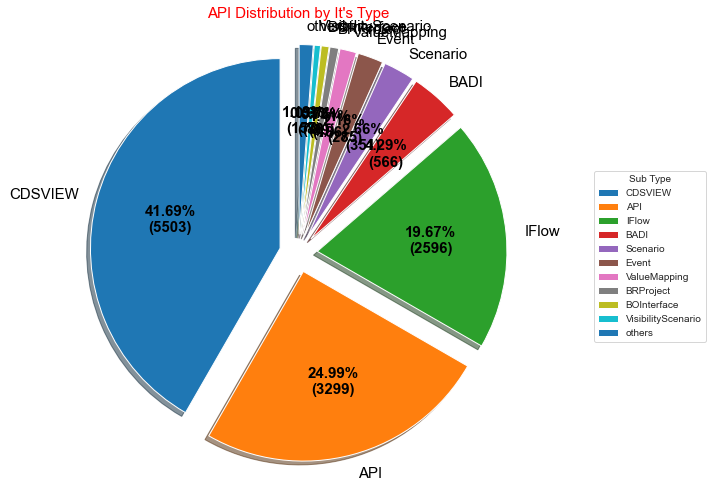

In [477]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
labels_Sub_Type = df_artifacts_agg_count['Artifact_Type'].values.tolist()

data = df_artifacts_agg_count['Count'].values.tolist()

# Creating explode data

explode = list()
# print("Type--",type(explode))
for exp in range (len(data)):
    explode.append(0.1)

# # Creating color parameters
# colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(len(sub_type))])
# for i in range(n)]

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green"}

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = (pct / 100.*np.sum(allvalues))
# 	absolute = allvalues
# 	print("values--",absolute)
	return "{:.2f}%\n({:.0f})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = df_artifacts_agg_count['Artifact_Type'],
								shadow = True,
								
								startangle = 90,
								
								textprops = dict(color ="Black",fontsize=15))
ax.axis('equal')

# Adding legend
ax.legend(wedges, labels_Sub_Type,
		title ="Sub Type",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 15, weight ="bold")
ax.set_title("API Distribution by It's Type",fontdict=dict(color ="Red",fontsize=15))

# show plot
plt.show()

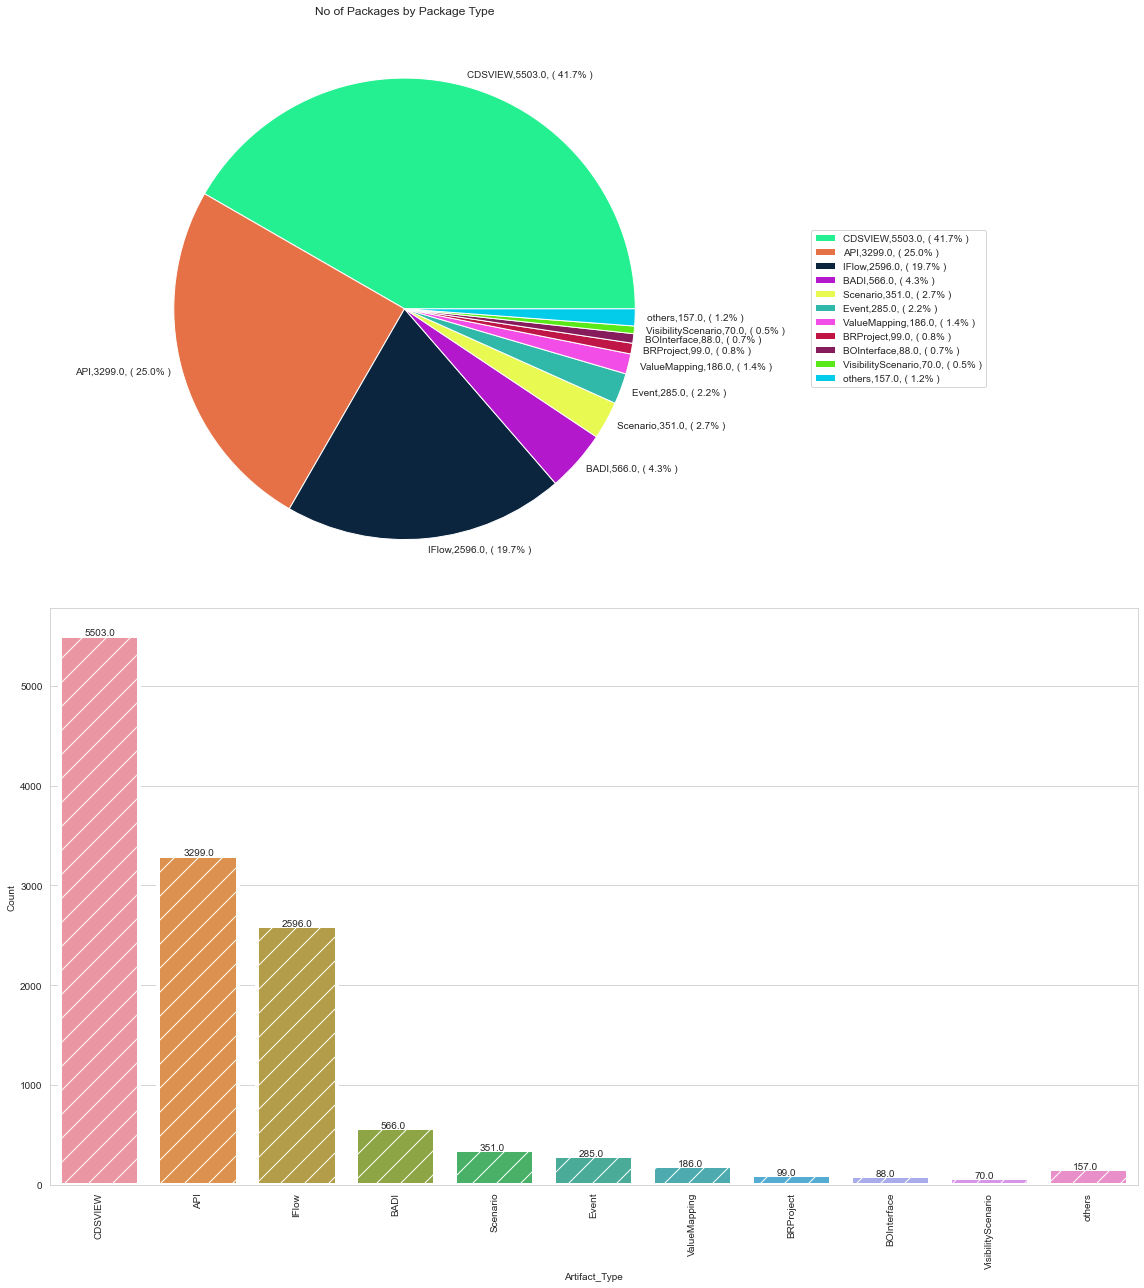

In [568]:
# Import librarie
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from random import shuffle
import random

# fig = plt.figure(figsize=[10, 8])
# ax = fig.add_subplot(111)

# create grid for different subplots

fig, ax = plt.subplots(2, 3,figsize=(16, 18))
ax_artifact_type = plt.subplot2grid((2,3), (0,0), rowspan=1, colspan=2)

z = df_artifacts_agg_count.values.tolist()
print()
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(df_artifacts_agg_count['Count'])))

labels = df_artifacts_agg_count['Artifact_Type'].values.tolist()
p = df_artifacts_agg_count['Artifact_Type'].values.tolist()
q = df_artifacts_agg_count['Count'].values.tolist()
labels = [f'{l},{s:0.1f}, ( {t:0.1f}% )' for l, s, t in z]

color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(len(df_artifacts_agg_count))]

pie_wedge_collection = ax_artifact_type.pie(df_artifacts_agg_count['Count'],
                                 labels=labels,
                                 labeldistance=1.05,colors=color);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax_artifact_type.set_title("No of Packages by Package Type");

ax2_artifact_type = plt.subplot2grid((2,3), (0,2), rowspan=1, colspan=1)
ax2_artifact_type.axis("off") 
ax2_artifact_type.legend(pie_wedge_collection[0],labels, loc="center left")
# ax[0].legend(labels=labels, loc='lower center')

#Plotting bar plot
sns.set_style("whitegrid")
ax_artifact_type_bar = plt.subplot2grid((2,3), (1,0), rowspan=1, colspan=3)
ax_artifact_type_bar = sns.barplot(x=df_artifacts_agg_count['Artifact_Type'],
                                     y=df_artifacts_agg_count['Count'],
#                                      order = df_packages['Category'].value_counts().index,
                                     lw=4,hatch='/')
for p in ax_artifact_type_bar.patches:
    ax_artifact_type_bar.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.1))

plt.xticks(rotation=90)
# plt.show()

plt.show();


In [569]:
df_artifacts_sup_platform_full = df_artifacts_agg.stb.freq(['Supported_Platforms'],value='Count',cum_cols=False)

# shuffle the DataFrame rows
# df_artifacts_sup_platform = df_artifacts_sup_platform.sample(frac=1, random_state=1).reset_index(drop=True)
df_artifacts_sup_platform_full

,Supported_Platforms,Count,percent
0,SAP S/4 HANA,5503.0,41.689394
1,SAP API Management,3149.0,23.856061
2,SAP HANA Cloud Integration,2812.0,21.303030
3,SAP S/4HANA Cloud,654.0,4.954545
4,SAP Enterprise Architect Designer,351.0,2.659091
5,SAP Event,285.0,2.159091
6,SAP Intelligent Business Process Management,228.0,1.727273
7,SAP Cloud Platform Open Connectors,170.0,1.287879
8,SuccessFactors Integration Center,37.0,0.280303
9,SAP Cloud Platform Business Rules,6.0,0.045455


In [553]:
df_artifacts_sup_platform = df_artifacts_agg.stb.freq(['Supported_Platforms'],value='Count',cum_cols=False,thresh=99.9)

# shuffle the DataFrame rows
# df_artifacts_sup_platform = df_artifacts_sup_platform.sample(frac=1, random_state=1).reset_index(drop=True)
df_artifacts_sup_platform

C:\Users\I069554\Anaconda3\lib\site-packages\sidetable\sidetable.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results[results[other_label] == False].append(


,Supported_Platforms,Count,percent
0,SAP S/4 HANA,5503.0,41.689394
1,SAP API Management,3149.0,23.856061
2,SAP HANA Cloud Integration,2812.0,21.303030
3,SAP S/4HANA Cloud,654.0,4.954545
4,SAP Enterprise Architect Designer,351.0,2.659091
5,SAP Event,285.0,2.159091
6,SAP Intelligent Business Process Management,228.0,1.727273
7,SAP Cloud Platform Open Connectors,170.0,1.287879
8,others,48.0,0.363636


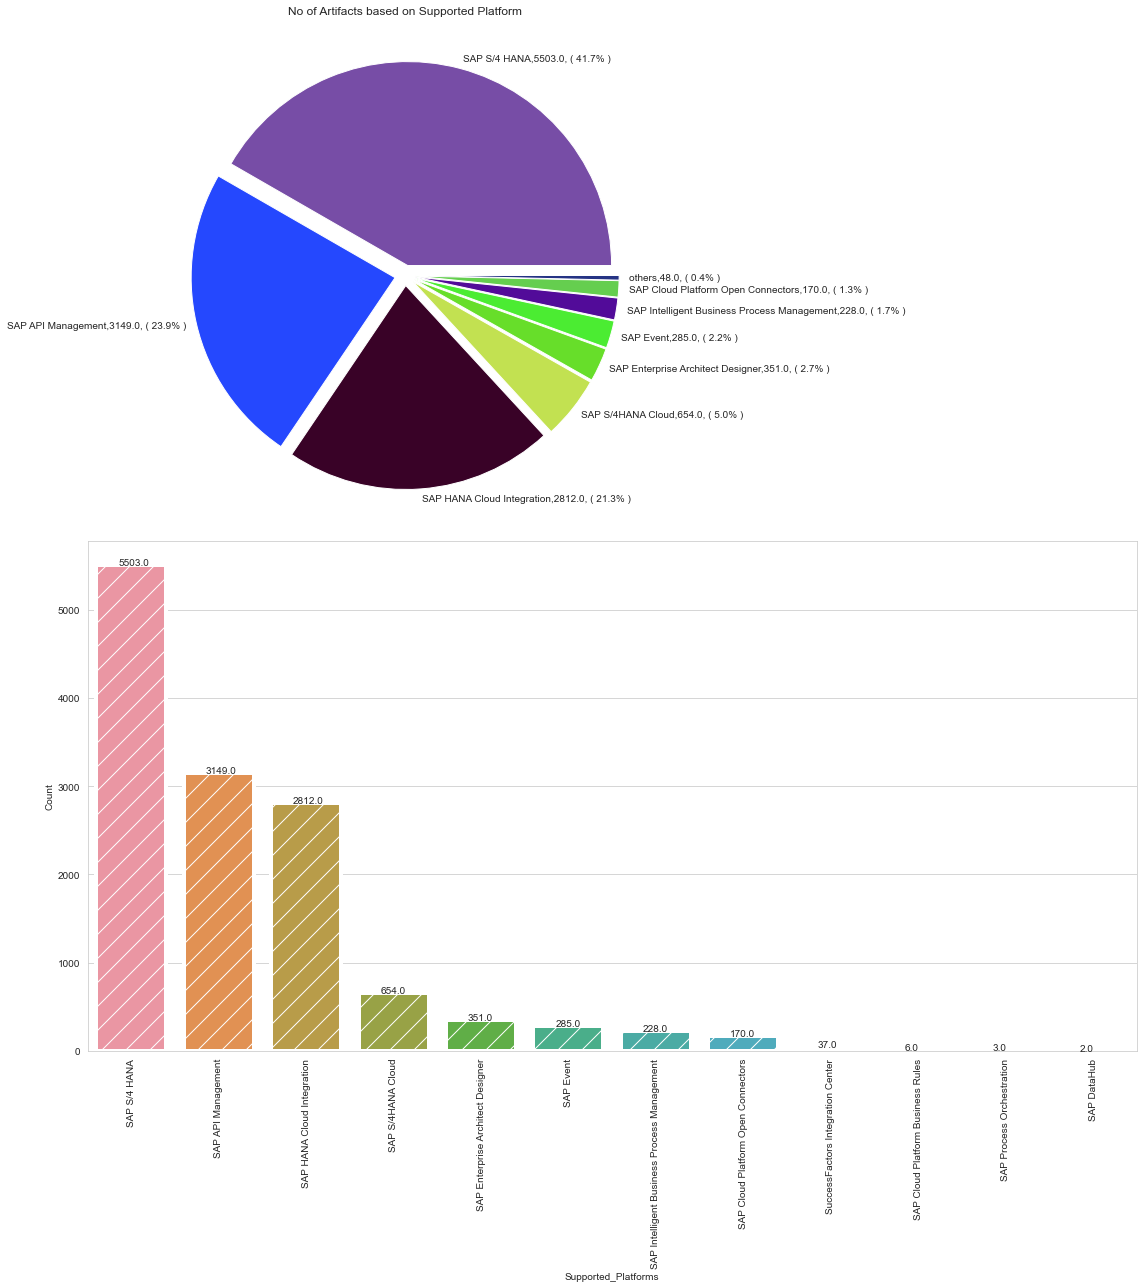

In [571]:
# Import librarie
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from random import shuffle
import random

# fig = plt.figure(figsize=[10, 8])
# ax = fig.add_subplot(111)

# create grid for different subplots

fig, ax = plt.subplots(1, 3,figsize=(16, 18))
ax1_sup_platform = plt.subplot2grid((2,3), (0,0), rowspan=1, colspan=2)

explode = list()
# print("Type--",type(explode))
for exp in range (len(df_artifacts_sup_platform)):
    explode.append(0.05)

# explode[-1] = 0.5
# explode[-2] = 0.5
    
z = df_artifacts_sup_platform.values.tolist()
print()
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(df_artifacts_sup_platform['Count'])))

labels = df_artifacts_sup_platform['Supported_Platforms'].values.tolist()
p = df_artifacts_sup_platform['Supported_Platforms'].values.tolist()
q = df_artifacts_sup_platform['Count'].values.tolist()
labels = [f'{l},{s:0.1f}, ( {t:0.1f}% )' for l, s, t in z]

color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(len(df_artifacts_sup_platform))]

pie_wedge_collection = ax1_sup_platform.pie(df_artifacts_sup_platform['Count'],
                                 labels=labels,
                                 labeldistance=1.05,colors=color,explode=explode);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax1_sup_platform.set_title("No of Artifacts based on Supported Platform");

ax2_sup_platform = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan=1)
ax2_sup_platform.axis("off") 
ax2_sup_platform.legend(pie_wedge_collection[0],labels, loc="center left")
# ax[0].legend(labels=labels, loc='lower center')

#Plotting bar plot
sns.set_style("whitegrid")
ax_sup_platform_bar = plt.subplot2grid((2,3), (1,0), rowspan=1, colspan=3)
ax_sup_platform_bar = sns.barplot(x=df_artifacts_sup_platform_full['Supported_Platforms'],
                                     y=df_artifacts_sup_platform_full['Count'],
#                                      order = df_packages['Category'].value_counts().index,
                                     lw=4,hatch='/')
for p in ax_sup_platform_bar.patches:
    ax_sup_platform_bar.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.1))

plt.xticks(rotation=90)

plt.show();

In [488]:
df_artifacts_category = df_artifacts_agg.stb.freq(['Category'],value='Count',cum_cols=False)
df_artifacts_category

,Category,Count,percent
0,CDSViews,5503.0,41.689394
1,APIs,3305.0,25.037879
2,Integration,2852.0,21.606061
3,Steampunk,654.0,4.954545
4,Scenarios,351.0,2.659091
5,Events,285.0,2.159091
6,LiveProcess,228.0,1.727273
7,"APIs,Business Services",14.0,0.106061
8,Rules,6.0,0.045455
9,DataHub,2.0,0.015152


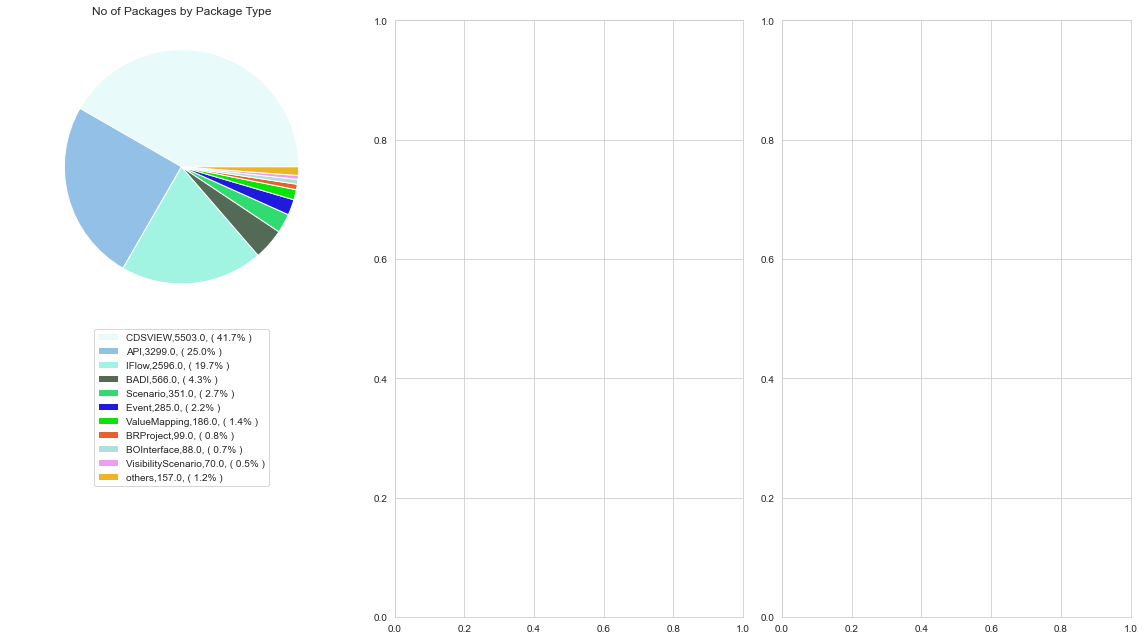

In [520]:
# Import librarie
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from random import shuffle
import random

# fig = plt.figure(figsize=[10, 8])
# ax = fig.add_subplot(111)

# create grid for different subplots

fig, ax = plt.subplots(1, 3,figsize=(16, 9))
ax[0] = plt.subplot2grid((2,3), (0,0), rowspan=1, colspan=1)

z = df_artifacts_agg_count.values.tolist()
print()
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(df_artifacts_agg_count['Count'])))

labels = df_artifacts_agg_count['Artifact_Type'].values.tolist()
p = df_artifacts_agg_count['Artifact_Type'].values.tolist()
q = df_artifacts_agg_count['Count'].values.tolist()
labels = [f'{l},{s:0.1f}, ( {t:0.1f}% )' for l, s, t in z]

color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(len(df_artifacts_agg_count))]

pie_wedge_collection = ax[0].pie(df_artifacts_agg_count['Count'],
#                                  labels=labels,
                                 labeldistance=1.05,colors=color);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax[0].set_title("No of Packages by Package Type");

ax2 = plt.subplot2grid((2,3), (1,0), rowspan=1, colspan=1)
ax2.axis("off") 
ax2.legend(pie_wedge_collection[0],labels, loc="upper center")
# ax[0].legend(labels=labels, loc='lower center')
plt.show();